Importing Packages for SQLite

In [1]:
import os
import glob
import sqlite3
import pandas as pd

# specify the directory containing the CSV files
directory = '/Users/student/Documents/GitHub/HESA-Data/Data'

# connect to a new SQLite database
conn = sqlite3.connect('hesa.db')

# iterate through all CSV files in the directory
for csv_file in glob.glob(os.path.join(directory, '*.csv')):
    # read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file)
    # get the base name of the CSV file without the file extension
    table_name = os.path.splitext(os.path.basename(csv_file))[0]
    # write the DataFrame to a new table in the SQLite database
    df.to_sql(table_name, conn, index=False)

# close the connection to the SQLite database
conn.close()

ValueError: Table 'LEO5SEC' already exists.

In [3]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('hesa.db')

# Get a cursor to the database
cursor = conn.cursor()

# Get the names of all tables
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
table_names = cursor.fetchall()

# Iterate through all tables and print an overview of their columns
for table_name in table_names:
    table_name = table_name[0]
    cursor.execute(f"PRAGMA table_info({table_name});")
    print(f'Table: {table_name}')
    print('-'*20)
    columns = cursor.fetchall()
    for column in columns:
        print(f"Name: {column[1]}, Type: {column[2]}")
    print("\n")

# Close the cursor and connection
cursor.close()
conn.close()

Table: LEO5SEC
--------------------
Name: LEO5SECSBJ, Type: TEXT
Name: KISMODE, Type: INTEGER
Name: KISLEVEL, Type: INTEGER
Name: LEO5SECPOP_UK, Type: INTEGER
Name: LEO5LQ_UK, Type: INTEGER
Name: LEO5MED_UK, Type: INTEGER
Name: LEO5UQ_UK, Type: INTEGER
Name: LEO5SECPOP_E, Type: REAL
Name: LEO5LQ_E, Type: REAL
Name: LEO5MED_E, Type: REAL
Name: LEO5UQ_E, Type: REAL
Name: LEO5SECPOP_NW, Type: REAL
Name: LEO5LQ_NW, Type: REAL
Name: LEO5MED_NW, Type: REAL
Name: LEO5UQ_NW, Type: REAL
Name: LEO5SECPOP_NE, Type: REAL
Name: LEO5LQ_NE, Type: REAL
Name: LEO5MED_NE, Type: REAL
Name: LEO5UQ_NE, Type: REAL
Name: LEO5SECPOP_EM, Type: REAL
Name: LEO5LQ_EM, Type: REAL
Name: LEO5MED_EM, Type: REAL
Name: LEO5UQ_EM, Type: REAL
Name: LEO5SECPOP_WM, Type: REAL
Name: LEO5LQ_WM, Type: REAL
Name: LEO5MED_WM, Type: REAL
Name: LEO5UQ_WM, Type: REAL
Name: LEO5SECPOP_EE, Type: REAL
Name: LEO5LQ_EE, Type: REAL
Name: LEO5MED_EE, Type: REAL
Name: LEO5UQ_EE, Type: REAL
Name: LEO5SECPOP_SE, Type: REAL
Name: LEO5LQ_SE, 

In [4]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('hesa.db')

# Get a cursor to the database
cursor = conn.cursor()

# Get the names of all tables
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
table_names = cursor.fetchall()

# Iterate through all tables and drop columns with 'URL' in their name
for table_name in table_names:
    table_name = table_name[0]
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = cursor.fetchall()
    for column in columns:
        if 'URL' in column[1]:
            cursor.execute(f"ALTER TABLE {table_name} DROP COLUMN {column[1]};")
            print(f"Dropped column {column[1]} from table {table_name}")

# Commit the changes and close the cursor and connection
conn.commit()
cursor.close()
conn.close()


### Looking over data

In [6]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect("/Users/student/Documents/GitHub/HESA-Data/Data/HESA_Data.db")

# Read the CSV file
df = pd.read_csv("/Users/student/Documents/GitHub/HESA-Data/Data/dt051-table-59.csv")

# Write the DataFrame to a SQLite table
df.to_sql("dt051-table-59", conn, if_exists="replace")

# Close the database connection
conn.close()


ParserError: Error tokenizing data. C error: Expected 2 fields in line 9, saw 3


In [9]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('hesa.db')
cursor = conn.cursor()

# Get a list of all tables in the database
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
tables = cursor.fetchall()

# Iterate through the list of tables
for table in tables:
    table_name = table[0]
    cursor.execute(f"PRAGMA table_info({table_name});")
    primary_keys = [t[1] for t in cursor.fetchall() if t[-5] == 1]
    print(f"Primary key(s) for table {table_name}: {primary_keys}")

# Close the connection
conn.close()


Primary key(s) for table LEO5SEC: []
Primary key(s) for table GOSALARY: []
Primary key(s) for table COMMON: []
Primary key(s) for table ACCREDITATION: []
Primary key(s) for table GOVOICEWORK: []
Primary key(s) for table log_updates: []
Primary key(s) for table COURSELOCATION: []
Primary key(s) for table INSTITUTION: []
Primary key(s) for table LEO3SEC: []
Primary key(s) for table log_summary: []
Primary key(s) for table ENTRY: []
Primary key(s) for table LOCATION: []
Primary key(s) for table TARIFF: []
Primary key(s) for table JOBLIST: []
Primary key(s) for table log_details: []
Primary key(s) for table GOSECSAL: []
Primary key(s) for table NSS: []
Primary key(s) for table EMPLOYMENT: []
Primary key(s) for table UCASCOURSEID: []
Primary key(s) for table KISCOURSE: []
Primary key(s) for table LEO3: []
Primary key(s) for table CONTINUATION: []
Primary key(s) for table JOBTYPE: []
Primary key(s) for table AccreditationByHep: []
Primary key(s) for table LEO5: []
Primary key(s) for table KI

In [10]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('hesa.db')

# Get a cursor to the database
cursor = conn.cursor()

# Execute a query to select all rows from the 'TITLE' column in the 'KISCourse' table
cursor.execute("SELECT TITLE FROM KISCourse")

# Fetch all the results of the query
rows = cursor.fetchall()

# Print the results
for row in rows:
    print(row[0])

# Close the cursor and connection
cursor.close()
conn.close()


Ophthalmic Dispensing
Business and Management Practice
Animal Therapy and Rehabilitation
Animal Therapy and Rehabilitation
Music Performance
Clinical Exercise and Rehabilitation Science
Psychology
Radiography (Diagnostic Imaging)
Radiography (Radiotherapy and Oncology)
Sport, Exercise and Health Science
Sport and Exercise Psychology
Sport Rehabilitation
Chiropractic
Biblical and Intercultural Studies
Biblical and Intercultural Studies
Biblical and Intercultural Studies
Biblical and Intercultural Studies
Law
Fine Art
Graphic Design
Illustration
Fashion Design
Interior Design
Computer Games Art
Photography
Illustration and Animation
English Literature
English Language and Linguistics
Writing and English Literature
Drama
Drama and English Literature
Business and Healthcare Management
Sociology
Criminology
Criminology and Sociology
History
Philosophy
Philosophy and English Literature
Business and Hospitality Management
Business and Human Resource Management
Business and Law
Business and Ma

History/Tourism Studies
History/Tourism Studies
History
History
Human Resource Management
Human Resource Management
Human Resource Management
Criminal Investigation
Criminal Investigation
Forensic Investigation (Interpersonal Violence)
Forensic Investigation (Interpersonal Violence)
Applied Criminology (Interpersonal Violence)
Applied Criminology (Interpersonal Violence)
Multimedia Journalism
Multimedia Journalism
Law with Business
Law with Business
Law with Criminology
Law with Criminology
Law with Finance
Law with Finance
Chemical Engineering
Law with History
Law with History
Law with International Relations
Law with International Relations
Logistics Management/Marketing
Logistics Management/Marketing
Logistics Management/Tourism Studies
Logistics Management/Tourism Studies
Logistics Management
Logistics Management
Logistics Management
Law with Forensic Investigation
Law with Forensic Investigation
Law with Politics
Law with Politics
Law with Sociology
Law with Sociology
English Lite

Accounting and Finance
Accounting and Finance
Architecture
Architecture
Architectural Technology
Architectural Technology
Fine Art
Fine Art
Business Management with Enterprise
Business Management with Enterprise
Business Management with Finance
Business Management with Finance
Business Management with Law
Business Management with Law
Business Management with Marketing
Business Management with Marketing
Business Economics
Criminology with Psychology
Criminology with Psychology
Dance
Fashion Marketing
Fashion Marketing
Fashion
Fashion
Filmmaking
International Business
Housing Studies
Housing Studies
Product Design
Product Design
Physical Education
Sport Development
Sport Development
Journalism
Landscape Architecture and Design
Landscape Architecture and Design
Media Communication Cultures
Media Communication Cultures
Music Industries Management
Music Industries Management
Marketing Management
Marketing Management
Physical Education with Outdoor Education
Sociology and Criminology
Sociolo

Chemical Engineering
Sport And Exercise Science
Theatre Dance
Professional Dance Performance
Hospitality Management
Children and Young People's Services
Children and Young People's Services (Teaching Assistant Pathway)
Sustainable Engineering
Contemporary Music, Performance and Production
Business (Blended Learning)
Events Management
Business
Applied Sports Science
Sports Management - Blended Learning
Applied Sports Science with Management
Sports Coaching
Sport and Exercise Therapy
International  Tourism Management
Sports and Leisure Management
Public Services
Business and Management
Sport & Exercise Science (Blended Learning)
Sport & Exercise Science (Coaching Science) (Blended Learning)
Engineering (Electric and Electronic)
Engineering (Mechanical)
Commercial Management and Quantity Surveying
Politics and International Relations
Construction Engineering Management
Politics and International Relations
Human Biology
Human Biology
Biological Sciences
Biological Sciences
Biological Scien

Management with Entrepreneurship (Year in Business)
Environmental Geoscience with a Year of International Study
Comparative Literature & Culture with International Film
History and Philosophy
English and History
Philosophy
Comparative Literature and Culture and Drama
Ancient and Medieval History
Music and English
Computer Science (Artificial Intelligence)
Computer Science (Artificial Intelligence) with Year in Industry
Computer Science (Information Security)
Computer Science (Information Security) with Year in Industry
Computer Science (Information Security)
Computer Science (Information Security) with Year in Industry
Criminology and Psychology
Computer Science
Computer Science with Year in Industry
Mathematical Studies
Film, Television and Digital Production
Computer Science (Software Engineering)
Computer Science (Software Engineering) with Year in Industry
Computer Science (Software Engineering)
Computer Science (Software Engineering) with Year in Industry
Law
Liberal Arts
Liberal 

Digital Film Production
Digital Film Production & Screenwriting
Drama, Theatre and Directing
Physical Education (Primary Years)
Education, Special Needs and Disability
Physical Education (Secondary Years)
Education
English Literature
English Literature and History
Event Management
Event Management and Finance
Fine Art
Painting and Drawing
Fine Art with Printmaking
Fine Art with Sculpture
Fine Art with Textiles
Football Development
Football Coaching and Performance
Games Design and Development
History
Human Resource Management
Humanistic Counselling
Jazz and Cabaret Performance
Media & Communications
Medieval & Early Modern History
Marketing
Marketing and Event Management
Marketing and Human Resource Management
Modern History
Music Performance & Acting for Film
Musical Theatre & Acting for Film
Musical Theatre (Cabaret)
Teaching of Musical Theatre (TMT)
Music and Cabaret Performance
Musical Theatre (Music)
Music
Instrumental Teaching
Jazz Performance
Performance
Music Performance
Vocal 

Computing Technologies (Networks And Cybersecurity)
Computing Technologies (Software Development)
Computing Technologies (Software Development)
Pharmaceutical Chemistry
Medical Biology
Biology (Molecular and Cellular)
Biochemistry
Medical Biochemistry
Psychology
Psychology with Criminology
Chemistry
Chemistry with Industrial Experience
Forensic and Analytical Science
Computing in Business
Software Engineering
Software Engineering
Architectural Technology
Electronic Engineering
Product Design
Architecture/Architecture (International) (RIBA Part 1)
Sociology
Youth and Community Work
Marketing
Events Management
History
History
Graphic Design
Interior Design
Music
Psychology with Counselling
Medical Genetics
Computing
Pharmacy
Pharmaceutical Chemistry
Photography
Energy Engineering
Criminology
Chemistry with Forensic Science
Chemistry with Chemical Engineering
Mechanical Engineering
Costume with Textiles
Sociology and Criminology
Contemporary Art
Illustration
Broadcast Journalism
Youth and

Civil Engineering including an Industrial Year
Civil Engineering including an Industrial Year
Mechanical Engineering
Mechanical Engineering
Mechanical Engineering including an Industrial Year
Mechanical Engineering including an Industrial Year
Mechanical Engineering with Study Abroad (year 2 out)
Mechanical Engineering with Study Abroad (year 3 out)
Mechanical Engineering with Study Abroad
Aerospace Engineering
Aerospace Engineering
Aerospace Engineering including an Industrial Year
Aerospace Engineering including an Industrial Year
Electrical and Electronic Engineering
Electrical Engineering
Electrical and Electronic Engineering
Electrical and Electronic Engineering with a Year Abroad
Electrical and Electronic Engineering with a Year Abroad
Electrical and Electronic Engineering including an Industrial Year
Electrical and Electronic Engineering including an Industrial Year (year 3 out)
Electrical and Electronic Engineering including an Industrial Year (year 4 out)
Electronic Engineerin

Sociology
Sociology
Sociology with Psychology
Sociology with Psychology
Sociology with Psychology
Sociology with Psychology
Professional Policing
Professional Policing
Social Work
Social Work
Geography
Law
Law
Criminology
Criminology
Criminology
Criminology
Criminology with Psychology
Criminology with Psychology
Criminology with Psychology
Criminology with Psychology
Criminology and Sociology
Criminology and Sociology
Criminology and Sociology
Criminology and Sociology
Criminology and Law
Criminology and Law
Business and Management
Business and Management
International Business
International Business
Business (Team Entrepreneurship)
Business (Team Entrepreneurship)
Sports Business and Entrepreneurship
Business Computing
Business Computing
Business Management and Marketing
Business and Human Resource Management
Business Management and Leadership
Business Management and Leadership
Banking and Finance
Banking and Finance
Accounting
Accounting and Finance
Accounting
Accounting and Business

Accounting and Finance
Film and English Literature
Theoretical Physics with Mathematics
Geography
Nuclear Engineering
Management and Information Technology
Management and Information Technology (Industry)
Modern Languages
Politics and Sociology
Economics (Industry)
English Language and Spanish Studies
Marketing and Design
Marketing with Psychology
Computer Science (with Industrial Experience)
English Language and Creative Writing
Software Engineering (with Industrial Experience)
Law with Politics
Film Studies
Natural Sciences
Natural Sciences (Study Abroad)
Theoretical Physics with Mathematics (Study Abroad)
Chemical Engineering
Chemical Engineering
Biomedicine
Biomedicine
Medicine and Surgery
Economics and Mathematics
Business Analytics
Chemistry (Study Abroad)
Chemistry
Chemistry
Business Analytics (Study Abroad)
Business Analytics (Industry)
French Studies and Film
German Studies and Film
Spanish Studies and Film
Biology
International Relations
Business Economics (Industry)
Geograph

Economics and Mathematics
Economics and Politics
Economics and Accounting
Economics and Finance
Accounting and Finance
Economics and Econometrics
Economics and Management
Accounting and Management
Economics with Study Abroad
Accounting and Finance with Study Abroad
Economics with Study Abroad in a Modern Language
Education Studies
Psychology in Education
Education Studies with Study Abroad
Psychology in Education with Study Abroad
International Business Management with Study Abroad
Economics and Finance with Study Abroad
Economics and Econometrics with Study Abroad
Economics and Accounting with Study Abroad
Economics and Management with Study Abroad
Accounting and Management with Study Abroad
Economics and Politics with Study Abroad
Marketing
Marketing with Study Abroad
Finance
Marketing with Study Abroad in a Modern Language
Law
Law and French
Law and German
Law and Spanish
Business and Management
Business and Management with Study Abroad
Business and Management with Study Abroad in a

Psychology/Sociology
Psychology/Social & Public Policy
Business Economics/Mathematics
Mathematics/Economics
Mathematics/Politics
Computing Science/Politics
Economics/Politics
Business Economics/Sociology
Economics/Social & Public Policy
Economics/Geography
International Relations and Sociology
Sociology/Social & Public Policy
Health & Social Policy
Geography/Sociology
Politics/Social & Public Policy
Geography/Social & Public Policy
Sociology/Politics
Geography/Politics
Business Economics/Politics
Business Economics/Social & Public Policy
Business Economics/Geography
International Relations and Social and Public Policy
Scots Law and International Relations
Common Law and International Relations
Law/Social & Public Policy
Economics/Business & Management
Accountancy/Economics
Archaeology/Business Economics
Sociology/Business and Management
Geography/Business and Management
Economics/Latin
Economics/Latin
Economics/Greek
Economics/Greek
Economics/English Language
Economics/English Language

Biblical Studies and Mathematics
Biblical Studies and Philosophy
Biblical Studies
Psychology and Social Anthropology
Psychology (BPS) - Statistics
Comparative Literature and French and German
Comparative Literature and French and Italian
Comparative Literature and French and Russian
Comparative Literature and French and Spanish
Comparative Literature and German and Italian
Comparative Literature and German and Russian
Comparative Literature and German and Spanish
Chinese Studies - Comparative Literature
Chinese Studies - Economics
Chinese Studies - Film Studies
Chinese Studies - French
Chinese Studies - German
Chinese Studies - International Relations
Chinese Studies - Italian
Chinese Studies - Management
Chinese Studies - Modern History
Chinese Studies - Persian
Chinese Studies - Russian
Chinese Studies - Spanish
Comparative Literature and Italian and Russian
Comparative Literature and Italian and Spanish
Classics and Comparative Literature
Classical Studies and Comparative Literature

Photography and Film
Photography and Film
Public Health and Wellbeing
Physiotherapy
Paramedic Science
Professional Policing
Professional Policing
Professional Sound and Video
Psychology
Psychology
Renewable and Sustainable Engineering
Sports Injury Rehabilitation
Speech and Language Therapy
Social and Cultural History
Social and Cultural History
Social Work: Qualified Status
Therapeutic Child Care
Television Production and Technology
Veterinary Nursing
Working with Children & Families
Working with Children & Families
Youth & Community Work (JNC)
Youth & Community Work (JNC)
Applied Computing
Applied Computing
Applied Computing
Architectural Technology
Business Management
Business Management
Business Information Technology
Construction Management & Technology
Construction Management & Technology
Computing
Computing
Computing
Electrical and Electronic Engineering
Internet Computing
Mechanical Engineering
Mechanical Engineering
Mechanical Engineering
Bachelor Of Music (Composition Pathway

International Development and Global Politics
International Development and Global Politics with Foundation Year
International Finance
International Hotel Management
Illustration
International Leisure Resort Management
International Leisure Resort Management
Islam in the 21st Century
International Sports Management
International Sports Management (Sandwich)
International Travel and Tourism Management
International Travel and Tourism Management
Archaeology and Anthropology
Archaeology and History
Archaeology and Medieval Studies
Archaeology
Archaeology with Ancient Egyptian Culture
Ancient History and Archaeology
Ancient History
Ancient and Medieval History
Chinese Studies and Anthropology
Anthropology and History
Ancient Civilisations
Anthropology
Conflict and War
Celtic Studies
Chinese Studies and English
Chinese Studies and History
Chinese Studies and Medieval Studies
Chinese Studies and Philosophy
Chinese Studies and Religious Studies
Chinese Studies
Classical Civilisation
Classical

In [11]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('hesa.db')

# Get a cursor to the database
cursor = conn.cursor()

# Execute a query to select all rows from the 'TITLE' and 'PUBUKPRN' columns in the 'KISCourse' table
cursor.execute("SELECT KISCourse.TITLE, Institution.PUBUKPRN FROM KISCourse, Institution WHERE KISCourse.UKPRN = Institution.UKPRN")

# Fetch all the results of the query
rows = cursor.fetchall()

# Print the results
for row in rows:
    print(f"Title: {row[0]}, PUBUKPRN: {row[1]}")

# Close the cursor and connection
cursor.close()
conn.close()


Title: Ophthalmic Dispensing, PUBUKPRN: 10000047
Title: Ophthalmic Dispensing, PUBUKPRN: 10001143
Title: Business and Management Practice, PUBUKPRN: 10000055
Title: Animal Therapy and Rehabilitation, PUBUKPRN: 10000055
Title: Animal Therapy and Rehabilitation, PUBUKPRN: 10000878
Title: Animal Therapy and Rehabilitation, PUBUKPRN: 10000950
Title: Animal Therapy and Rehabilitation, PUBUKPRN: 10004579
Title: Animal Therapy and Rehabilitation, PUBUKPRN: 10004930
Title: Animal Therapy and Rehabilitation, PUBUKPRN: 10005946
Title: Animal Therapy and Rehabilitation, PUBUKPRN: 10007527
Title: Animal Therapy and Rehabilitation, PUBUKPRN: 10000055
Title: Animal Therapy and Rehabilitation, PUBUKPRN: 10000878
Title: Animal Therapy and Rehabilitation, PUBUKPRN: 10000950
Title: Animal Therapy and Rehabilitation, PUBUKPRN: 10004579
Title: Animal Therapy and Rehabilitation, PUBUKPRN: 10004930
Title: Animal Therapy and Rehabilitation, PUBUKPRN: 10005946
Title: Animal Therapy and Rehabilitation, PUBUKPR

Title: Computer Science, PUBUKPRN: 10000886
Title: Computer Science for Games, PUBUKPRN: 10000886
Title: Digital Games Development, PUBUKPRN: 10000886
Title: Computer Science with Artificial Intelligence, PUBUKPRN: 10000886
Title: Computer Science with Cyber Security, PUBUKPRN: 10000886
Title: Physical Education with QTS, PUBUKPRN: 10000886
Title: Sport Journalism, PUBUKPRN: 10000886
Title: Sport Studies, PUBUKPRN: 10000886
Title: Sport and Exercise Science, PUBUKPRN: 10000886
Title: Sport Coaching, PUBUKPRN: 10000886
Title: Secondary Mathematics Education with QTS, PUBUKPRN: 10000886
Title: Primary Education with QTS (3-7 years), PUBUKPRN: 10000886
Title: Primary Education with QTS (5-11 years), PUBUKPRN: 10000886
Title: Primary English Education with QTS, PUBUKPRN: 10000886
Title: Primary Mathematics Education with QTS, PUBUKPRN: 10000886
Title: Education, PUBUKPRN: 10000886
Title: Working with Children and Young People, PUBUKPRN: 10000886
Title: Early Childhood Education and Care, P

Title: Accounting/Business Management, PUBUKPRN: 10001143
Title: Accounting/Business Management, PUBUKPRN: 10000047
Title: Accounting/Business Management, PUBUKPRN: 10001143
Title: Accounting, PUBUKPRN: 10000047
Title: Accounting, PUBUKPRN: 10001143
Title: Accounting, PUBUKPRN: 10000047
Title: Accounting, PUBUKPRN: 10001143
Title: Accounting, PUBUKPRN: 10000047
Title: Accounting, PUBUKPRN: 10001143
Title: Accounting and Finance, PUBUKPRN: 10000047
Title: Accounting and Finance, PUBUKPRN: 10001143
Title: Accounting and Finance, PUBUKPRN: 10000047
Title: Accounting and Finance, PUBUKPRN: 10001143
Title: Accounting and Finance, PUBUKPRN: 10000047
Title: Accounting and Finance, PUBUKPRN: 10001143
Title: Advertising/Business Management, PUBUKPRN: 10000047
Title: Advertising/Business Management, PUBUKPRN: 10001143
Title: Advertising/Business Management, PUBUKPRN: 10000047
Title: Advertising/Business Management, PUBUKPRN: 10001143
Title: Advertising/Business Management, PUBUKPRN: 10000047
Tit

Title: Physiotherapy, PUBUKPRN: 10003645
Title: Medicine, PUBUKPRN: 10003645
Title: Extended Medical Degree Programme, PUBUKPRN: 10003645
Title: Biomedical Engineering, PUBUKPRN: 10003645
Title: Electronic Engineering, PUBUKPRN: 10003645
Title: General Engineering, PUBUKPRN: 10003645
Title: Pharmacy, PUBUKPRN: 10003645
Title: Physics & Philosophy, PUBUKPRN: 10003645
Title: Chemistry, PUBUKPRN: 10003645
Title: Chemistry with a Year's Professional Placement, PUBUKPRN: 10003645
Title: Physics with Biophysics, PUBUKPRN: 10003645
Title: Physics with Theoretical Physics, PUBUKPRN: 10003645
Title: Chemistry with Biomedicine with a Year's Professional Placement, PUBUKPRN: 10003645
Title: Chemistry with Biomedicine, PUBUKPRN: 10003645
Title: Computer Science, PUBUKPRN: 10003645
Title: Artificial Intelligence, PUBUKPRN: 10003645
Title: Mathematics, PUBUKPRN: 10003645
Title: Physics, PUBUKPRN: 10003645
Title: Physics with Astrophysics & Cosmology, PUBUKPRN: 10003645
Title: Early Childhood Educati

Title: Environmental Geography (with Foundation Year), PUBUKPRN: 10003956
Title: Environmental Geography, PUBUKPRN: 10003956
Title: Environmental Change & Tourism (with Foundation Year), PUBUKPRN: 10003956
Title: Environmental Change and Tourism, PUBUKPRN: 10003956
Title: Environmental Science (with Foundation Year), PUBUKPRN: 10003956
Title: Environmental Science, PUBUKPRN: 10003956
Title: Geography (with Foundation Year), PUBUKPRN: 10003956
Title: Geography, PUBUKPRN: 10003956
Title: Geography and Human Biology (with Foundation Year), PUBUKPRN: 10003956
Title: Geography and Human Biology, PUBUKPRN: 10003956
Title: Geography and Information Technology (with Foundation Year), PUBUKPRN: 10003956
Title: Geography and Information Technology, PUBUKPRN: 10003956
Title: Geography and Mathematics (with Foundation Year), PUBUKPRN: 10003956
Title: Geography and Mathematics, PUBUKPRN: 10003956
Title: Geography and Nutrition (with Foundation Year), PUBUKPRN: 10003956
Title: Geography and Nutritio

Title: Animal Science, PUBUKPRN: 10004797
Title: Animal Science, PUBUKPRN: 10020858
Title: Animal Science, PUBUKPRN: 10030715
Title: Veterinary Nursing, PUBUKPRN: 10000080
Title: Veterinary Nursing, PUBUKPRN: 10004797
Title: Veterinary Nursing, PUBUKPRN: 10020858
Title: Veterinary Nursing, PUBUKPRN: 10030715
Title: Zoology, PUBUKPRN: 10000080
Title: Zoology, PUBUKPRN: 10004797
Title: Zoology, PUBUKPRN: 10020858
Title: Zoology, PUBUKPRN: 10030715
Title: Zoology, PUBUKPRN: 10000080
Title: Zoology, PUBUKPRN: 10004797
Title: Zoology, PUBUKPRN: 10020858
Title: Zoology, PUBUKPRN: 10030715
Title: Architecture, PUBUKPRN: 10000080
Title: Architecture, PUBUKPRN: 10004797
Title: Architecture, PUBUKPRN: 10020858
Title: Architecture, PUBUKPRN: 10030715
Title: Architecture, PUBUKPRN: 10000080
Title: Architecture, PUBUKPRN: 10004797
Title: Architecture, PUBUKPRN: 10020858
Title: Architecture, PUBUKPRN: 10030715
Title: Biomedical Science, PUBUKPRN: 10000080
Title: Biomedical Science, PUBUKPRN: 1000479

Title: Automotive Engineering with Electric Vehicles, PUBUKPRN: 10000950
Title: Automotive Engineering with Electric Vehicles, PUBUKPRN: 10004579
Title: Automotive Engineering with Electric Vehicles, PUBUKPRN: 10004930
Title: Automotive Engineering with Electric Vehicles, PUBUKPRN: 10005946
Title: Automotive Engineering with Electric Vehicles, PUBUKPRN: 10007527
Title: Automotive Engineering with Electric Vehicles, PUBUKPRN: 10000055
Title: Automotive Engineering with Electric Vehicles, PUBUKPRN: 10000878
Title: Automotive Engineering with Electric Vehicles, PUBUKPRN: 10000950
Title: Automotive Engineering with Electric Vehicles, PUBUKPRN: 10004579
Title: Automotive Engineering with Electric Vehicles, PUBUKPRN: 10004930
Title: Automotive Engineering with Electric Vehicles, PUBUKPRN: 10005946
Title: Automotive Engineering with Electric Vehicles, PUBUKPRN: 10007527
Title: Mechanical Engineering Design, PUBUKPRN: 10000055
Title: Mechanical Engineering Design, PUBUKPRN: 10000878
Title: Mec

Title: Cyber Security (with a placement year), PUBUKPRN: 10042239
Title: Cyber Security (with a placement year), PUBUKPRN: 10065146
Title: Cyber Security (with a placement year), PUBUKPRN: 10082366
Title: Computer Games Design, PUBUKPRN: 10001004
Title: Computer Games Design, PUBUKPRN: 10004603
Title: Computer Games Design, PUBUKPRN: 10005822
Title: Computer Games Design, PUBUKPRN: 10006299
Title: Computer Games Design, PUBUKPRN: 10006349
Title: Computer Games Design, PUBUKPRN: 10007455
Title: Computer Games Design, PUBUKPRN: 10023526
Title: Computer Games Design, PUBUKPRN: 10042239
Title: Computer Games Design, PUBUKPRN: 10065146
Title: Computer Games Design, PUBUKPRN: 10082366
Title: Esports, PUBUKPRN: 10001004
Title: Esports, PUBUKPRN: 10004603
Title: Esports, PUBUKPRN: 10005822
Title: Esports, PUBUKPRN: 10006299
Title: Esports, PUBUKPRN: 10006349
Title: Esports, PUBUKPRN: 10007455
Title: Esports, PUBUKPRN: 10023526
Title: Esports, PUBUKPRN: 10042239
Title: Esports, PUBUKPRN: 100651

Title: Air Transport Management with ATPL Studies, PUBUKPRN: 10002029
Title: Air Transport Management with ATPL Studies, PUBUKPRN: 10005583
Title: Air Transport Management with ATPL Studies, PUBUKPRN: 10005916
Title: Air Transport Management with ATPL Studies, PUBUKPRN: 10006566
Title: Air Transport Management with ATPL Studies, PUBUKPRN: 10009439
Title: Air Transport Management with ATPL Studies, PUBUKPRN: 10020439
Title: Air Transport Management with ATPL Studies, PUBUKPRN: 10022021
Title: Air Transport Management with ATPL Studies, PUBUKPRN: 10031419
Title: Air Transport Management with ATPL Studies, PUBUKPRN: 10034450
Title: Air Transport Management with ATPL Studies, PUBUKPRN: 10045275
Title: Air Transport Management with ATPL Studies, PUBUKPRN: 10045476
Title: Air Transport Management with ATPL Studies, PUBUKPRN: 10046386
Title: Air Transport Management with ATPL Studies, PUBUKPRN: 10047237
Title: Air Transport Management with ATPL Studies, PUBUKPRN: 10082316
Title: Air Transport

Title: Human Resource Management, PUBUKPRN: 10045476
Title: Human Resource Management, PUBUKPRN: 10046386
Title: Human Resource Management, PUBUKPRN: 10047237
Title: Human Resource Management, PUBUKPRN: 10082316
Title: Human Resource Management, PUBUKPRN: 10085530
Title: Human Resource Management, PUBUKPRN: 10002029
Title: Human Resource Management, PUBUKPRN: 10005583
Title: Human Resource Management, PUBUKPRN: 10005916
Title: Human Resource Management, PUBUKPRN: 10006566
Title: Human Resource Management, PUBUKPRN: 10009439
Title: Human Resource Management, PUBUKPRN: 10020439
Title: Human Resource Management, PUBUKPRN: 10022021
Title: Human Resource Management, PUBUKPRN: 10031419
Title: Human Resource Management, PUBUKPRN: 10034450
Title: Human Resource Management, PUBUKPRN: 10045275
Title: Human Resource Management, PUBUKPRN: 10045476
Title: Human Resource Management, PUBUKPRN: 10046386
Title: Human Resource Management, PUBUKPRN: 10047237
Title: Human Resource Management, PUBUKPRN: 10

Title: Nursing Associate, PUBUKPRN: 10041563
Title: Crime & Forensic Psychology with Foundation Year, PUBUKPRN: 10000794
Title: Crime & Forensic Psychology with Foundation Year, PUBUKPRN: 10004177
Title: Crime & Forensic Psychology with Foundation Year, PUBUKPRN: 10006841
Title: Crime & Forensic Psychology with Foundation Year, PUBUKPRN: 10041563
Title: Psychology, Psychotherapy and Counselling with foundation year, PUBUKPRN: 10000794
Title: Psychology, Psychotherapy and Counselling with foundation year, PUBUKPRN: 10004177
Title: Psychology, Psychotherapy and Counselling with foundation year, PUBUKPRN: 10006841
Title: Psychology, Psychotherapy and Counselling with foundation year, PUBUKPRN: 10041563
Title: Psychology, Psychotherapy and Counselling, PUBUKPRN: 10000794
Title: Psychology, Psychotherapy and Counselling, PUBUKPRN: 10004177
Title: Psychology, Psychotherapy and Counselling, PUBUKPRN: 10006841
Title: Psychology, Psychotherapy and Counselling, PUBUKPRN: 10041563
Title: Psycholo

Title: Film Studies and Film Production, PUBUKPRN: 10045793
Title: Film Studies and Film Production, PUBUKPRN: 10057945
Title: Film Studies and Media & Culture, PUBUKPRN: 10002852
Title: Film Studies and Media & Culture, PUBUKPRN: 10003023
Title: Film Studies and Media & Culture, PUBUKPRN: 10005959
Title: Film Studies and Media & Culture, PUBUKPRN: 10006442
Title: Film Studies and Media & Culture, PUBUKPRN: 10007139
Title: Film Studies and Media & Culture, PUBUKPRN: 10045793
Title: Film Studies and Media & Culture, PUBUKPRN: 10057945
Title: Film Studies and Screen Writing, PUBUKPRN: 10002852
Title: Film Studies and Screen Writing, PUBUKPRN: 10003023
Title: Film Studies and Screen Writing, PUBUKPRN: 10005959
Title: Film Studies and Screen Writing, PUBUKPRN: 10006442
Title: Film Studies and Screen Writing, PUBUKPRN: 10007139
Title: Film Studies and Screen Writing, PUBUKPRN: 10045793
Title: Film Studies and Screen Writing, PUBUKPRN: 10057945
Title: Film Studies and Theatre, Acting and Per

Title: Electrical and Electronics Engineering, PUBUKPRN: 10030408
Title: Electrical and Electronics Engineering with Placement, PUBUKPRN: 10004579
Title: Electrical and Electronics Engineering with Placement, PUBUKPRN: 10007145
Title: Electrical and Electronics Engineering with Placement, PUBUKPRN: 10015688
Title: Electrical and Electronics Engineering with Placement, PUBUKPRN: 10030408
Title: English and Creative Writing, PUBUKPRN: 10004579
Title: English and Creative Writing, PUBUKPRN: 10007145
Title: English and Creative Writing, PUBUKPRN: 10015688
Title: English and Creative Writing, PUBUKPRN: 10030408
Title: English and Creative Writing with Foundation, PUBUKPRN: 10004579
Title: English and Creative Writing with Foundation, PUBUKPRN: 10007145
Title: English and Creative Writing with Foundation, PUBUKPRN: 10015688
Title: English and Creative Writing with Foundation, PUBUKPRN: 10030408
Title: English, PUBUKPRN: 10004579
Title: English, PUBUKPRN: 10007145
Title: English, PUBUKPRN: 10

Title: Business Administration, PUBUKPRN: 10007147
Title: Business Administration, PUBUKPRN: 10007147
Title: Accounting And Finance, PUBUKPRN: 10007147
Title: Accounting And Finance, PUBUKPRN: 10007147
Title: Business Economics, PUBUKPRN: 10007147
Title: Business Economics, PUBUKPRN: 10007147
Title: Economics, PUBUKPRN: 10007147
Title: Economics, PUBUKPRN: 10007147
Title: Business And Human Resource Management, PUBUKPRN: 10007147
Title: Business And Human Resource Management, PUBUKPRN: 10007147
Title: Business Management, PUBUKPRN: 10007147
Title: Business Management, PUBUKPRN: 10007147
Title: Business Management With Information Systems, PUBUKPRN: 10007147
Title: Business Management With Information Systems, PUBUKPRN: 10007147
Title: Business Management With Leadership And Management, PUBUKPRN: 10007147
Title: Business Management With Leadership And Management, PUBUKPRN: 10007147
Title: Business And Event Management, PUBUKPRN: 10007147
Title: Business And Event Management, PUBUKPRN: 1

Title: Mathematics with Statistics, PUBUKPRN: 10005979
Title: Mathematics with Statistics, PUBUKPRN: 10006020
Title: Mathematics with Statistics, PUBUKPRN: 10007155
Title: Mathematics with Statistics, PUBUKPRN: 10065835
Title: Sociology with Psychology, PUBUKPRN: 10002143
Title: Sociology with Psychology, PUBUKPRN: 10003406
Title: Sociology with Psychology, PUBUKPRN: 10005979
Title: Sociology with Psychology, PUBUKPRN: 10006020
Title: Sociology with Psychology, PUBUKPRN: 10007155
Title: Sociology with Psychology, PUBUKPRN: 10065835
Title: Risk and Security Management (Distance Learning), PUBUKPRN: 10002143
Title: Risk and Security Management (Distance Learning), PUBUKPRN: 10003406
Title: Risk and Security Management (Distance Learning), PUBUKPRN: 10005979
Title: Risk and Security Management (Distance Learning), PUBUKPRN: 10006020
Title: Risk and Security Management (Distance Learning), PUBUKPRN: 10007155
Title: Risk and Security Management (Distance Learning), PUBUKPRN: 10065835
Title:

Title: Electronic Engineering with Space Systems with Foundation Year, PUBUKPRN: 10007160
Title: Computer and Internet Engineering with Foundation Year, PUBUKPRN: 10007160
Title: Electronic Engineering, PUBUKPRN: 10007160
Title: Electronic Engineering with Computer Systems, PUBUKPRN: 10007160
Title: Electronic Engineering with Space Systems, PUBUKPRN: 10007160
Title: Electrical and Electronic Engineering, PUBUKPRN: 10007160
Title: Electronic Engineering with Nanotechnology, PUBUKPRN: 10007160
Title: Computer and Internet Engineering, PUBUKPRN: 10007160
Title: Electronic Engineering, PUBUKPRN: 10007160
Title: Electronic Engineering with Computer Systems, PUBUKPRN: 10007160
Title: Electronic Engineering with Space Systems, PUBUKPRN: 10007160
Title: Electrical and Electronic Engineering, PUBUKPRN: 10007160
Title: Electronic Engineering with Nanotechnology, PUBUKPRN: 10007160
Title: Computer and Internet Engineering, PUBUKPRN: 10007160
Title: Civil Engineering, PUBUKPRN: 10007160
Title: Ci

Title: Criminology and Criminal Justice, PUBUKPRN: 10023526
Title: Criminology and Criminal Justice and Law, PUBUKPRN: 10005669
Title: Criminology and Criminal Justice and Law, PUBUKPRN: 10007166
Title: Criminology and Criminal Justice and Law, PUBUKPRN: 10020936
Title: Criminology and Criminal Justice and Law, PUBUKPRN: 10023526
Title: Criminology and Criminal Justice and Law, PUBUKPRN: 10005669
Title: Criminology and Criminal Justice and Law, PUBUKPRN: 10007166
Title: Criminology and Criminal Justice and Law, PUBUKPRN: 10020936
Title: Criminology and Criminal Justice and Law, PUBUKPRN: 10023526
Title: Criminology and Criminal Justice and Law with Foundation Year, PUBUKPRN: 10005669
Title: Criminology and Criminal Justice and Law with Foundation Year, PUBUKPRN: 10007166
Title: Criminology and Criminal Justice and Law with Foundation Year, PUBUKPRN: 10020936
Title: Criminology and Criminal Justice and Law with Foundation Year, PUBUKPRN: 10023526
Title: Criminology and Criminal Justice 

Title: Digital Media and Culture with Foundation Year, PUBUKPRN: 10007760
Title: Digital Media and Creative Practice with Foundation Year, PUBUKPRN: 10007760
Title: Economics and Business with Foundation Year, PUBUKPRN: 10007760
Title: Economics with Foundation Year, PUBUKPRN: 10007760
Title: Economics and Social Policy with Foundation Year, PUBUKPRN: 10007760
Title: English with Foundation Year, PUBUKPRN: 10007760
Title: English and Linguistics with Foundation Year, PUBUKPRN: 10007760
Title: English and Language (French, German, Italian, Japanese, Spanish) with Foundation Year, PUBUKPRN: 10007760
Title: Environment and Sustainability w. Found Yr (BSc), PUBUKPRN: 10007760
Title: Financial Economics with Foundation Year, PUBUKPRN: 10007760
Title: Finance with Foundation year, PUBUKPRN: 10007760
Title: Finance with Accounting with Foundation Year, PUBUKPRN: 10007760
Title: Film, Media and Language (French, German, Italian, Japanese, Spanish) with Foundation Year, PUBUKPRN: 10007760
Title

Title: Music and Africa and Black Diaspora including year abroad, PUBUKPRN: 10007780
Title: Music and Arabic, PUBUKPRN: 10007780
Title: Music and Chinese, PUBUKPRN: 10007780
Title: Music and Development Studies, PUBUKPRN: 10007780
Title: Music and History, PUBUKPRN: 10007780
Title: Music and Japanese, PUBUKPRN: 10007780
Title: Music and Korean, PUBUKPRN: 10007780
Title: Music and World Philosophies, PUBUKPRN: 10007780
Title: Politics and Development Studies, PUBUKPRN: 10007780
Title: Politics, PUBUKPRN: 10007780
Title: Politics and Africa and Black Diaspora, PUBUKPRN: 10007780
Title: Politics and Africa and Black Diaspora including Year Abroad, PUBUKPRN: 10007780
Title: Politics and Arabic, PUBUKPRN: 10007780
Title: Politics and Chinese, PUBUKPRN: 10007780
Title: Politics and Economics, PUBUKPRN: 10007780
Title: Politics and History, PUBUKPRN: 10007780
Title: Politics and International Relations, PUBUKPRN: 10007780
Title: Politics and Japanese, PUBUKPRN: 10007780
Title: Politics and Ko

Title: Philosophy and Law, PUBUKPRN: 10007791
Title: Philosophy and Sociology, PUBUKPRN: 10007791
Title: Literature and Art History, PUBUKPRN: 10007791
Title: European Studies, PUBUKPRN: 10007791
Title: Philosophy and Literature, PUBUKPRN: 10007791
Title: Latin American Studies, PUBUKPRN: 10007791
Title: Film Studies and Art History, PUBUKPRN: 10007791
Title: Art History, PUBUKPRN: 10007791
Title: Philosophy, Religion and Ethics, PUBUKPRN: 10007791
Title: Curating, PUBUKPRN: 10007791
Title: Philosophy, PUBUKPRN: 10007791
Title: Philosophy and Art History, PUBUKPRN: 10007791
Title: Philosophy with Human Rights, PUBUKPRN: 10007791
Title: Art History and History, PUBUKPRN: 10007791
Title: Liberal Arts, PUBUKPRN: 10007791
Title: Philosophy and History, PUBUKPRN: 10007791
Title: Global Studies with Human Rights, PUBUKPRN: 10007791
Title: Global Studies with Human Rights, PUBUKPRN: 10007791
Title: Global Studies with Human Rights, PUBUKPRN: 10007791
Title: Global Studies with Human Rights, P

Title: Common Law/Spanish Language, PUBUKPRN: 10007794
Title: Law with Portuguese, PUBUKPRN: 10007794
Title: Law with Russian, PUBUKPRN: 10007794
Title: Law/Economics, PUBUKPRN: 10007794
Title: Common Law/Economics, PUBUKPRN: 10007794
Title: Law/Politics, PUBUKPRN: 10007794
Title: Common Law/Politics, PUBUKPRN: 10007794
Title: Law/Business Economics, PUBUKPRN: 10007794
Title: Scots Law/Business Management, PUBUKPRN: 10007794
Title: Common Law/Business & Management, PUBUKPRN: 10007794
Title: Law/English Literature, PUBUKPRN: 10007794
Title: Common Law/English Literature, PUBUKPRN: 10007794
Title: Law/Gaelic Language, PUBUKPRN: 10007794
Title: Common Law/Gaelic, PUBUKPRN: 10007794
Title: Law/History, PUBUKPRN: 10007794
Title: Common Law/History, PUBUKPRN: 10007794
Title: Law/Economic & Social History, PUBUKPRN: 10007794
Title: Common Law/Economic & Social History, PUBUKPRN: 10007794
Title: Law/Philosophy, PUBUKPRN: 10007794
Title: Common Law/Philosophy, PUBUKPRN: 10007794
Title: Business

Title: Business and Management (Data Analytics and Digital Business), PUBUKPRN: 10000654
Title: Business and Management (Data Analytics and Digital Business), PUBUKPRN: 10007802
Title: Business and Management (Data Analytics and Digital Business) with Year Abroad, PUBUKPRN: 10000560
Title: Business and Management (Data Analytics and Digital Business) with Year Abroad, PUBUKPRN: 10000654
Title: Business and Management (Data Analytics and Digital Business) with Year Abroad, PUBUKPRN: 10007802
Title: Business and Management (Data Analytics and Digital Business) with Placement Year, PUBUKPRN: 10000560
Title: Business and Management (Data Analytics and Digital Business) with Placement Year, PUBUKPRN: 10000654
Title: Business and Management (Data Analytics and Digital Business) with Placement Year, PUBUKPRN: 10007802
Title: Business and Management (Entrepreneurship), PUBUKPRN: 10000560
Title: Business and Management (Entrepreneurship), PUBUKPRN: 10000654
Title: Business and Management (Entre

Title: Archaeology and History with Foundation Year, PUBUKPRN: 10007811
Title: Education Studies and English, PUBUKPRN: 10007811
Title: Education Studies and English with Foundation Year, PUBUKPRN: 10007811
Title: Education Studies and History, PUBUKPRN: 10007811
Title: Education Studies and History with Foundation Year, PUBUKPRN: 10007811
Title: Education Studies and Mathematics, PUBUKPRN: 10007811
Title: Education Studies and Mathematics with Foundation Year, PUBUKPRN: 10007811
Title: Education Studies and Special Educational Needs, Disability and Inclusion, PUBUKPRN: 10007811
Title: Education Studies and Special Educational Needs, Disability and Inclusion with Foundation Year, PUBUKPRN: 10007811
Title: Education Studies and Sociology, PUBUKPRN: 10007811
Title: Education Studies and Sociology with Foundation Year, PUBUKPRN: 10007811
Title: Education Studies and Sport, PUBUKPRN: 10007811
Title: Education Studies and Sport with Foundation Year, PUBUKPRN: 10007811
Title: Education Studi

Title: Mathematics, PUBUKPRN: 10007852
Title: Mathematics and Astrophysics, PUBUKPRN: 10007852
Title: Computing Science, PUBUKPRN: 10007852
Title: Mathematical Biology, PUBUKPRN: 10007852
Title: Mathematics and Economics, PUBUKPRN: 10007852
Title: Mathematics and Financial Economics, PUBUKPRN: 10007852
Title: Accountancy and Mathematics, PUBUKPRN: 10007852
Title: English and Mathematics, PUBUKPRN: 10007852
Title: Biomedical Engineering, PUBUKPRN: 10007852
Title: Civil and Structural Engineering, PUBUKPRN: 10007852
Title: Civil and Structural Engineering, PUBUKPRN: 10007852
Title: Structural Engineering with Architecture, PUBUKPRN: 10007852
Title: Mechanical Engineering, PUBUKPRN: 10007852
Title: Mechanical Engineering with Renewables, PUBUKPRN: 10007852
Title: Architecture, PUBUKPRN: 10007852
Title: Urban Planning, PUBUKPRN: 10007852
Title: Business Economics with Marketing and Politics, PUBUKPRN: 10007852
Title: Economics, PUBUKPRN: 10007852
Title: Economics, PUBUKPRN: 10007852
Title:

Title: Early Years Education and Care: Early Years Practitioner  Status, PUBUKPRN: 10030408
Title: Fine Art (Painting; Drawing and Printmaking), PUBUKPRN: 10007834
Title: Fine Art (Painting; Drawing and Printmaking), PUBUKPRN: 10007858
Title: Fine Art (Painting; Drawing and Printmaking), PUBUKPRN: 10008634
Title: Fine Art (Painting; Drawing and Printmaking), PUBUKPRN: 10009614
Title: Fine Art (Painting; Drawing and Printmaking), PUBUKPRN: 10030408
Title: Fine Art (Painting; Drawing and Printmaking), PUBUKPRN: 10007834
Title: Fine Art (Painting; Drawing and Printmaking), PUBUKPRN: 10007858
Title: Fine Art (Painting; Drawing and Printmaking), PUBUKPRN: 10008634
Title: Fine Art (Painting; Drawing and Printmaking), PUBUKPRN: 10009614
Title: Fine Art (Painting; Drawing and Printmaking), PUBUKPRN: 10030408
Title: Fine Art: Studio Site and Context, PUBUKPRN: 10007834
Title: Fine Art: Studio Site and Context, PUBUKPRN: 10007858
Title: Fine Art: Studio Site and Context, PUBUKPRN: 10008634
Title

Title: Business Studies, PUBUKPRN: 10009439
Title: Business Studies, PUBUKPRN: 10020439
Title: Business Studies, PUBUKPRN: 10022021
Title: Business Studies, PUBUKPRN: 10031419
Title: Business Studies, PUBUKPRN: 10034450
Title: Business Studies, PUBUKPRN: 10045275
Title: Business Studies, PUBUKPRN: 10045476
Title: Business Studies, PUBUKPRN: 10046386
Title: Business Studies, PUBUKPRN: 10047237
Title: Business Studies, PUBUKPRN: 10082316
Title: Business Studies, PUBUKPRN: 10085530
Title: Business Studies, PUBUKPRN: 10002029
Title: Business Studies, PUBUKPRN: 10005583
Title: Business Studies, PUBUKPRN: 10005916
Title: Business Studies, PUBUKPRN: 10006566
Title: Business Studies, PUBUKPRN: 10009439
Title: Business Studies, PUBUKPRN: 10020439
Title: Business Studies, PUBUKPRN: 10022021
Title: Business Studies, PUBUKPRN: 10031419
Title: Business Studies, PUBUKPRN: 10034450
Title: Business Studies, PUBUKPRN: 10045275
Title: Business Studies, PUBUKPRN: 10045476
Title: Business Studies, PUBUKPR

In [13]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('hesa.db')

# Get a cursor to the database
cursor = conn.cursor()

# Execute a query to select all unique rows from the 'LOCNAME' column in the 'Location' table
cursor.execute("SELECT DISTINCT LOCNAME FROM Location")

# Fetch all the results of the query
rows = cursor.fetchall()

# Print the results
for row in rows:
    print(row[0])

# Close the cursor and connection
cursor.close()
conn.close()


Abingdon &; Witney College (Abingdon Campus)
AECC University College
All Nations Christian College
ARU Chelmsford Campus
ARU Cambridge Campus
ARU London Campus
College of West Anglia
Anglia Ruskin University Peterborough
London School of Osteopathy
ArtsEd
Arts University Bournemouth
Bournemouth and Poole College
York
Amersham Campus
Aylesbury Campus
Wycombe Campus
Wood Street
Barnsley College
Wigfield Farm
The Brighton Academy of Performing Arts
City of Bristol College
Bath City College
boomsatsuma
Circomedia
Locksbrook Road
Newton Park Campus
Sion Hill
University Centre Weston college (UCW)
Cauldwell Street
Tresham Corby
Tresham Kettering
University College Birmingham
Main Campus
Bishop Burton
Riseholme
Uni Centre
Bispham Campus
Fleetwood Nautical Campus
Boston College University Centre
Peter Paine Performance Centre
Red Lion Quarter
Lansdowne Campus
North Road Campus
Bournemouth University
St Mary's Community Health Campus, Portsmouth
Wiltshire College & University Centre, Salisbury


In [14]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect("Hesa.db")

# Write the query
query = """
SELECT GOSALARY.*, INSTITUTION.*
FROM GOSALARY
INNER JOIN INSTITUTION
ON GOSALARY.PUBUKPRN = INSTITUTION.PUBUKPRN
"""

# execute the query
data = pd.read_sql_query(query, conn)

#print the table
print(data)

       PUBUKPRN     UKPRN              KISCOURSEID  KISMODE  \
0      10000047  10001143              PSSFDOPTDIS        1   
1      10000055  10000055                     AB37        1   
2      10000055  10000055                     AB37        1   
3      10000055  10004930                 FDSC-ATR        1   
4      10000055  10004930                 FDSC-ATR        1   
...         ...       ...                      ...      ...   
46680  99999997  99999997                    K0259        1   
46681  99999997  99999997                    K0604        1   
46682  99999998  99999998  UUBMEDSGWY6~UUBMEDSGWY6        1   
46683  99999998  99999998   UUBMEDSMED5~UBMEDSYRK5        1   
46684  99999999  99999999               N1EJ001FUU        1   

       GOSALUNAVAILREASON  GOSALPOP  GOSALRESPONSE  GOSALSAMPLE  \
0                       0       NaN            NaN          NaN   
1                       0       NaN            NaN          NaN   
2                       0       NaN       

In [15]:
import sqlite3

# Connect to the database
conn = sqlite3.connect("hesa.db")

# Create a cursor object
cursor = conn.cursor()

# Query to check if table exists
check_table_query = "SELECT name FROM sqlite_master WHERE type='table' AND name='GOSALARY'"

# Execute the query
cursor.execute(check_table_query)

# Fetch the result
result = cursor.fetchone()

# Check if table exists
if result:
    print("Table gosalary exists in the database")
else:
    print("Table gosalary does not exist in the database")
    
# Close the connection
conn.close()


Table gosalary exists in the database


In [16]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('hesa.db')
cursor = conn.cursor()

# Get a list of all tables in the database
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
tables = cursor.fetchall()

# Iterate through the list of tables
for table in tables:
    table_name = table[0]
    cursor.execute(f"PRAGMA table_info({table_name});")
    primary_keys = [t[1] for t in cursor.fetchall() if t[-5] == 1]
    print(f"Primary key(s) for table {table_name}: {primary_keys}")

# Close the connection
conn.close()

Primary key(s) for table LEO5SEC: []
Primary key(s) for table GOSALARY: []
Primary key(s) for table COMMON: []
Primary key(s) for table ACCREDITATION: []
Primary key(s) for table GOVOICEWORK: []
Primary key(s) for table log_updates: []
Primary key(s) for table COURSELOCATION: []
Primary key(s) for table INSTITUTION: []
Primary key(s) for table LEO3SEC: []
Primary key(s) for table log_summary: []
Primary key(s) for table ENTRY: []
Primary key(s) for table LOCATION: []
Primary key(s) for table TARIFF: []
Primary key(s) for table JOBLIST: []
Primary key(s) for table log_details: []
Primary key(s) for table GOSECSAL: []
Primary key(s) for table NSS: []
Primary key(s) for table EMPLOYMENT: []
Primary key(s) for table UCASCOURSEID: []
Primary key(s) for table KISCOURSE: []
Primary key(s) for table LEO3: []
Primary key(s) for table CONTINUATION: []
Primary key(s) for table JOBTYPE: []
Primary key(s) for table AccreditationByHep: []
Primary key(s) for table LEO5: []
Primary key(s) for table KI

In [17]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect("hesa.db")

# Write the query
query = """
SELECT GOSALARY.*, INSTITUTION.*
FROM GOSALARY
INNER JOIN INSTITUTION
ON GOSALARY.PUBUKPRN = INSTITUTION.PUBUKPRN
"""

# execute the query
data = pd.read_sql_query(query, conn)

#print the table
print(data)



       PUBUKPRN     UKPRN              KISCOURSEID  KISMODE  \
0      10000047  10001143              PSSFDOPTDIS        1   
1      10000055  10000055                     AB37        1   
2      10000055  10000055                     AB37        1   
3      10000055  10004930                 FDSC-ATR        1   
4      10000055  10004930                 FDSC-ATR        1   
...         ...       ...                      ...      ...   
46680  99999997  99999997                    K0259        1   
46681  99999997  99999997                    K0604        1   
46682  99999998  99999998  UUBMEDSGWY6~UUBMEDSGWY6        1   
46683  99999998  99999998   UUBMEDSMED5~UBMEDSYRK5        1   
46684  99999999  99999999               N1EJ001FUU        1   

       GOSALUNAVAILREASON  GOSALPOP  GOSALRESPONSE  GOSALSAMPLE  \
0                       0       NaN            NaN          NaN   
1                       0       NaN            NaN          NaN   
2                       0       NaN       

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46685 entries, 0 to 46684
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PUBUKPRN            46685 non-null  int64  
 1   UKPRN               46685 non-null  int64  
 2   KISCOURSEID         46685 non-null  object 
 3   KISMODE             46685 non-null  int64  
 4   GOSALUNAVAILREASON  46685 non-null  int64  
 5   GOSALPOP            38090 non-null  float64
 6   GOSALRESPONSE       38090 non-null  float64
 7   GOSALSAMPLE         38090 non-null  float64
 8   GOSALRESP_RATE      38090 non-null  float64
 9   GOSALAGG            38090 non-null  float64
 10  GOSALSBJ            38090 non-null  object 
 11  GOINSTLQ            38090 non-null  float64
 12  GOINSTMED           38090 non-null  float64
 13  GOINSTUQ            38090 non-null  float64
 14  GOPROV_PC_UK        38090 non-null  float64
 15  GOPROV_PC_E         38090 non-null  float64
 16  GOPR

### Looking at created data in Pandas

In [21]:
data[['UKPRN', 'GOINSTMED']].sort_values('GOINSTMED')

UKPRN     UKPRN  GOINSTMED
6176   10003956  10003128    12000.0
5856   10003956  10003128    12000.0
46449  10007139  10007139    12000.0
5847   10003956  10003956    12000.0
5846   10003956  10003128    12000.0
...         ...       ...        ...
46677  10090767  10090767        NaN
46678  10090767  10090767        NaN
46679  90000451  90000451        NaN
46680  99999997  99999997        NaN
46681  99999997  99999997        NaN

[46685 rows x 3 columns]

In [22]:
institution = pd.read_csv('/Users/student/Documents/GitHub/HESA-Data/Data/INSTITUTION.csv')
institution

LEGAL_NAME  \
0    Association of British Dispensing Opticians(The)   
1                         Abingdon and Witney College   
2                         Abingdon and Witney College   
3                             Access To Music Limited   
4                             Aecc University College   
..                                                ...   
508        Representative Body of the Church in Wales   
509                Harper and Keele Veterinary School   
510                         Medway School of Pharmacy   
511                          Hull York Medical School   
512                Brighton and Sussex Medical School   

            FIRST_TRADING_NAME OTHER_NAMES  \
0    ABDO College of Education         NaN   
1                          NaN         NaN   
2                          NaN         NaN   
3                          NaN         NaN   
4      AECC University College         NaN   
..                         ...         ...   
508                St Padarn's         NaN   
509                        NaN         NaN   
510                        NaN         NaN   
511                        NaN         NaN   
512                        NaN         NaN   

                                           PROVADDRESS        PROVTEL  \
0    Godmersham Park House, Godmersham Park, Godmer...   01227 738829   
1        Wootton Road, Abingdon, Oxfordshire, OX14 1GG   01235 555585   
2        Wootton Road, Abingdon, Oxfordshire, OX14 1GG   01235 555585   
3    Heath Mill Studios, 68 Heath Mill Lane, Birmin...  0330 123 3155   
4           13-15, Parkwood Road, Bournemouth, BH5 2DF   01202 436200   
..                                                 ...            ...   
508              2 Callaghan Square, Cardiff, CF10 5BT     0000000000   
509  Harper Adams University, Working In Collaborat...   01952 820280   
510  The Universities Of Greenwich And Kent At Medw...   01634 202935   
511     University Of York, Heslington, York, YO10 5DD   01904 321690   
512  Bsms Teaching Building, University Of Sussex, ...   01273 644644   

                                     PROVURL  PUBUKPRN     UKPRN COUNTRY  \
0                            www.abdo.org.uk  10000047  10001143      XF   
1                  www.abingdon-witney.ac.uk  10000055  10000055      XF   
2                  www.abingdon-witney.ac.uk  10000055  10004930      XF   
3                    www.accesstomusic.co.uk  10000080  10004797      XF   
4                             www.aecc.ac.uk  10000163  10000163      XF   
..                                       ...       ...       ...     ...   
508                                      NaN  10090767  10090767      XI   
509  https://www.harperkeelevetschool.ac.uk/  90000451  90000451      XF   
510                       https://msp.ac.uk/  99999997  99999997      XF   
511                           www.hyms.ac.uk  99999998  99999998      XF   
512        https://www.bsms.ac.uk/index.aspx  99999999  99999999      XF   

    PUBUKPRNCOUNTRY     TEFOutcome  APROutcome  \
0                XF  Not available         NaN   
1                XF  Not available         NaN   
2                XF  Not available         NaN   
3                XF  Not available         NaN   
4                XF  Not available         NaN   
..              ...            ...         ...   
508              XI  Not available         NaN   
509              XF  Not available         NaN   
510              XF  Not available         NaN   
511              XF  Not available         NaN   
512              XF  Not available         NaN   

                                                 SUURL SUURLW  
0                                  https://ccsu.co.uk/    NaN  
1    https://www.abingdon-witney.ac.uk/student-life...    NaN  
2                     https://www.brookesunion.org.uk/    NaN  
3                         http://www.trentstudents.org    NaN  
4       http://www.aecc.ac.uk/undergrad/su/suhome.aspx    NaN  
..                            

In [23]:
institution = institution[['LEGAL_NAME','PROVADDRESS','UKPRN','PUBUKPRN']]

In [24]:
institution

LEGAL_NAME  \
0    Association of British Dispensing Opticians(The)   
1                         Abingdon and Witney College   
2                         Abingdon and Witney College   
3                             Access To Music Limited   
4                             Aecc University College   
..                                                ...   
508        Representative Body of the Church in Wales   
509                Harper and Keele Veterinary School   
510                         Medway School of Pharmacy   
511                          Hull York Medical School   
512                Brighton and Sussex Medical School   

                                           PROVADDRESS     UKPRN  PUBUKPRN  
0    Godmersham Park House, Godmersham Park, Godmer...  10001143  10000047  
1        Wootton Road, Abingdon, Oxfordshire, OX14 1GG  10000055  10000055  
2        Wootton Road, Abingdon, Oxfordshire, OX14 1GG  10004930  10000055  
3    Heath Mill Studios, 68 Heath Mill Lane, Birmin...  10004797  10000080  
4           13-15, Parkwood Road, Bournemouth, BH5 2DF  10000163  10000163  
..                                                 ...       ...       ...  
508              2 Callaghan Square, Cardiff, CF10 5BT  10090767  10090767  
509  Harper Adams University, Working In Collaborat...  90000451  90000451  
510  The Universities Of Greenwich And Kent At Medw...  99999997  99999997  
511     University Of York, Heslington, York, YO10 5DD  99999998  99999998  
512  Bsms Teaching Building, University Of Sussex, ...  99999999  99999999  

[513 rows x 4 columns]

In [25]:
result = institution[institution['UKPRN'] == 10000163]['LEGAL_NAME']
print(result)


4    Aecc University College
Name: LEGAL_NAME, dtype: object


In [26]:
common = pd.read_csv('/Users/student/Documents/GitHub/HESA-Data/Data/COMMON.csv')
common

PUBUKPRN     UKPRN              KISCOURSEID  KISMODE  COMUNAVAILREASON  \
0      10000047  10001143              PSSFDOPTDIS        1                 0   
1      10000055  10000055                     AB37        1                 0   
2      10000055  10004930                 FDSC-ATR        1                 1   
3      10000055  10004930                 FDSC-ATR        2                 1   
4      10000080  10004797                NTAD162_1        1                 0   
...         ...       ...                      ...      ...               ...   
44295  99999997  99999997                    K0259        1                 0   
44296  99999997  99999997                    K0604        1                 1   
44297  99999998  99999998  UUBMEDSGWY6~UUBMEDSGWY6        1                 1   
44298  99999998  99999998   UUBMEDSMED5~UBMEDSYRK5        1                 1   
44299  99999999  99999999               N1EJ001FUU        1                 0   

       COMPOP  COMRESPONSE  COMSAMPLE  COMRESP_RATE  COMAGG       COMSBJ  
0         NaN          NaN        NaN           NaN     NaN          NaN  
1         NaN          NaN        NaN           NaN     NaN          NaN  
2         NaN          NaN        NaN           NaN     NaN          NaN  
3         NaN          NaN        NaN           NaN     NaN          NaN  
4         NaN          NaN        NaN           NaN     NaN          NaN  
...       ...          ...        ...           ...     ...          ...  
44295     NaN          NaN        NaN           NaN     NaN          NaN  
44296     NaN          NaN        NaN           NaN     NaN          NaN  
44297    65.0         65.0      115.0          57.0    13.0  CAH01-01-02  
44298    65.0         65.0      115.0          57.0    13.0  CAH01-01-02  
44299    75.0         75.0      115.0          67.0    14.0          NaN  

[44300 rows x 11 columns]

In [27]:
go_salary = pd.read_csv('/Users/student/Documents/GitHub/HESA-Data/Data/GOSALARY.csv')
Go_salary = go_salary.sort_values(by='GOINSTMED')
Go_salary

PUBUKPRN     UKPRN              KISCOURSEID  KISMODE  \
5535   10003956  10003956             KUZBAADHMACF        1   
12182  10005999  10005999                 KIS00109        2   
5763   10003956  10003956           KUZBACFDRSS4FF        1   
15447  10007141  10007141                ULEMDJ100        1   
5771   10003956  10003956           KUZBACFDSEN4FF        1   
...         ...       ...                      ...      ...   
43689  10090767  10090767  TheologyLevel5Part-time        2   
43690  10090767  10090767  TheologyLevel6Part-Time        2   
43691  90000451  90000451                   UVETMS        1   
43692  99999997  99999997                    K0259        1   
43693  99999997  99999997                    K0604        1   

       GOSALUNAVAILREASON  GOSALPOP  GOSALRESPONSE  GOSALSAMPLE  \
5535                    1      10.0           45.0         85.0   
12182                   0      10.0           35.0         70.0   
5763                    1      10.0           45.0         85.0   
15447                   1      15.0           60.0        115.0   
5771                    1      10.0           45.0         85.0   
...                   ...       ...            ...          ...   
43689                   1       NaN            NaN          NaN   
43690                   1       NaN            NaN          NaN   
43691                   1       NaN            NaN          NaN   
43692                   0       NaN            NaN          NaN   
43693                   1       NaN            NaN          NaN   

       GOSALRESP_RATE  GOSALAGG  GOSALSBJ  GOINSTLQ  GOINSTMED  GOINSTUQ  \
5535             50.0      22.0  CAH25-01   12000.0    12000.0   18000.0   
12182            50.0      22.0  CAH15-04   11500.0    12000.0   18000.0   
5763             50.0      22.0  CAH25-01   12000.0    12000.0   18000.0   
15447            50.0      12.0  CAH25-02    9000.0    12000.0   19000.0   
5771             50.0      22.0  CAH25-01   12000.0    12000.0   18000.0   
...               ...       ...       ...       ...        ...       ...   
43689             NaN       NaN       NaN       NaN        NaN       NaN   
43690             NaN       NaN       NaN       NaN        NaN       NaN   
43691             NaN       NaN       NaN       NaN        NaN       NaN   
43692             NaN       NaN       NaN       NaN        NaN       NaN   
43693             NaN       NaN       NaN       NaN        NaN       NaN   

       GOPROV_PC_UK  GOPROV_PC_E  GOPROV_PC_NI  GOPROV_PC_S  GOPROV_PC_W  
5535          100.0         80.0           0.0          0.0         10.0  
12182         100.0        100.0           0.0          0.0          0.0  
5763          100.0         80.0           0.0          0.0         10.0  
15447         100.0         95.0           0.0          0.0          0.0  
5771          100.0         80.0           0.0          0.0         10.0  
...             ...          ...           ...          ...          ...  
43689           NaN          NaN           NaN          NaN          NaN  
43690           NaN          NaN           NaN          NaN          NaN  
43691           NaN          NaN           NaN          NaN          NaN  
43692           NaN          NaN           NaN          NaN          NaN  
43693           NaN          NaN           NaN          NaN          NaN  

[43697 rows x 19 columns]

In [28]:
answers5 = Go_salary["GOINSTUQ"].unique().tolist()
answers5

[18000.0,
 19000.0,
 19500.0,
 17000.0,
 18500.0,
 20000.0,
 23000.0,
 21500.0,
 26500.0,
 21000.0,
 24000.0,
 22500.0,
 22000.0,
 27000.0,
 25000.0,
 27500.0,
 20500.0,
 23500.0,
 24500.0,
 25500.0,
 28000.0,
 26000.0,
 30000.0,
 31000.0,
 29000.0,
 32000.0,
 28500.0,
 29500.0,
 45000.0,
 34000.0,
 35000.0,
 31500.0,
 30500.0,
 47500.0,
 40000.0,
 33000.0,
 51000.0,
 34500.0,
 36000.0,
 33500.0,
 42000.0,
 32500.0,
 38000.0,
 36500.0,
 37000.0,
 47000.0,
 37500.0,
 50000.0,
 39500.0,
 54000.0,
 39000.0,
 41000.0,
 38500.0,
 40500.0,
 44000.0,
 45500.0,
 43000.0,
 53000.0,
 35500.0,
 42500.0,
 44500.0,
 48000.0,
 49000.0,
 46000.0,
 55000.0,
 51500.0,
 46500.0,
 59500.0,
 48500.0,
 60000.0,
 58000.0,
 65000.0,
 50500.0,
 70000.0,
 57000.0,
 90000.0,
 56000.0,
 62000.0,
 80000.0,
 nan]

In [29]:
# Get the number of NaN's in the column 'column_name'
nan_count = Go_salary['GOINSTMED'].isna().sum()

# Print the number of NaN's
print(nan_count)


8060


In [30]:
Employment = pd.read_csv('/Users/student/Documents/GitHub/HESA-Data/Data/EMPLOYMENT.csv')
Employment

PUBUKPRN     UKPRN              KISCOURSEID  KISMODE  EMPUNAVAILREASON  \
0      10000047  10001143              PSSFDOPTDIS        1                 0   
1      10000055  10000055                     AB37        1                 0   
2      10000055  10004930                 FDSC-ATR        1                 1   
3      10000055  10004930                 FDSC-ATR        2                 1   
4      10000080  10004797                NTAD162_1        1                 0   
...         ...       ...                      ...      ...               ...   
44397  99999997  99999997                    K0259        1                 0   
44398  99999997  99999997                    K0604        1                 1   
44399  99999998  99999998  UUBMEDSGWY6~UUBMEDSGWY6        1                 1   
44400  99999998  99999998   UUBMEDSMED5~UBMEDSYRK5        1                 1   
44401  99999999  99999999               N1EJ001FUU        1                 0   

       EMPPOP  EMPRESPONSE  EMPSAMPLE  EMPRESP_RATE  EMPAGG       EMPSBJ  \
0         NaN          NaN        NaN           NaN     NaN          NaN   
1         NaN          NaN        NaN           NaN     NaN          NaN   
2         NaN          NaN        NaN           NaN     NaN          NaN   
3         NaN          NaN        NaN           NaN     NaN          NaN   
4         NaN          NaN        NaN           NaN     NaN          NaN   
...       ...          ...        ...           ...     ...          ...   
44397     NaN          NaN        NaN           NaN     NaN          NaN   
44398     NaN          NaN        NaN           NaN     NaN          NaN   
44399    65.0         65.0      115.0          57.0    13.0  CAH01-01-02   
44400    65.0         65.0      115.0          57.0    13.0  CAH01-01-02   
44401    75.0         75.0      115.0          67.0    14.0          NaN   

       WORKSTUDY  STUDY  UNEMP  PREVWORKSTUD  BOTH  NOAVAIL  WORK  
0            NaN    NaN    NaN           NaN   NaN      NaN   NaN  
1            NaN    NaN    NaN           NaN   NaN      NaN   NaN  
2            NaN    NaN    NaN           NaN   NaN      NaN   NaN  
3            NaN    NaN    NaN           NaN   NaN      NaN   NaN  
4            NaN    NaN    NaN           NaN   NaN      NaN   NaN  
...          ...    ...    ...           ...   ...      ...   ...  
44397        NaN    NaN    NaN           NaN   NaN      NaN   NaN  
44398        NaN    NaN    NaN           NaN   NaN      NaN   NaN  
44399       99.0    0.0    0.0           0.0   7.0      1.0  91.0  
44400       99.0    0.0    0.0           0.0   7.0      1.0  91.0  
44401      100.0    0.0    0.0           0.0   5.0      0.0  95.0  

[44402 rows x 18 columns]

In [31]:
Employment = Employment.sort_values(by='UNEMP')
Employment

PUBUKPRN     UKPRN              KISCOURSEID  KISMODE  EMPUNAVAILREASON  \
7      10000163  10000163              BSRDIF-B821        1                 1   
25519  10007768  10007768                   021855        1                 1   
25518  10007768  10007768                   021854        1                 1   
25517  10007768  10007768                   021853        1                 1   
25510  10007768  10007768                   021337        1                 1   
...         ...       ...                      ...      ...               ...   
44394  10090767  10090767  TheologyLevel5Part-time        2                 1   
44395  10090767  10090767  TheologyLevel6Part-Time        2                 1   
44396  90000451  90000451                   UVETMS        1                 1   
44397  99999997  99999997                    K0259        1                 0   
44398  99999997  99999997                    K0604        1                 1   

       EMPPOP  EMPRESPONSE  EMPSAMPLE  EMPRESP_RATE  EMPAGG       EMPSBJ  \
7        30.0         30.0       55.0          60.0    11.0        CAH02   
25519    45.0         45.0       70.0          65.0    11.0        CAH03   
25518    20.0         20.0       30.0          65.0    12.0     CAH24-01   
25517    20.0         20.0       30.0          65.0    13.0  CAH24-01-05   
25510    10.0         10.0       15.0          75.0    13.0  CAH25-02-03   
...       ...          ...        ...           ...     ...          ...   
44394     NaN          NaN        NaN           NaN     NaN          NaN   
44395     NaN          NaN        NaN           NaN     NaN          NaN   
44396     NaN          NaN        NaN           NaN     NaN          NaN   
44397     NaN          NaN        NaN           NaN     NaN          NaN   
44398     NaN          NaN        NaN           NaN     NaN          NaN   

       WORKSTUDY  STUDY  UNEMP  PREVWORKSTUD  BOTH  NOAVAIL  WORK  
7           95.0    0.0    0.0           0.0  10.0      5.0  90.0  
25519      100.0   30.0    0.0           0.0   5.0      0.0  65.0  
25518      100.0   15.0    0.0           0.0  10.0      0.0  75.0  
25517      100.0   15.0    0.0           0.0  10.0      0.0  75.0  
25510       95.0    0.0    0.0           0.0  25.0      5.0  70.0  
...          ...    ...    ...           ...   ...      ...   ...  
44394        NaN    NaN    NaN           NaN   NaN      NaN   NaN  
44395        NaN    NaN    NaN           NaN   NaN      NaN   NaN  
44396        NaN    NaN    NaN           NaN   NaN      NaN   NaN  
44397        NaN    NaN    NaN           NaN   NaN      NaN   NaN  
44398        NaN    NaN    NaN           NaN   NaN      NaN   NaN  

[44402 rows x 18 columns]

In [32]:
# Sort the DataFrame by the column 'UNEMP'
Employment = Employment.sort_values(by='UNEMP')

# Select the top 10 rows
top_10 = Employment.head(10)

# Get the UKPRN for the top 10 rows
top_10_UKPRN = top_10['UKPRN']

# Get the institution name for the top 10 UKPRN
institution_name = institution.loc[institution['UKPRN'].isin(top_10_UKPRN), 'LEGAL_NAME']

# Print the institution names
print(institution_name)


4           Aecc University College
279                Xaverian College
314    The University of Manchester
Name: LEGAL_NAME, dtype: object


In [33]:
top_10

PUBUKPRN     UKPRN  KISCOURSEID  KISMODE  EMPUNAVAILREASON  EMPPOP  \
7      10000163  10000163  BSRDIF-B821        1                 1    30.0   
34264  10007798  10007798           74        1                 0    40.0   
34263  10007798  10007798           73        1                 0    15.0   
34260  10007798  10007798           71        1                 1    15.0   
34259  10007798  10007798           71        1                 1    45.0   
34187  10007798  10007798          374        1                 1    30.0   
34258  10007798  10007798           69        1                 0    10.0   
34256  10007798  10007798           66        1                 1    15.0   
34255  10007798  10007798           66        1                 1    25.0   
34254  10007798  10007798           65        1                 0    40.0   

       EMPRESPONSE  EMPSAMPLE  EMPRESP_RATE  EMPAGG       EMPSBJ  WORKSTUDY  \
7             30.0       55.0          60.0    11.0        CAH02       95.0   
34264         40.0       75.0          55.0    13.0  CAH20-02-01       90.0   
34263         15.0       30.0          55.0    24.0          NaN       90.0   
34260         15.0       25.0          60.0    23.0  CAH19-04-09       90.0   
34259         45.0       75.0          60.0    13.0  CAH03-01-02       90.0   
34187         30.0       55.0          55.0    13.0  CAH19-04-04       95.0   
34258         10.0       15.0          70.0    14.0          NaN      100.0   
34256         15.0       25.0          60.0    23.0  CAH19-04-09       90.0   
34255         25.0       30.0          75.0    23.0  CAH03-01-07       90.0   
34254         40.0       70.0          55.0    14.0          NaN       95.0   

       STUDY  UNEMP  PREVWORKSTUD  BOTH  NOAVAIL  WORK  
7        0.0    0.0           0.0  10.0      5.0  90.0  
34264   15.0    0.0           5.0  10.0      5.0  65.0  
34263   20.0    0.0           5.0  10.0      5.0  60.0  
34260   15.0    0.0           0.0  10.0     10.0  65.0  
34259   15.0    0.0           5.0  20.0      0.0  55.0  
34187   10.0    0.0           0.0  15.0      5.0  70.0  
34258   20.0    0.0           0.0  30.0      0.0  50.0  
34256   15.0    0.0           0.0  10.0     10.0  65.0  
34255   15.0    0.0           5.0  10.0      5.0  65.0  
34254   20.0    0.0           0.0  10.0      5.0  60.0

In [34]:
pd.read_csv('/Users/student/Documents/GitHub/HESA-Data/Data/ENTRY.csv')

PUBUKPRN     UKPRN              KISCOURSEID  KISMODE  ENTUNAVAILREASON  \
0      10000047  10001143              PSSFDOPTDIS        1                 0   
1      10000055  10000055                     AB37        1                 1   
2      10000055  10004930                 FDSC-ATR        1                 0   
3      10000055  10004930                 FDSC-ATR        2                 1   
4      10000080  10004797                NTAD162_1        1                 0   
...         ...       ...                      ...      ...               ...   
43077  99999997  99999997                    K0259        1                 0   
43078  99999997  99999997                    K0604        1                 0   
43079  99999998  99999998  UUBMEDSGWY6~UUBMEDSGWY6        1                 1   
43080  99999998  99999998   UUBMEDSMED5~UBMEDSYRK5        1                 0   
43081  99999999  99999999               N1EJ001FUU        1                 0   

       ENTPOP  ENTAGG       ENTSBJ  ACCESS  ALEVEL  BACC  DEGREE  FOUNDTN  \
0        15.0    14.0          NaN     5.0    45.0   0.0     0.0      0.0   
1         NaN     NaN          NaN     NaN     NaN   NaN     NaN      NaN   
2        15.0    24.0          NaN    10.0    75.0   0.0     0.0      0.0   
3         NaN     NaN          NaN     NaN     NaN   NaN     NaN      NaN   
4        15.0    24.0          NaN     0.0    90.0   0.0     0.0      0.0   
...       ...     ...          ...     ...     ...   ...     ...      ...   
43077    60.0    14.0          NaN     0.0    81.0   0.0    10.0      0.0   
43078    80.0    14.0          NaN     5.0    85.0   0.0     5.0      0.0   
43079   255.0    13.0  CAH01-01-02     1.0    86.0   4.0     7.0      1.0   
43080   130.0    14.0          NaN     2.0    85.0   5.0     6.0      2.0   
43081   205.0    14.0          NaN     0.0    72.0   1.0    26.0      0.0   

       NOQUALS  OTHER  OTHERHE  
0          0.0   45.0      0.0  
1          NaN    NaN      NaN  
2         10.0    0.0     10.0  
3          NaN    NaN      NaN  
4          0.0   10.0      0.0  
...        ...    ...      ...  
43077      0.0    0.0      8.0  
43078      0.0    4.0      1.0  
43079      0.0    2.0      0.0  
43080      0.0    0.0      0.0  
43081      0.0    0.0      0.0  

[43082 rows x 16 columns]

In [35]:
df = pd.read_csv('/Users/student/Documents/GitHub/HESA-Data/Data/KISCOURSE.csv')
df

/var/folders/6v/frfm3vq14mb9sylyn98y9qrw0000gp/T/ipykernel_15785/1496924639.py:1: DtypeWarning: Columns (3,5,7,10,21,22,25,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/student/Documents/GitHub/HESA-Data/Data/KISCOURSE.csv')


PUBUKPRN     UKPRN                                             ASSURL  \
0      10000047  10001143  https://www.canterbury.ac.uk/study-here/course...   
1      10000055  10000055  https://www.abingdon-witney.ac.uk/courses/busi...   
2      10000055  10004930  https://www.brookes.ac.uk/courses/undergraduat...   
3      10000055  10004930  https://www.brookes.ac.uk/courses/undergraduat...   
4      10000080  10004797  https://www.ntu.ac.uk/course/access-creatives/...   
...         ...       ...                                                ...   
34551  99999997  99999997  https://www.gre.ac.uk/undergraduate-courses/en...   
34552  99999997  99999997  https://www.gre.ac.uk/undergraduate-courses/en...   
34553  99999998  99999998  https://www.hyms.ac.uk/gateway-year#assessment...   
34554  99999998  99999998  http://www.hyms.ac.uk/undergraduate/medicine-a...   
34555  99999999  99999999     http://www.bsms.ac.uk/undergraduate/our-course   

      ASSURLW                                         CRSECSTURL CRSECSTURLW  \
0         NaN  https://www.canterbury.ac.uk/study-here/course...         NaN   
1         NaN  https://www.brookes.ac.uk/courses/undergraduat...         NaN   
2         NaN  https://www.brookes.ac.uk/courses/undergraduat...         NaN   
3         NaN  https://www.brookes.ac.uk/courses/undergraduat...         NaN   
4         NaN  https://www.ntu.ac.uk/study-and-courses/underg...         NaN   
...       ...                                                ...         ...   
34551     NaN  https://www.gre.ac.uk/undergraduate-courses/en...         NaN   
34552     NaN  https://www.gre.ac.uk/undergraduate-courses/en...         NaN   
34553     NaN  https://www.hyms.ac.uk/gateway-year#feesandfun...         NaN   
34554     NaN  http://www.hyms.ac.uk/undergraduate/for-succes...         NaN   
34555     NaN     http://www.bsms.ac.uk/undergraduate/our-course         NaN   

                                                 CRSEURL CRSEURLW  DISTANCE  \
0      https://www.canterbury.ac.uk/study-here/course...      NaN         0   
1      https://www.abingdon-witney.ac.uk/courses/busi...      NaN         0   
2      https://www.brookes.ac.uk/courses/undergraduat...      NaN         0   
3      https://www.brookes.ac.uk/courses/undergraduat...      NaN         0   
4      https://www.ntu.ac.uk/course/access-creatives/...      NaN         0   
...                                                  ...      ...       ...   
34551  https://www.gre.ac.uk/undergraduate-courses/en...      NaN         0   
34552  https://www.gre.ac.uk/undergraduate-courses/en...      NaN         0   
34553                https://www.hyms.ac.uk/gateway-year      NaN         0   
34554  http://www.hyms.ac.uk/undergraduate/medicine-a...      NaN         0   
34555     http://www.bsms.ac.uk/undergraduate/our-course      NaN         0   

                                               EMPLOYURL  ... SANDWICH  \
0      https://www.canterbury.ac.uk/study-here/course...  ...        0   
1      https://www.abingdon-witney.ac.uk/courses/busi...  ...        0   
2      https://www.brookes.ac.uk/courses/undergraduat...  ...        0   
3      https://www.brookes.ac.uk/courses/undergraduat...  ...        0   
4      https://www.ntu.ac.uk/course/access-creatives/...  ...        0   
...                                                  ...  ...      ...   
34551  https://www.gre.ac.uk/undergraduate-courses/en...  ...        0   
34552  https://www.gre.ac.uk/undergraduate-courses/en...  ...        0   
34553                https://www.hyms.ac.uk/gateway-year  ...        0   
34554  http://www.hyms.ac.uk/undergraduate/medicine-a...  ...        0   
34555     http://www.bsms.ac.uk/undergraduate/our-course  ...        0   

                                              SUPPORTURL  SUPPORTURLW  \
0      http://www.canterbury.ac.uk/study-here/fees-an...          NaN   
1      https://www.brookes.ac.uk/studying-at-brookes/...          NaN   
2      https://www.brookes.a

In [169]:
pd.read_csv('/Users/student/Documents/GitHub/HESA-Data/Data/KISCOURSE.csv')

/var/folders/6v/frfm3vq14mb9sylyn98y9qrw0000gp/T/ipykernel_15785/3947603619.py:1: DtypeWarning: Columns (3,5,7,10,21,22,25,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('/Users/student/Documents/GitHub/HESA-Data/Data/KISCOURSE.csv')


PUBUKPRN     UKPRN                                             ASSURL  \
0      10000047  10001143  https://www.canterbury.ac.uk/study-here/course...   
1      10000055  10000055  https://www.abingdon-witney.ac.uk/courses/busi...   
2      10000055  10004930  https://www.brookes.ac.uk/courses/undergraduat...   
3      10000055  10004930  https://www.brookes.ac.uk/courses/undergraduat...   
4      10000080  10004797  https://www.ntu.ac.uk/course/access-creatives/...   
...         ...       ...                                                ...   
34551  99999997  99999997  https://www.gre.ac.uk/undergraduate-courses/en...   
34552  99999997  99999997  https://www.gre.ac.uk/undergraduate-courses/en...   
34553  99999998  99999998  https://www.hyms.ac.uk/gateway-year#assessment...   
34554  99999998  99999998  http://www.hyms.ac.uk/undergraduate/medicine-a...   
34555  99999999  99999999     http://www.bsms.ac.uk/undergraduate/our-course   

      ASSURLW                                         CRSECSTURL CRSECSTURLW  \
0         NaN  https://www.canterbury.ac.uk/study-here/course...         NaN   
1         NaN  https://www.brookes.ac.uk/courses/undergraduat...         NaN   
2         NaN  https://www.brookes.ac.uk/courses/undergraduat...         NaN   
3         NaN  https://www.brookes.ac.uk/courses/undergraduat...         NaN   
4         NaN  https://www.ntu.ac.uk/study-and-courses/underg...         NaN   
...       ...                                                ...         ...   
34551     NaN  https://www.gre.ac.uk/undergraduate-courses/en...         NaN   
34552     NaN  https://www.gre.ac.uk/undergraduate-courses/en...         NaN   
34553     NaN  https://www.hyms.ac.uk/gateway-year#feesandfun...         NaN   
34554     NaN  http://www.hyms.ac.uk/undergraduate/for-succes...         NaN   
34555     NaN     http://www.bsms.ac.uk/undergraduate/our-course         NaN   

                                                 CRSEURL CRSEURLW  DISTANCE  \
0      https://www.canterbury.ac.uk/study-here/course...      NaN         0   
1      https://www.abingdon-witney.ac.uk/courses/busi...      NaN         0   
2      https://www.brookes.ac.uk/courses/undergraduat...      NaN         0   
3      https://www.brookes.ac.uk/courses/undergraduat...      NaN         0   
4      https://www.ntu.ac.uk/course/access-creatives/...      NaN         0   
...                                                  ...      ...       ...   
34551  https://www.gre.ac.uk/undergraduate-courses/en...      NaN         0   
34552  https://www.gre.ac.uk/undergraduate-courses/en...      NaN         0   
34553                https://www.hyms.ac.uk/gateway-year      NaN         0   
34554  http://www.hyms.ac.uk/undergraduate/medicine-a...      NaN         0   
34555     http://www.bsms.ac.uk/undergraduate/our-course      NaN         0   

                                               EMPLOYURL  ... SANDWICH  \
0      https://www.canterbury.ac.uk/study-here/course...  ...        0   
1      https://www.abingdon-witney.ac.uk/courses/busi...  ...        0   
2      https://www.brookes.ac.uk/courses/undergraduat...  ...        0   
3      https://www.brookes.ac.uk/courses/undergraduat...  ...        0   
4      https://www.ntu.ac.uk/course/access-creatives/...  ...        0   
...                                                  ...  ...      ...   
34551  https://www.gre.ac.uk/undergraduate-courses/en...  ...        0   
34552  https://www.gre.ac.uk/undergraduate-courses/en...  ...        0   
34553                https://www.hyms.ac.uk/gateway-year  ...        0   
34554  http://www.hyms.ac.uk/undergraduate/medicine-a...  ...        0   
34555     http://www.bsms.ac.uk/undergraduate/our-course  ...        0   

                                              SUPPORTURL  SUPPORTURLW  \
0      http://www.canterbury.ac.uk/study-here/fees-an...          NaN   
1      https://www.brookes.ac.uk/studying-at-brookes/...          NaN   
2      https://www.brookes.a

In [172]:
pd.read_csv('/Users/student/Documents/GitHub/HESA-Data/Data/KISCOURSE.csv',low_memory=False)

PUBUKPRN     UKPRN                                             ASSURL  \
0      10000047  10001143  https://www.canterbury.ac.uk/study-here/course...   
1      10000055  10000055  https://www.abingdon-witney.ac.uk/courses/busi...   
2      10000055  10004930  https://www.brookes.ac.uk/courses/undergraduat...   
3      10000055  10004930  https://www.brookes.ac.uk/courses/undergraduat...   
4      10000080  10004797  https://www.ntu.ac.uk/course/access-creatives/...   
...         ...       ...                                                ...   
34551  99999997  99999997  https://www.gre.ac.uk/undergraduate-courses/en...   
34552  99999997  99999997  https://www.gre.ac.uk/undergraduate-courses/en...   
34553  99999998  99999998  https://www.hyms.ac.uk/gateway-year#assessment...   
34554  99999998  99999998  http://www.hyms.ac.uk/undergraduate/medicine-a...   
34555  99999999  99999999     http://www.bsms.ac.uk/undergraduate/our-course   

      ASSURLW                                         CRSECSTURL CRSECSTURLW  \
0         NaN  https://www.canterbury.ac.uk/study-here/course...         NaN   
1         NaN  https://www.brookes.ac.uk/courses/undergraduat...         NaN   
2         NaN  https://www.brookes.ac.uk/courses/undergraduat...         NaN   
3         NaN  https://www.brookes.ac.uk/courses/undergraduat...         NaN   
4         NaN  https://www.ntu.ac.uk/study-and-courses/underg...         NaN   
...       ...                                                ...         ...   
34551     NaN  https://www.gre.ac.uk/undergraduate-courses/en...         NaN   
34552     NaN  https://www.gre.ac.uk/undergraduate-courses/en...         NaN   
34553     NaN  https://www.hyms.ac.uk/gateway-year#feesandfun...         NaN   
34554     NaN  http://www.hyms.ac.uk/undergraduate/for-succes...         NaN   
34555     NaN     http://www.bsms.ac.uk/undergraduate/our-course         NaN   

                                                 CRSEURL CRSEURLW  DISTANCE  \
0      https://www.canterbury.ac.uk/study-here/course...      NaN         0   
1      https://www.abingdon-witney.ac.uk/courses/busi...      NaN         0   
2      https://www.brookes.ac.uk/courses/undergraduat...      NaN         0   
3      https://www.brookes.ac.uk/courses/undergraduat...      NaN         0   
4      https://www.ntu.ac.uk/course/access-creatives/...      NaN         0   
...                                                  ...      ...       ...   
34551  https://www.gre.ac.uk/undergraduate-courses/en...      NaN         0   
34552  https://www.gre.ac.uk/undergraduate-courses/en...      NaN         0   
34553                https://www.hyms.ac.uk/gateway-year      NaN         0   
34554  http://www.hyms.ac.uk/undergraduate/medicine-a...      NaN         0   
34555     http://www.bsms.ac.uk/undergraduate/our-course      NaN         0   

                                               EMPLOYURL  ... SANDWICH  \
0      https://www.canterbury.ac.uk/study-here/course...  ...        0   
1      https://www.abingdon-witney.ac.uk/courses/busi...  ...        0   
2      https://www.brookes.ac.uk/courses/undergraduat...  ...        0   
3      https://www.brookes.ac.uk/courses/undergraduat...  ...        0   
4      https://www.ntu.ac.uk/course/access-creatives/...  ...        0   
...                                                  ...  ...      ...   
34551  https://www.gre.ac.uk/undergraduate-courses/en...  ...        0   
34552  https://www.gre.ac.uk/undergraduate-courses/en...  ...        0   
34553                https://www.hyms.ac.uk/gateway-year  ...        0   
34554  http://www.hyms.ac.uk/undergraduate/medicine-a...  ...        0   
34555     http://www.bsms.ac.uk/undergraduate/our-course  ...        0   

                                              SUPPORTURL  SUPPORTURLW  \
0      http://www.canterbury.ac.uk/study-here/fees-an...          NaN   
1      https://www.brookes.ac.uk/studying-at-brookes/...          NaN   
2      https://www.brookes.a

In [36]:
nan_count = df['UKPRNAPPLY'].isna().sum()
print(nan_count)


34398


In [37]:
df[df['UKPRN'] == 10001143]

PUBUKPRN     UKPRN                                             ASSURL  \
0     10000047  10001143  https://www.canterbury.ac.uk/study-here/course...   
1977  10001143  10001143  https://www.canterbury.ac.uk/study-here/course...   
1978  10001143  10001143  https://www.canterbury.ac.uk/study-here/course...   
1979  10001143  10001143  https://www.canterbury.ac.uk/study-here/course...   
1980  10001143  10001143  https://www.canterbury.ac.uk/study-here/course...   
...        ...       ...                                                ...   
2520  10001143  10001143  https://www.canterbury.ac.uk/study-here/course...   
2521  10001143  10001143  https://www.canterbury.ac.uk/study-here/course...   
2522  10001143  10001143  https://www.canterbury.ac.uk/study-here/course...   
2523  10001143  10001143  https://www.canterbury.ac.uk/study-here/course...   
2524  10001143  10001143  https://www.canterbury.ac.uk/study-here/course...   

     ASSURLW                                         CRSECSTURL CRSECSTURLW  \
0        NaN  https://www.canterbury.ac.uk/study-here/course...         NaN   
1977     NaN  https://www.canterbury.ac.uk/study-here/course...         NaN   
1978     NaN  https://www.canterbury.ac.uk/study-here/course...         NaN   
1979     NaN  https://www.canterbury.ac.uk/study-here/course...         NaN   
1980     NaN  https://www.canterbury.ac.uk/study-here/course...         NaN   
...      ...                                                ...         ...   
2520     NaN  https://www.canterbury.ac.uk/study-here/course...         NaN   
2521     NaN  https://www.canterbury.ac.uk/study-here/course...         NaN   
2522     NaN  https://www.canterbury.ac.uk/study-here/course...         NaN   
2523     NaN  https://www.canterbury.ac.uk/study-here/course...         NaN   
2524     NaN  https://www.canterbury.ac.uk/study-here/course...         NaN   

                                                CRSEURL CRSEURLW  DISTANCE  \
0     https://www.canterbury.ac.uk/study-here/course...      NaN         0   
1977  https://www.canterbury.ac.uk/study-here/course...      NaN         0   
1978  https://www.canterbury.ac.uk/study-here/course...      NaN         0   
1979  https://www.canterbury.ac.uk/study-here/course...      NaN         0   
1980  https://www.canterbury.ac.uk/study-here/course...      NaN         0   
...                                                 ...      ...       ...   
2520  https://www.canterbury.ac.uk/study-here/course...      NaN         0   
2521  https://www.canterbury.ac.uk/study-here/course...      NaN         0   
2522  https://www.canterbury.ac.uk/study-here/course...      NaN         0   
2523  https://www.canterbury.ac.uk/study-here/course...      NaN         0   
2524  https://www.canterbury.ac.uk/study-here/course...      NaN         0   

                                              EMPLOYURL  ... SANDWICH  \
0     https://www.canterbury.ac.uk/study-here/course...  ...        0   
1977  https://www.canterbury.ac.uk/study-here/course...  ...        0   
1978  https://www.canterbury.ac.uk/study-here/course...  ...        0   
1979  https://www.canterbury.ac.uk/study-here/course...  ...        1   
1980  https://www.canterbury.ac.uk/study-here/course...  ...        0   
...                                                 ...  ...      ...   
2520  https://www.canterbury.ac.uk/study-here/course...  ...        0   
2521  https://www.canterbury.ac.uk/study-here/course...  ...        0   
2522  https://www.canterbury.ac.uk/study-here/course...  ...        0   
2523  https://www.canterbury.ac.uk/study-here/course...  ...        0   
2524  https://www.canterbury.ac.uk/study-here/course...  ...        0   

                                             SUPPORTURL  SUPPORTURLW  \
0     http://www.canterbury.ac.uk/study-here/fees-an...          NaN   
1977  http://www.canterbury.ac.uk/study-here/fees-an...          NaN   
1978  http://www.canterbury.ac.uk/study-here/fees-an...          NaN   
1979  

In [38]:
KIS_AIM = pd.read_csv('/Users/student/Documents/HESA Data/KISAIM.csv')
KIS_AIM

KISAIMCODE KISAIMLABEL
0             0          BA
1             1        BAcc
2             2       BArch
3             3         BBA
4             4          BD
..          ...         ...
193         195      MOccTh
194         196        MPod
195         197       MTRad
196         198         MLP
197         199  MMathStat 

[198 rows x 2 columns]

In [39]:
print(KIS_AIM.loc[KIS_AIM['KISAIMCODE'] == 21])

    KISAIMCODE KISAIMLABEL
21          21         BSc


In [40]:
answer_counts = df['KISAIMCODE'].value_counts()
answer_counts

0      13727
21     10572
181     1439
8       1388
56      1000
       ...  
104        1
136        1
131        1
90         1
178        1
Name: KISAIMCODE, Length: 146, dtype: int64

In [41]:
df = df[['PUBUKPRN', 'UKPRN', 'DISTANCE', 'SANDWICH', 'TITLE', 'UCASPROGID', 'UKPRNAPPLY', 'YEARABROAD', 'KISAIMCODE', 'KISLEVEL']]

In [42]:
Employment = Employment[['PUBUKPRN', 'UKPRN', 'KISCOURSEID', 'KISMODE', 'BOTH', 'WORK']]

In [43]:
Go_salary = Go_salary.dropna(subset=['GOINSTMED'])

In [167]:
Go_salary

PUBUKPRN     UKPRN     KISCOURSEID  KISMODE     GOSALSBJ  GOINSTLQ  \
5535   10003956  10003956    KUZBAADHMACF        1     CAH25-01   12000.0   
12182  10005999  10005999        KIS00109        2     CAH15-04   11500.0   
5763   10003956  10003956  KUZBACFDRSS4FF        1     CAH25-01   12000.0   
15447  10007141  10007141       ULEMDJ100        1     CAH25-02    9000.0   
5771   10003956  10003956  KUZBACFDSEN4FF        1     CAH25-01   12000.0   
...         ...       ...             ...      ...          ...       ...   
4257   10003270  10003270            GG41        1  CAH11-01-01   50000.0   
4255   10003270  10003270            GG14        1  CAH11-01-01   50000.0   
4251   10003270  10003270            G600        1  CAH11-01-01   50000.0   
4253   10003270  10003270            G700        1  CAH11-01-01   50000.0   
4247   10003270  10003270            G400        1  CAH11-01-01   50000.0   

       GOINSTMED  GOINSTUQ  
5535     12000.0   18000.0  
12182    12000.0   18000.0  
5763     12000.0   18000.0  
15447    12000.0   19000.0  
5771     12000.0   18000.0  
...          ...       ...  
4257     64000.0   80000.0  
4255     64000.0   80000.0  
4251     64000.0   80000.0  
4253     64000.0   80000.0  
4247     64000.0   80000.0  

[35637 rows x 8 columns]

In [44]:
Go_salary = Go_salary[['PUBUKPRN', 'UKPRN', 'KISCOURSEID', 'KISMODE', 'GOSALSBJ', 'GOINSTLQ', 'GOINSTMED', 'GOINSTUQ']]

In [45]:
SAL_INST = pd.merge(Go_salary, institution, on='UKPRN', how='inner')


In [46]:
NSS = pd.read_csv('/Users/student/Documents/GitHub/HESA-Data/Data/NSS.csv')

In [47]:
# Check the distribution of NaN's in the DataFrame
nan_distribution_NSS = NSS.isna().sum()

# Print the distribution of NaN's
print(nan_distribution_NSS)


PUBUKPRN                0
UKPRN                   0
KISCOURSEID             0
KISMODE                 0
NSSUNAVAILREASON        0
NSSPOP               6086
NSSRESP_RATE         6086
NSSAGG               6086
NSSSBJ              13049
Q1                   6086
Q2                   6086
Q3                   6086
Q4                   6086
Q5                   6086
Q6                   6086
Q7                   6086
Q8                   6086
Q9                   6086
Q10                  6086
Q11                  6086
Q12                  6086
Q13                  6086
Q14                  6086
Q15                  6086
Q16                  6086
Q17                  6086
Q18                  6086
Q19                  6086
Q20                  6086
Q21                  6086
Q22                  6086
Q23                  6086
Q24                  6086
Q25                  6086
Q26                  6086
Q27                  6086
dtype: int64


In [48]:
NSS = NSS[NSS['Q1'].notna()]


In [49]:
NSS.drop(columns=['NSSUNAVAILREASON', 'NSSPOP', 'NSSRESP_RATE', 'NSSAGG','NSSSBJ'], inplace=True)


In [50]:
SAL_INST_NSS = pd.merge(SAL_INST, NSS, on='KISCOURSEID', how='inner')

In [51]:
columns_list = SAL_INST_NSS.columns
print(columns_list)


Index(['PUBUKPRN_x', 'UKPRN_x', 'KISCOURSEID', 'KISMODE_x', 'GOSALSBJ',
       'GOINSTLQ', 'GOINSTMED', 'GOINSTUQ', 'LEGAL_NAME', 'PROVADDRESS',
       'PUBUKPRN_y', 'PUBUKPRN', 'UKPRN_y', 'KISMODE_y', 'Q1', 'Q2', 'Q3',
       'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14',
       'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
       'Q25', 'Q26', 'Q27'],
      dtype='object')


In [52]:
SAL_INST_NSS.drop(columns=['PUBUKPRN_x', 'UKPRN_x', 'KISMODE_x', 'PUBUKPRN_y', 'UKPRN_y', 'KISMODE_y'], inplace=True)

In [53]:
SAL_INST_NSS["GOSALSBJ"] = SAL_INST_NSS["GOSALSBJ"].apply(lambda x: x[:8])


In [54]:
GOSALSBJ_df = SAL_INST_NSS[["GOSALSBJ"]]

In [55]:
GOSALSBJ_df.head(1050)

GOSALSBJ
0     CAH25-01
1     CAH25-01
2     CAH25-01
3     CAH25-01
4     CAH20-02
...        ...
1045  CAH03-01
1046  CAH03-01
1047  CAH25-02
1048  CAH25-02
1049  CAH15-01

[1050 rows x 1 columns]

In [56]:
CAH = pd.read_csv('/Users/student/Downloads/CAH_Groupings.csv')

In [57]:
CAH = CAH[['CAH2_Code', 'CAH2_Label']]

In [58]:
merged_df = pd.merge(SAL_INST_NSS, CAH, left_on='GOSALSBJ', right_on='CAH2_Code')


In [59]:
KIS_AIM

KISAIMCODE KISAIMLABEL
0             0          BA
1             1        BAcc
2             2       BArch
3             3         BBA
4             4          BD
..          ...         ...
193         195      MOccTh
194         196        MPod
195         197       MTRad
196         198         MLP
197         199  MMathStat 

[198 rows x 2 columns]

In [60]:
merged_df

KISCOURSEID  GOSALSBJ  GOINSTLQ  GOINSTMED  GOINSTUQ  \
0       KUZBAADHMACF  CAH25-01   12000.0    12000.0   18000.0   
1       KUZBAADHMACF  CAH25-01   12000.0    12000.0   18000.0   
2       KUZBAADHMACF  CAH25-01   12000.0    12000.0   18000.0   
3       KUZBAADHMACF  CAH25-01   12000.0    12000.0   18000.0   
4       KUZBAADHMACF  CAH25-01   12000.0    12000.0   18000.0   
...              ...       ...       ...        ...       ...   
507802      UFBAWELA  CAH19-02   22500.0    25000.0   27000.0   
507803      UFBAWPWA  CAH19-02   22500.0    25000.0   27000.0   
507804      UFBAWPWA  CAH19-02   22500.0    25000.0   27000.0   
507805      UFBAWPWA  CAH19-02   22500.0    25000.0   27000.0   
507806      UFBAWPWA  CAH19-02   22500.0    25000.0   27000.0   

                       LEGAL_NAME  \
0       Liverpool Hope University   
1       Liverpool Hope University   
2       Liverpool Hope University   
3       Liverpool Hope University   
4       Liverpool Hope University   
...                           ...   
507802         Cardiff University   
507803         Cardiff University   
507804         Cardiff University   
507805         Cardiff University   
507806         Cardiff University   

                                             PROVADDRESS  PUBUKPRN    Q1  \
0          Hope Park, Taggart Avenue, Liverpool, L16 9JD  10003956  96.0   
1          Hope Park, Taggart Avenue, Liverpool, L16 9JD  10003956  96.0   
2          Hope Park, Taggart Avenue, Liverpool, L16 9JD  10003956  96.0   
3          Hope Park, Taggart Avenue, Liverpool, L16 9JD  10003956  96.0   
4          Hope Park, Taggart Avenue, Liverpool, L16 9JD  10003956  96.0   
...                                                  ...       ...   ...   
507802  Friary House, Greyfriars Road, Cardiff, CF10 3AE  10007814  91.0   
507803  Friary House, Greyfriars Road, Cardiff, CF10 3AE  10007814  91.0   
507804  Friary House, Greyfriars Road, Cardiff, CF10 3AE  10007814  91.0   
507805  Friary House, Greyfriars Road, Cardiff, CF10 3AE  10007814  91.0   
507806  Friary House, Greyfriars Road, Cardiff, CF10 3AE  10007814  91.0   

          Q2  ...   Q20   Q21   Q22   Q23   Q24   Q25   Q26   Q27  CAH2_Code  \
0       92.0  ...  73.0  59.0  82.0  84.0  78.0  69.0  61.0  84.0   CAH25-01   
1       92.0  ...  73.0  59.0  82.0  84.0  78.0  69.0  61.0  84.0   CAH25-01   
2       92.0  ...  73.0  59.0  82.0  84.0  78.0  69.0  61.0  84.0   CAH25-01   
3       92.0  ...  73.0  59.0  82.0  84.0  78.0  69.0  61.0  84.0   CAH25-01   
4       92.0  ...  73.0  59.0  82.0  84.0  78.0  69.0  61.0  84.0   CAH25-01   
...      ...  ...   ...   ...   ...   ...   ...   ...   ...   ...        ...   
507802  96.0  ...  87.0  91.0  83.0  87.0  83.0  78.0  83.0  87.0   CAH19-02   
507803  96.0  ...  87.0  91.0  83.0  87.0  83.0  78.0  83.0  87.0   CAH19-02   
507804  96.0  ...  87.0  91.0  83.0  87.0  83.0  78.0  83.0  87.0   CAH19-02   
507805  96.0  ...  87.0  91.0  83.0  87.0  83.0  78.0  83.0  87.0   CAH19-02   
507806  96.0  ...  87.0  91.0  83.0  87.0  83.0  78.0  83.0  87.0   CAH19-02   

                      CAH2_Label  
0       creative arts and design  
1       creative arts and design  
2       creative arts and design  
3       creative arts and design  
4       creative arts and design  
...                          ...  
507802            Celtic studies  
507803            Celtic studies  
507804            Celtic studies  
507805            Celtic studies  
507806            Celtic studies  

[507807 rows x 37 columns]

In [61]:
merged_df_computing = merged_df[merged_df['CAH2_Label'] == 'computing'].sort_values('GOINSTMED', ascending=False)
merged_df

KISCOURSEID  GOSALSBJ  GOINSTLQ  GOINSTMED  GOINSTUQ  \
0       KUZBAADHMACF  CAH25-01   12000.0    12000.0   18000.0   
1       KUZBAADHMACF  CAH25-01   12000.0    12000.0   18000.0   
2       KUZBAADHMACF  CAH25-01   12000.0    12000.0   18000.0   
3       KUZBAADHMACF  CAH25-01   12000.0    12000.0   18000.0   
4       KUZBAADHMACF  CAH25-01   12000.0    12000.0   18000.0   
...              ...       ...       ...        ...       ...   
507802      UFBAWELA  CAH19-02   22500.0    25000.0   27000.0   
507803      UFBAWPWA  CAH19-02   22500.0    25000.0   27000.0   
507804      UFBAWPWA  CAH19-02   22500.0    25000.0   27000.0   
507805      UFBAWPWA  CAH19-02   22500.0    25000.0   27000.0   
507806      UFBAWPWA  CAH19-02   22500.0    25000.0   27000.0   

                       LEGAL_NAME  \
0       Liverpool Hope University   
1       Liverpool Hope University   
2       Liverpool Hope University   
3       Liverpool Hope University   
4       Liverpool Hope University   
...                           ...   
507802         Cardiff University   
507803         Cardiff University   
507804         Cardiff University   
507805         Cardiff University   
507806         Cardiff University   

                                             PROVADDRESS  PUBUKPRN    Q1  \
0          Hope Park, Taggart Avenue, Liverpool, L16 9JD  10003956  96.0   
1          Hope Park, Taggart Avenue, Liverpool, L16 9JD  10003956  96.0   
2          Hope Park, Taggart Avenue, Liverpool, L16 9JD  10003956  96.0   
3          Hope Park, Taggart Avenue, Liverpool, L16 9JD  10003956  96.0   
4          Hope Park, Taggart Avenue, Liverpool, L16 9JD  10003956  96.0   
...                                                  ...       ...   ...   
507802  Friary House, Greyfriars Road, Cardiff, CF10 3AE  10007814  91.0   
507803  Friary House, Greyfriars Road, Cardiff, CF10 3AE  10007814  91.0   
507804  Friary House, Greyfriars Road, Cardiff, CF10 3AE  10007814  91.0   
507805  Friary House, Greyfriars Road, Cardiff, CF10 3AE  10007814  91.0   
507806  Friary House, Greyfriars Road, Cardiff, CF10 3AE  10007814  91.0   

          Q2  ...   Q20   Q21   Q22   Q23   Q24   Q25   Q26   Q27  CAH2_Code  \
0       92.0  ...  73.0  59.0  82.0  84.0  78.0  69.0  61.0  84.0   CAH25-01   
1       92.0  ...  73.0  59.0  82.0  84.0  78.0  69.0  61.0  84.0   CAH25-01   
2       92.0  ...  73.0  59.0  82.0  84.0  78.0  69.0  61.0  84.0   CAH25-01   
3       92.0  ...  73.0  59.0  82.0  84.0  78.0  69.0  61.0  84.0   CAH25-01   
4       92.0  ...  73.0  59.0  82.0  84.0  78.0  69.0  61.0  84.0   CAH25-01   
...      ...  ...   ...   ...   ...   ...   ...   ...   ...   ...        ...   
507802  96.0  ...  87.0  91.0  83.0  87.0  83.0  78.0  83.0  87.0   CAH19-02   
507803  96.0  ...  87.0  91.0  83.0  87.0  83.0  78.0  83.0  87.0   CAH19-02   
507804  96.0  ...  87.0  91.0  83.0  87.0  83.0  78.0  83.0  87.0   CAH19-02   
507805  96.0  ...  87.0  91.0  83.0  87.0  83.0  78.0  83.0  87.0   CAH19-02   
507806  96.0  ...  87.0  91.0  83.0  87.0  83.0  78.0  83.0  87.0   CAH19-02   

                      CAH2_Label  
0       creative arts and design  
1       creative arts and design  
2       creative arts and design  
3       creative arts and design  
4       creative arts and design  
...                          ...  
507802            Celtic studies  
507803            Celtic studies  
507804            Celtic studies  
507805            Celtic studies  
507806            Celtic studies  

[507807 rows x 37 columns]

In [62]:
unique_answers = merged_df_computing['LEGAL_NAME'].unique()
num_unique_answers = len(unique_answers)
print(num_unique_answers)


205


[Text(0, 0, 'Imperial College of Science, Technology and Medicine'),
 Text(1, 0, 'University College London'),
 Text(2, 0, 'University of Durham'),
 Text(3, 0, 'University of Oxford'),
 Text(4, 0, 'Stoke On Trent College'),
 Text(5, 0, 'Staffordshire University'),
 Text(6, 0, 'The Wkcic Group'),
 Text(7, 0, 'Newcastle and Stafford Colleges Group'),
 Text(8, 0, 'Shrewsbury Colleges Group'),
 Text(9, 0, 'Burton and South Derbyshire College'),
 Text(10, 0, 'Ashton Sixth Form College'),
 Text(11, 0, 'City of Stoke-On-Trent Sixth Form College'),
 Text(12, 0, 'Wilkes Academy Limited'),
 Text(13, 0, 'South Staffordshire College')]

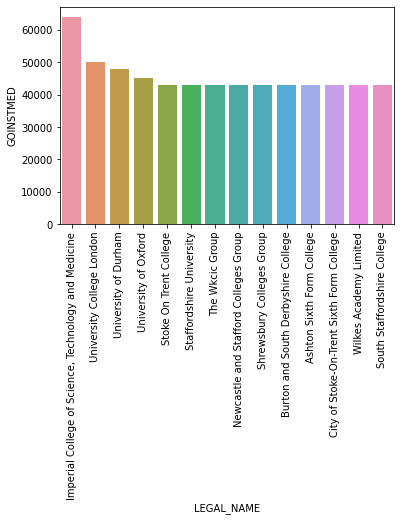

In [65]:
import seaborn as sns
mfcu=merged_df_computing.head(650)
ax4 = sns.barplot(x='LEGAL_NAME', y='GOINSTMED', data=mfcu)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)

In [66]:
grouped1 = merged_df.groupby('CAH2_Label').median()


In [67]:
grouped1 = grouped1.reset_index()

In [68]:
sns.set(rc={'figure.figsize':(14.7,10.27)})

In [358]:
# create a new dataframe with only the rows where CAH2_Label != 'A'
filtered_m_df = merged_df.loc[merged_df['CAH2_Label'] != 'allied health']
filtered_m_df = filtered_m_df.loc[filtered_m_df['CAH2_Label'] != 'media, journalism and communications']
filtered_m_df = filtered_m_df.loc[filtered_m_df['CAH2_Label'] != 'Celtic studies']
filtered_m_df = filtered_m_df.loc[filtered_m_df['CAH2_Label'] != 'general, applied and forensic sciences']
filtered_m_df = filtered_m_df.loc[filtered_m_df['CAH2_Label'] != 'combined and b



In [372]:
to_drop = ['allied health', 'media, journalism and communications', 'Celtic studies', 'general, applied and forensic sciences', 'combined and general studies']
filtered_m_df2 = merged_df[~merged_df['CAH2_Label'].isin(to_drop)].reset_index(drop=True)


In [373]:
labels_list = list(filtered_m_df2['CAH2_Label'].unique())
labels_list


['creative arts and design',
 'philosophy and religious studies',
 'sociology, social policy and anthropology',
 'sport and exercise sciences',
 'history and archaeology',
 'psychology',
 'biosciences',
 'politics',
 'performing arts',
 'education and teaching',
 'business and management',
 'computing',
 'health and social care',
 'English studies',
 'languages and area studies',
 'chemistry',
 'architecture, building and planning',
 'physics and astronomy',
 'nursing and midwifery',
 'medicine and dentistry',
 'law',
 'geography, earth and environmental studies',
 'medical sciences',
 'engineering',
 'agriculture, food and related studies',
 'veterinary sciences',
 'mathematical sciences',
 'pharmacology, toxicology and pharmacy',
 'economics',
 'materials and technology']

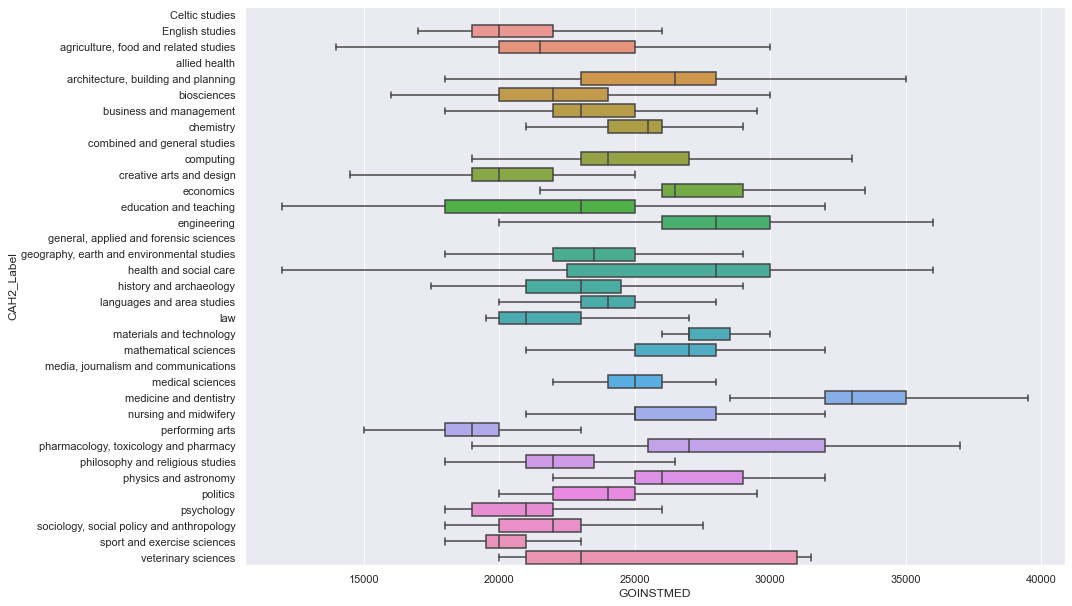

In [374]:
unwanted_labels = ['media, journalism and communications', 'Celtic studies', 'general, applied and forensic sciences', 'combined and general studies']




TypeError: boxplot() got an unexpected keyword argument 'by'

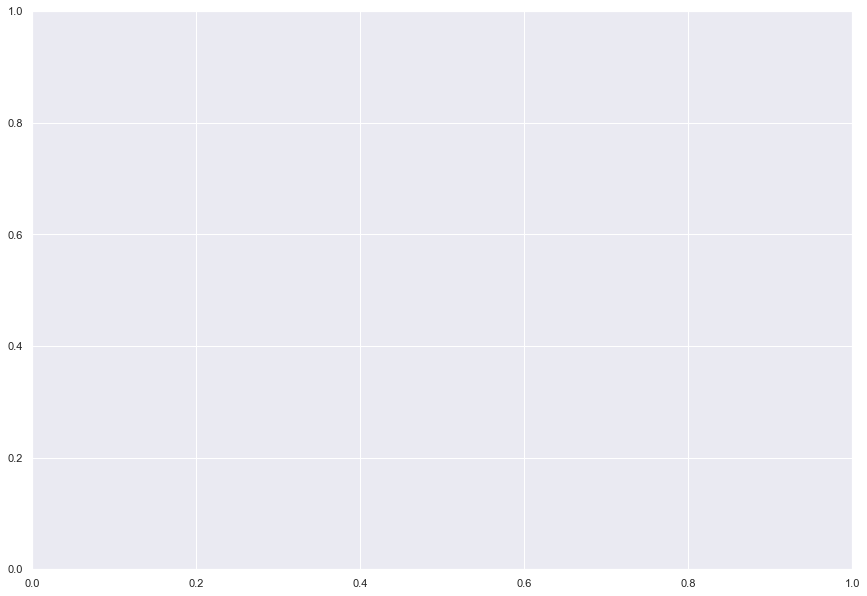

In [375]:
import matplotlib.pyplot as plt

# create a figure and axis
fig, ax = plt.subplots()

# create the boxplot
bp = ax.boxplot(filtered_m_df2['GOINSTMED'], by=filtered_m_df2['CAH2_Label'], showfliers=False)

# add labels and rotate the x axis labels
ax.set_xlabel('CAH2 Label')
ax.set_ylabel('GOINSTMED')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# show the plot
plt.show()


In [72]:
merged_df['CAH2_Label'] = pd.Categorical(merged_df['CAH2_Label'])

In [73]:
ECON = SAL_INST_NSS[["GOSALSBJ"]]
ECON

GOSALSBJ
0      CAH25-01
1      CAH25-01
2      CAH25-01
3      CAH25-01
4      CAH20-02
...         ...
90884  CAH13-01
90885  CAH13-01
90886  CAH13-01
90887  CAH13-01
90888  CAH13-01

[90889 rows x 1 columns]

In [74]:
ECON1 = merged_df[merged_df["CAH2_Code"] == "CAH15-02"]
ECON1

KISCOURSEID  GOSALSBJ  GOINSTLQ  GOINSTMED  GOINSTUQ  \
503985     ECON026_1  CAH15-02   21000.0    26000.0   31000.0   
503986     ECON026_1  CAH15-02   21000.0    26000.0   31000.0   
503987     ECON026_1  CAH15-02   21000.0    26000.0   31000.0   
503988     ECON026_1  CAH15-02   21000.0    26000.0   31000.0   
503989     ECON026_1  CAH15-02   21000.0    26000.0   31000.0   
...              ...       ...       ...        ...       ...   
505641     NN34-UBAF  CAH15-02   32000.0    40000.0   55000.0   
505642     L140-UBEM  CAH15-02   32000.0    40000.0   55000.0   
505643     L101-UBEC  CAH15-02   32000.0    40000.0   55000.0   
505644   GL11-UBMAEC  CAH15-02   32000.0    40000.0   55000.0   
505645  G1L1-UBMAWEC  CAH15-02   32000.0    40000.0   55000.0   

                                               LEGAL_NAME  \
503985                            Access To Music Limited   
503986                            Access To Music Limited   
503987                        Nottingham Trent University   
503988                        Nottingham Trent University   
503989                               Nova Centric Limited   
...                                                   ...   
505641  The London School of Economics and Political S...   
505642  The London School of Economics and Political S...   
505643  The London School of Economics and Political S...   
505644  The London School of Economics and Political S...   
505645  The London School of Economics and Political S...   

                                              PROVADDRESS  PUBUKPRN    Q1  \
503985  Heath Mill Studios, 68 Heath Mill Lane, Birmin...  10004797  89.0   
503986  Heath Mill Studios, 68 Heath Mill Lane, Birmin...  10004797  92.0   
503987         50 Shakespeare Street, Nottingham, NG1 4FQ  10004797  89.0   
503988         50 Shakespeare Street, Nottingham, NG1 4FQ  10004797  92.0   
503989          6-10, Convent Street, Nottingham, NG1 3LL  10004797  89.0   
...                                                   ...       ...   ...   
505641                  Houghton Street, London, WC2A 2AE  10004063  87.0   
505642                  Houghton Street, London, WC2A 2AE  10004063  85.0   
505643                  Houghton Street, London, WC2A 2AE  10004063  84.0   
505644                  Houghton Street, London, WC2A 2AE  10004063  86.0   
505645                  Houghton Street, London, WC2A 2AE  10004063  88.0   

          Q2  ...   Q20   Q21   Q22   Q23   Q24   Q25   Q26   Q27  CAH2_Code  \
503985  77.0  ...  86.0  60.0  91.0  83.0  75.0  55.0  67.0  87.0   CAH15-02   
503986  86.0  ...  89.0  62.0  89.0  95.0  73.0  57.0  57.0  92.0   CAH15-02   
503987  77.0  ...  86.0  60.0  91.0  83.0  75.0  55.0  67.0  87.0   CAH15-02   
503988  86.0  ...  89.0  62.0  89.0  95.0  73.0  57.0  57.0  92.0   CAH15-02   
503989  77.0  ...  86.0  60.0  91.0  83.0  75.0  55.0  67.0  87.0   CAH15-02   
...      ...  ...   ...   ...   ...   ...   ...   ...   ...   ...        ...   
505641  82.0  ...  91.0  63.0  93.0  85.0  72.0  62.0  75.0  80.0   CAH15-02   
505642  74.0  ...  92.0  55.0  63.0  84.0  68.0  52.0  58.0  82.0   CAH15-02   
505643  74.0  ...  91.0  54.0  60.0  85.0  66.0  53.0  57.0  83.0   CAH15-02   
505644  69.0  ...  97.0  58.0  43.0  86.0  64.0  33.0  50.0  78.0   CAH15-02   
505645  81.0  ...  88.0  67.0  63.0  75.0  81.0  50.0  44.0  88.0   CAH15-02   

        CAH2_Label  
503985   economics  
503986   economics  
503987   economics  
503988   economics  
503989   economics  
...            ...  
505641   economics  
505642   economics  
505643   economics  
505644   economics  
505645   economics  

[1661 rows x 37 columns]

In [75]:
Inst_Sal = merged_df.groupby('LEGAL_NAME').median().reset_index().sort_values('GOINSTMED', ascending=False)

In [76]:
Inst_Sal.head(50)

LEGAL_NAME  GOINSTLQ  GOINSTMED  \
245            University College of Estate Management   34000.0    40000.0   
99                            Hull York Medical School   30000.0    35000.0   
23                                    Birkbeck College   24000.0    35000.0   
102  Imperial College of Science, Technology and Me...   30000.0    33000.0   
204          The London Institute of Banking & Finance   28000.0    32000.0   
38                  Brighton and Sussex Medical School   28000.0    32000.0   
205  The London School of Economics and Political S...   25000.0    31500.0   
6                              Aecc University College   27000.0    30000.0   
211                             The University of Bath   27500.0    30000.0   
207                                The Open University   24000.0    30000.0   
34                              Bpp University Limited   23000.0    29000.0   
126                            Loughborough University   25500.0    28500.0   
240                                        Uck Limited   24000.0    28500.0   
8             Architectural Association (Incorporated)   27000.0    28000.0   
56                          City, University of London   25000.0    28000.0   
188               St. George's Hospital Medical School   25000.0    28000.0   
256                               University of Durham   25000.0    28000.0   
106                              King's College London   23000.0    27500.0   
231                           The University of Surrey   25000.0    27500.0   
153                    Queen Mary University of London   22000.0    27000.0   
209                       The Royal Veterinary College   20500.0    27000.0   
244                          University College London   25000.0    27000.0   
9                             Arden University Limited   23000.0    27000.0   
232                          The University of Warwick   24000.0    27000.0   
177                    South & City College Birmingham   17000.0    27000.0   
270                               University of Oxford   23000.0    26500.0   
141                            Norland College Limited   22000.0    26500.0   
30                        Bloomsbury Institute Limited   24000.0    26500.0   
19                   Basingstoke College of Technology   22500.0    26000.0   
21         Berkshire College of Agriculture, the (Bca)   22500.0    26000.0   
229                          The University of Reading   22500.0    26000.0   
98                              Heriot-Watt University   23000.0    26000.0   
251                              University of Bristol   22500.0    26000.0   
275                          University of Southampton   22000.0    25500.0   
277                    University of St Mark & St John   24000.0    25500.0   
259                               University of Exeter   22000.0    25500.0   
16                                    Aston University   22000.0    25500.0   
92                             Harper Adams University   22500.0    25000.0   
90                   Guildhall School of Music & Drama   20000.0    25000.0   
157                           Robert Gordon University   24000.0    25000.0   
186                          St Mellitus College Trust   24000.0    25000.0   
63                                 Coventry University   21000.0    25000.0   
107                                Kingston University   20000.0    25000.0   
78                                      Exeter College   18000.0    25000.0   
236                  Trinity College (Bristol) Limited   24000.0    25000.0   
47                                 Capel Manor College   21000.0    25000.0   
42                            Brunel University London   22000.0    25000.0   
269                      University of Nottingham, the   22000.0    25000.0   
292                 University of the West of Scotland   20000.0    25000.0   
123                       London South Bank University   19500.0    25000.0   

     GOINSTUQ 

In [77]:
top_10 = Inst_Sal.head(10)
bottom_10 = Inst_Sal.tail(10)

combined_df = pd.concat([top_10, bottom_10])

In [78]:
cdf =combined_df[['LEGAL_NAME', 'GOINSTLQ', 'GOINSTMED', 'GOINSTUQ']]

In [79]:
from IPython.display import display, HTML

display(HTML(cdf.to_html()))

<AxesSubplot:xlabel='LEGAL_NAME', ylabel='GOINSTMED'>

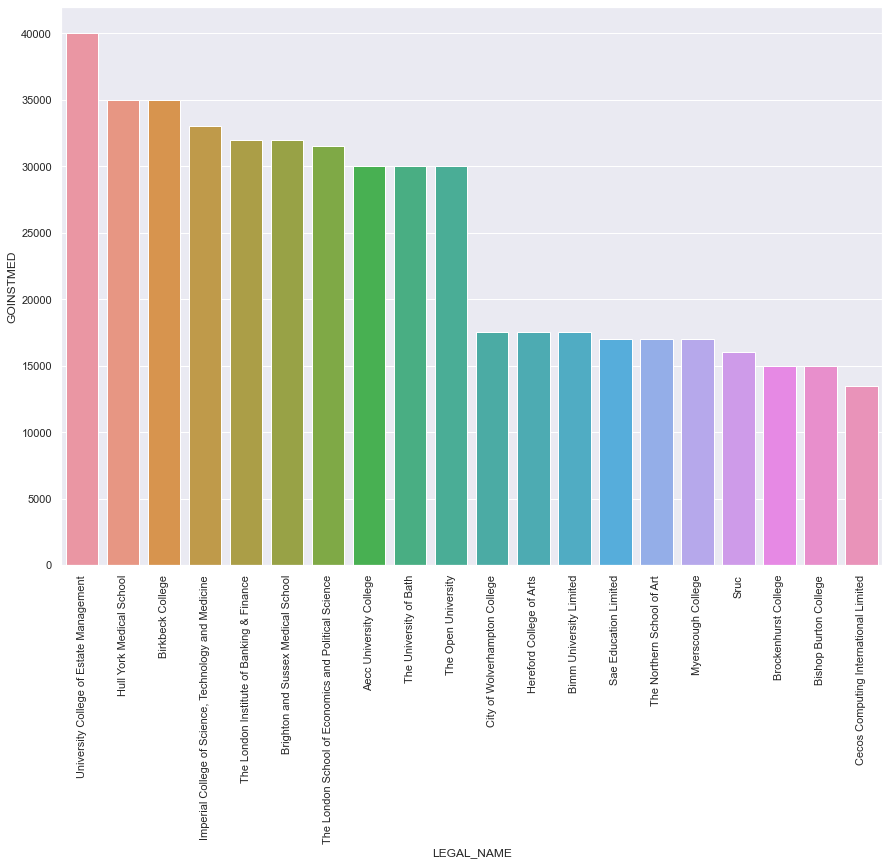

In [80]:
ax2 = sns.barplot(x='LEGAL_NAME', y='GOINSTMED', data=combined_df)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90) 
ax2

In [81]:
merged_df.to_csv('Tableau_Public_HESA1.csv')

In [82]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder()

# Fit the encoder to the 'LEGAL_NAME' column
encoder.fit(merged_df[['LEGAL_NAME']])

# Perform the encoding
one_hot_encoded = encoder.transform(merged_df[['LEGAL_NAME']]).toarray()

# Create a new dataframe with the encoded data
encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names(['LEGAL_NAME']))

# Concatenate the original dataframe with the encoded dataframe
merged_df2 = pd.concat([merged_df, encoded_df], axis=1)

In [83]:
LOCA = pd.read_csv('/Users/student/Documents/GitHub/HESA-Data/Data/LOCATION.csv')
LOCA

UKPRN                                           ACCOMURL ACCOMURLW  \
0    10000055  https://www.brookes.ac.uk/studying-at-brookes/...       NaN   
1    10000163  http://www.aecc.ac.uk/undergrad/accommodation....       NaN   
2    10000216      https://www.allnations.ac.uk/fees-and-finance       NaN   
3    10000291       https://aru.ac.uk/student-life/accommodation       NaN   
4    10000291       https://aru.ac.uk/student-life/accommodation       NaN   
..        ...                                                ...       ...   
959  90000451  https://www.harperkeelevetschool.ac.uk/about/4...       NaN   
960  90000451  https://www.harperkeelevetschool.ac.uk/about/4...       NaN   
961  99999997  https://www.gre.ac.uk/accommodation/accommodat...       NaN   
962  99999998          http://www.york.ac.uk/accommodation-costs       NaN   
963  99999999     http://www.bsms.ac.uk/undergraduate/our-course       NaN   

    LOCID                                            LOCNAME LOCNAMEW  \
0      AB       Abingdon &; Witney College (Abingdon Campus)      NaN   
1      AE                            AECC University College      NaN   
2      AN                      All Nations Christian College      NaN   
3      AA                              ARU Chelmsford Campus      NaN   
4      CC                               ARU Cambridge Campus      NaN   
..    ...                                                ...      ...   
959    HA  Split between Harper Adams and Keele Universit...      NaN   
960    KE  Split between Keele and Harper Adams Universit...      NaN   
961    ME                                      Medway Campus      NaN   
962    Y1                             The University of York      NaN   
963    KF                                             Falmer      NaN   

      LATITUDE  LONGITUDE    LOCUKPRN LOCCOUNTRY  \
0    51.680769  -1.286935  10000055.0         XF   
1    50.727180  -1.828588         NaN         XF   
2    51.802520   0.000933  10000216.0         XF   
3    51.741576   0.473405  10000291.0         XF   
4    52.203718   0.134123  10000291.0         XF   
..         ...        ...         ...        ...   
959  52.779896  -2.425558  10040812.0         XF   
960  53.001885  -2.273027  10007767.0         XF   
961  51.396930   0.539673         NaN         XF   
962  53.948333  -1.053611  10007167.0         XF   
963  50.860268  -0.085662  99999999.0         XF   

                                                 SUURL SUURLW  
0    https://www.abingdon-witney.ac.uk/student-life...    NaN  
1       http://www.aecc.ac.uk/undergrad/su/suhome.aspx    NaN  
2    https://www.allnations.ac.uk/community-life/st...    NaN  
3                         http://www.angliastudent.com    NaN  
4                         http://www.angliastudent.com    NaN  
..                                                 ...    ...  
959  https://www.harperkeelevetschool.ac.uk/about/4...    NaN  
960  https://www.harperkeelevetschool.ac.uk/about/4...    NaN  
961                     https://www.greenwichsu.co.uk/    NaN  
962                               http://www.yusu.org/    NaN  
963  http://www.bsms.ac.uk/undergraduate/campus-lif...    NaN  

[964 rows x 12 columns]

In [84]:
LOCA.drop(columns=['ACCOMURL', 'ACCOMURLW', 'LOCNAMEW','SUURL', 'SUURLW'], inplace=True)

In [85]:
LOCA

UKPRN LOCID                                            LOCNAME  \
0    10000055    AB       Abingdon &; Witney College (Abingdon Campus)   
1    10000163    AE                            AECC University College   
2    10000216    AN                      All Nations Christian College   
3    10000291    AA                              ARU Chelmsford Campus   
4    10000291    CC                               ARU Cambridge Campus   
..        ...   ...                                                ...   
959  90000451    HA  Split between Harper Adams and Keele Universit...   
960  90000451    KE  Split between Keele and Harper Adams Universit...   
961  99999997    ME                                      Medway Campus   
962  99999998    Y1                             The University of York   
963  99999999    KF                                             Falmer   

      LATITUDE  LONGITUDE    LOCUKPRN LOCCOUNTRY  
0    51.680769  -1.286935  10000055.0         XF  
1    50.727180  -1.828588         NaN         XF  
2    51.802520   0.000933  10000216.0         XF  
3    51.741576   0.473405  10000291.0         XF  
4    52.203718   0.134123  10000291.0         XF  
..         ...        ...         ...        ...  
959  52.779896  -2.425558  10040812.0         XF  
960  53.001885  -2.273027  10007767.0         XF  
961  51.396930   0.539673         NaN         XF  
962  53.948333  -1.053611  10007167.0         XF  
963  50.860268  -0.085662  99999999.0         XF  

[964 rows x 7 columns]

In [86]:
Tariff = pd.read_csv('/Users/student/Documents/HESA Data/TARIFF.csv')
Tariff

PUBUKPRN     UKPRN              KISCOURSEID  KISMODE  TARUNAVAILREASON  \
0      10000047  10001143              PSSFDOPTDIS        1                 0   
1      10000055  10000055                     AB37        1                 1   
2      10000055  10004930                 FDSC-ATR        1                 0   
3      10000055  10004930                 FDSC-ATR        2                 1   
4      10000080  10004797                NTAD162_1        1                 0   
...         ...       ...                      ...      ...               ...   
43290  99999997  99999997                    K0259        1                 0   
43291  99999997  99999997                    K0604        1                 0   
43292  99999998  99999998  UUBMEDSGWY6~UUBMEDSGWY6        1                 1   
43293  99999998  99999998   UUBMEDSMED5~UBMEDSYRK5        1                 0   
43294  99999999  99999999               N1EJ001FUU        1                 0   

       TARPOP  TARAGG       TARSBJ  T001  T048  ...  T096  T112  T128  T144  \
0         NaN     NaN          NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   
1         NaN     NaN          NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   
2        20.0    23.0  CAH06-01-01   5.0   5.0  ...  30.0  10.0   5.0  10.0   
3         NaN     NaN          NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   
4         NaN     NaN          NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   
...       ...     ...          ...   ...   ...  ...   ...   ...   ...   ...   
43290    45.0    14.0          NaN   0.0   0.0  ...  35.0  25.0  20.0   0.0   
43291    60.0    14.0          NaN   2.0   3.0  ...  18.0  10.0  13.0   8.0   
43292   220.0    13.0  CAH01-01-02   0.0   0.0  ...   0.0   6.0  15.0  26.0   
43293   110.0    14.0          NaN   1.0   0.0  ...   1.0   0.0  13.0  27.0   
43294   135.0    14.0          NaN   0.0   0.0  ...   0.0   0.0   5.0  30.0   

       T160  T176  T192  T208  T224  T240  
0       NaN   NaN   NaN   NaN   NaN   NaN  
1       NaN   NaN   NaN   NaN   NaN   NaN  
2       5.0   0.0   0.0   0.0   0.0   5.0  
3       NaN   NaN   NaN   NaN   NaN   NaN  
4       NaN   NaN   NaN   NaN   NaN   NaN  
...     ...   ...   ...   ...   ...   ...  
43290   0.0   0.0   5.0   0.0   0.0   0.0  
43291   7.0   0.0   0.0   0.0   0.0   0.0  
43292  22.0  13.0   6.0   5.0   3.0   2.0  
43293  25.0  12.0   9.0   5.0   5.0   3.0  
43294  27.0  10.0   8.0   7.0   5.0   6.0  

[43295 rows x 22 columns]

In [87]:
import numpy as np

# Count the number of NaN values in each row
nan_count = Tariff[['T001','T048','T096','T112','T128','T144','T160','T176','T192','T208','T224']].isna().sum(axis=1)

# Divide the count by the total number of columns (11) to get the percentage of NaN values in each row
nan_percent = nan_count / 11

# Find the rows where over half of the columns have NaN values
over_half_nan = nan_percent > 0.5

# Drop the rows that have over half of the columns as NaN
Tariff2 = Tariff[~over_half_nan]


In [88]:
Tariff2

PUBUKPRN     UKPRN              KISCOURSEID  KISMODE  TARUNAVAILREASON  \
2      10000055  10004930                 FDSC-ATR        1                 0   
5      10000163  10000163             BSCERSF-C608        1                 0   
7      10000163  10000163              BSRDIF-B821        1                 0   
8      10000163  10000163              BSRROF-B822        1                 0   
9      10000163  10000163              BSSEHF-C607        1                 0   
...         ...       ...                      ...      ...               ...   
43290  99999997  99999997                    K0259        1                 0   
43291  99999997  99999997                    K0604        1                 0   
43292  99999998  99999998  UUBMEDSGWY6~UUBMEDSGWY6        1                 1   
43293  99999998  99999998   UUBMEDSMED5~UBMEDSYRK5        1                 0   
43294  99999999  99999999               N1EJ001FUU        1                 0   

       TARPOP  TARAGG       TARSBJ  T001  T048  ...  T096  T112  T128  T144  \
2        20.0    23.0  CAH06-01-01   5.0   5.0  ...  30.0  10.0   5.0  10.0   
5        10.0    13.0  CAH03-02-01   0.0   0.0  ...  10.0  10.0  25.0  45.0   
7        90.0    11.0        CAH02   2.0   0.0  ...  16.0  17.0  16.0  19.0   
8        90.0    11.0        CAH02   2.0   0.0  ...  16.0  17.0  16.0  19.0   
9        10.0    14.0          NaN   0.0   0.0  ...  10.0  10.0  25.0  45.0   
...       ...     ...          ...   ...   ...  ...   ...   ...   ...   ...   
43290    45.0    14.0          NaN   0.0   0.0  ...  35.0  25.0  20.0   0.0   
43291    60.0    14.0          NaN   2.0   3.0  ...  18.0  10.0  13.0   8.0   
43292   220.0    13.0  CAH01-01-02   0.0   0.0  ...   0.0   6.0  15.0  26.0   
43293   110.0    14.0          NaN   1.0   0.0  ...   1.0   0.0  13.0  27.0   
43294   135.0    14.0          NaN   0.0   0.0  ...   0.0   0.0   5.0  30.0   

       T160  T176  T192  T208  T224  T240  
2       5.0   0.0   0.0   0.0   0.0   5.0  
5       0.0   0.0   0.0   0.0  10.0   0.0  
7      11.0   2.0   0.0   1.0   0.0   2.0  
8      11.0   2.0   0.0   1.0   0.0   2.0  
9       0.0   0.0   0.0   0.0  10.0   0.0  
...     ...   ...   ...   ...   ...   ...  
43290   0.0   0.0   5.0   0.0   0.0   0.0  
43291   7.0   0.0   0.0   0.0   0.0   0.0  
43292  22.0  13.0   6.0   5.0   3.0   2.0  
43293  25.0  12.0   9.0   5.0   5.0   3.0  
43294  27.0  10.0   8.0   7.0   5.0   6.0  

[36186 rows x 22 columns]

In [89]:
Regdf =merged_df[['KISCOURSEID', 'GOINSTMED']]

In [90]:
reg_tar = Tariff2[['KISCOURSEID', 'T001', 'T240']]

In [91]:
Reg = pd.merge(Regdf, reg_tar, on='KISCOURSEID', how='inner')


In [92]:
Reg

KISCOURSEID  GOINSTMED  T001  T240
0       KUZBAADHMACF    12000.0   0.0   0.0
1       KUZBAADHMACF    12000.0   2.0   2.0
2       KUZBAADHMACF    12000.0   0.0   0.0
3       KUZBAADHMACF    12000.0   2.0   2.0
4       KUZBAADHMACF    12000.0   0.0   0.0
...              ...        ...   ...   ...
929349      UFBAWELA    25000.0   0.0   0.0
929350      UFBAWPWA    25000.0   0.0   5.0
929351      UFBAWPWA    25000.0   0.0   5.0
929352      UFBAWPWA    25000.0   0.0   5.0
929353      UFBAWPWA    25000.0   0.0   5.0

[929354 rows x 4 columns]

In [93]:
from sklearn.linear_model import LinearRegression

# Assign the feature columns to X
X = Reg[['T240', 'T001']]

# Assign the median pay column to y
y = Reg['GOINSTMED']

# Create an instance of the LinearRegression model
reg = LinearRegression()

# Fit the model using the feature and target data
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
# Fit the linear regression model
reg.fit(X, y)

# Get the R-squared value for the model
r_squared = reg.score(X, y)
print("R-squared value:", r_squared)


R-squared value: 0.03180163452428808


In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

y_pred = reg.predict(X)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
evs = explained_variance_score(y, y_pred)

print("Mean squared error:", mse)
print("Mean absolute error:", mae)
print("Explained variance score:", evs)


Mean squared error: 16074269.633146057
Mean absolute error: 2750.8674664674254
Explained variance score: 0.03180163452428819


In [96]:
print(reg.coef_)

[ 86.47709728 -34.8234866 ]


In [97]:
corr_matrix = Reg.corr()
print(corr_matrix)

           GOINSTMED      T001      T240
GOINSTMED   1.000000 -0.058368  0.173867
T001       -0.058368  1.000000 -0.109022
T240        0.173867 -0.109022  1.000000


In [98]:
Reg

KISCOURSEID  GOINSTMED  T001  T240
0       KUZBAADHMACF    12000.0   0.0   0.0
1       KUZBAADHMACF    12000.0   2.0   2.0
2       KUZBAADHMACF    12000.0   0.0   0.0
3       KUZBAADHMACF    12000.0   2.0   2.0
4       KUZBAADHMACF    12000.0   0.0   0.0
...              ...        ...   ...   ...
929349      UFBAWELA    25000.0   0.0   0.0
929350      UFBAWPWA    25000.0   0.0   5.0
929351      UFBAWPWA    25000.0   0.0   5.0
929352      UFBAWPWA    25000.0   0.0   5.0
929353      UFBAWPWA    25000.0   0.0   5.0

[929354 rows x 4 columns]

In [99]:
Tariff2

PUBUKPRN     UKPRN              KISCOURSEID  KISMODE  TARUNAVAILREASON  \
2      10000055  10004930                 FDSC-ATR        1                 0   
5      10000163  10000163             BSCERSF-C608        1                 0   
7      10000163  10000163              BSRDIF-B821        1                 0   
8      10000163  10000163              BSRROF-B822        1                 0   
9      10000163  10000163              BSSEHF-C607        1                 0   
...         ...       ...                      ...      ...               ...   
43290  99999997  99999997                    K0259        1                 0   
43291  99999997  99999997                    K0604        1                 0   
43292  99999998  99999998  UUBMEDSGWY6~UUBMEDSGWY6        1                 1   
43293  99999998  99999998   UUBMEDSMED5~UBMEDSYRK5        1                 0   
43294  99999999  99999999               N1EJ001FUU        1                 0   

       TARPOP  TARAGG       TARSBJ  T001  T048  ...  T096  T112  T128  T144  \
2        20.0    23.0  CAH06-01-01   5.0   5.0  ...  30.0  10.0   5.0  10.0   
5        10.0    13.0  CAH03-02-01   0.0   0.0  ...  10.0  10.0  25.0  45.0   
7        90.0    11.0        CAH02   2.0   0.0  ...  16.0  17.0  16.0  19.0   
8        90.0    11.0        CAH02   2.0   0.0  ...  16.0  17.0  16.0  19.0   
9        10.0    14.0          NaN   0.0   0.0  ...  10.0  10.0  25.0  45.0   
...       ...     ...          ...   ...   ...  ...   ...   ...   ...   ...   
43290    45.0    14.0          NaN   0.0   0.0  ...  35.0  25.0  20.0   0.0   
43291    60.0    14.0          NaN   2.0   3.0  ...  18.0  10.0  13.0   8.0   
43292   220.0    13.0  CAH01-01-02   0.0   0.0  ...   0.0   6.0  15.0  26.0   
43293   110.0    14.0          NaN   1.0   0.0  ...   1.0   0.0  13.0  27.0   
43294   135.0    14.0          NaN   0.0   0.0  ...   0.0   0.0   5.0  30.0   

       T160  T176  T192  T208  T224  T240  
2       5.0   0.0   0.0   0.0   0.0   5.0  
5       0.0   0.0   0.0   0.0  10.0   0.0  
7      11.0   2.0   0.0   1.0   0.0   2.0  
8      11.0   2.0   0.0   1.0   0.0   2.0  
9       0.0   0.0   0.0   0.0  10.0   0.0  
...     ...   ...   ...   ...   ...   ...  
43290   0.0   0.0   5.0   0.0   0.0   0.0  
43291   7.0   0.0   0.0   0.0   0.0   0.0  
43292  22.0  13.0   6.0   5.0   3.0   2.0  
43293  25.0  12.0   9.0   5.0   5.0   3.0  
43294  27.0  10.0   8.0   7.0   5.0   6.0  

[36186 rows x 22 columns]

As we can see that there is no significant correlation using the top and bottom groups, I will transfer the columns into 5 different variables, very low, low, mid, high and very high tariff scores. For reference:
A*	56
A	48
B	40
C	32
D	24
E	16
So to get into the top category, an individual requires more the 4 A* A levels
Most universities seem to accept that 112 UCAS points are the standard for the average UK student. Many different universities assess their candidates on many different factors as part of their criteria and the tariff point requirements give them much flexibility to do so.

In [100]:
tar_med =Tariff2.groupby('PUBUKPRN').median()
tar_med = tar_med[['T001', 'T048','T064','T080','T096','T112','T128','T144','T160','T176', 'T192','T208','T224','T240']]

In [101]:
tar_med

T001  T048  T064  T080  T096  T112  T128  T144  T160  T176  T192  \
PUBUKPRN                                                                     
10000055   5.0   5.0   5.0  15.0  30.0  10.0   5.0  10.0   5.0   0.0   0.0   
10000163   1.0   0.0   1.0   5.0  12.5  13.0  20.5  32.0   5.5   1.0   0.0   
10000291   5.0   7.0  13.0  15.0  15.0  16.0   9.0   5.0  10.0   0.0   0.0   
10000381   2.5   2.5   2.5  15.0  12.5   7.5  12.5  12.5  12.5   5.0   0.0   
10000385   0.0   0.0   1.0   4.0  10.0  20.0  13.0  11.0  18.0   5.0   4.0   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
10086591   5.0  10.0  15.0  25.0  20.0  15.0   0.0   5.0   5.0   0.0   0.0   
90000451   0.0   0.0   0.0   5.0   0.0  15.0  25.0  20.0  10.0  15.0   5.0   
99999997   1.0   1.5   7.5  14.0  26.5  17.5  16.5   4.0   3.5   0.0   2.5   
99999998   0.5   0.0   0.0   0.5   0.5   3.0  14.0  26.5  23.5  12.5   7.5   
99999999   0.0   0.0   1.0   1.0   0.0   0.0   5.0  30.0  27.0  10.0   8.0   

          T208  T224  T240  
PUBUKPRN                    
10000055   0.0   0.0   5.0  
10000163   0.5   5.0   1.0  
10000291   0.0   0.0   0.0  
10000381  12.5   0.0   5.0  
10000385   2.0   5.0   5.0  
...        ...   ...   ...  
10086591   0.0   0.0   0.0  
90000451   5.0   5.0   5.0  
99999997   0.0   0.0   0.0  
99999998   5.0   4.0   2.5  
99999999   7.0   5.0   6.0  

[256 rows x 14 columns]

In [102]:
tar_med['T1'] = tar_med['T001'] * 0.01
tar_med['T48'] = tar_med['T048'] * 0.48
tar_med['T64'] = tar_med['T064'] * 0.64
tar_med['T80'] = tar_med['T080'] * 0.80
tar_med['T96'] = tar_med['T096'] * 0.96
tar_med['TN112'] = tar_med['T112'] * 1.12
tar_med['TN128'] = tar_med['T128'] * 1.28
tar_med['TN144'] = tar_med['T144'] * 1.44
tar_med['TN160'] = tar_med['T160'] * 1.60
tar_med['TN176'] = tar_med['T176'] * 1.76
tar_med['TN192'] = tar_med['T192'] * 1.92
tar_med['TN208'] = tar_med['T208'] * 2.08
tar_med['TN224'] = tar_med['T224'] * 2.24
tar_med['TN240'] = tar_med['T240'] * 2.40


In [103]:
tar_med2=tar_med[['T1','T48','T64','T80','T96','TN112','TN128','TN144','TN160','TN176','TN192','TN208','TN224','TN240']]

In [104]:
summed_data2 = tar_med2.sum()

In [105]:
tar_med2

T1   T48   T64   T80    T96  TN112  TN128  TN144  TN160  TN176  \
PUBUKPRN                                                                      
10000055  0.050  2.40  3.20  12.0  28.80  11.20   6.40  14.40    8.0   0.00   
10000163  0.010  0.00  0.64   4.0  12.00  14.56  26.24  46.08    8.8   1.76   
10000291  0.050  3.36  8.32  12.0  14.40  17.92  11.52   7.20   16.0   0.00   
10000381  0.025  1.20  1.60  12.0  12.00   8.40  16.00  18.00   20.0   8.80   
10000385  0.000  0.00  0.64   3.2   9.60  22.40  16.64  15.84   28.8   8.80   
...         ...   ...   ...   ...    ...    ...    ...    ...    ...    ...   
10086591  0.050  4.80  9.60  20.0  19.20  16.80   0.00   7.20    8.0   0.00   
90000451  0.000  0.00  0.00   4.0   0.00  16.80  32.00  28.80   16.0  26.40   
99999997  0.010  0.72  4.80  11.2  25.44  19.60  21.12   5.76    5.6   0.00   
99999998  0.005  0.00  0.00   0.4   0.48   3.36  17.92  38.16   37.6  22.00   
99999999  0.000  0.00  0.64   0.8   0.00   0.00   6.40  43.20   43.2  17.60   

          TN192  TN208  TN224  TN240  
PUBUKPRN                              
10000055   0.00   0.00   0.00   12.0  
10000163   0.00   1.04  11.20    2.4  
10000291   0.00   0.00   0.00    0.0  
10000381   0.00  26.00   0.00   12.0  
10000385   7.68   4.16  11.20   12.0  
...         ...    ...    ...    ...  
10086591   0.00   0.00   0.00    0.0  
90000451   9.60  10.40  11.20   12.0  
99999997   4.80   0.00   0.00    0.0  
99999998  14.40  10.40   8.96    6.0  
99999999  15.36  14.56  11.20   14.4  

[256 rows x 14 columns]

In [106]:
columns_to_sum = ['T1', 'T48', 'T64', 'T80', 'T96', 'TN112', 'TN128', 'TN144', 'TN160', 'TN176', 'TN192', 'TN208', 'TN224', 'TN240']
tar_med2['AV_POINTS'] = tar_med2[columns_to_sum].sum(axis=1)

# Print the resulting dataframe
tar_med2

/var/folders/6v/frfm3vq14mb9sylyn98y9qrw0000gp/T/ipykernel_15785/2683612474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tar_med2['AV_POINTS'] = tar_med2[columns_to_sum].sum(axis=1)


T1   T48   T64   T80    T96  TN112  TN128  TN144  TN160  TN176  \
PUBUKPRN                                                                      
10000055  0.050  2.40  3.20  12.0  28.80  11.20   6.40  14.40    8.0   0.00   
10000163  0.010  0.00  0.64   4.0  12.00  14.56  26.24  46.08    8.8   1.76   
10000291  0.050  3.36  8.32  12.0  14.40  17.92  11.52   7.20   16.0   0.00   
10000381  0.025  1.20  1.60  12.0  12.00   8.40  16.00  18.00   20.0   8.80   
10000385  0.000  0.00  0.64   3.2   9.60  22.40  16.64  15.84   28.8   8.80   
...         ...   ...   ...   ...    ...    ...    ...    ...    ...    ...   
10086591  0.050  4.80  9.60  20.0  19.20  16.80   0.00   7.20    8.0   0.00   
90000451  0.000  0.00  0.00   4.0   0.00  16.80  32.00  28.80   16.0  26.40   
99999997  0.010  0.72  4.80  11.2  25.44  19.60  21.12   5.76    5.6   0.00   
99999998  0.005  0.00  0.00   0.4   0.48   3.36  17.92  38.16   37.6  22.00   
99999999  0.000  0.00  0.64   0.8   0.00   0.00   6.40  43.20   43.2  17.60   

          TN192  TN208  TN224  TN240  AV_POINTS  
PUBUKPRN                                         
10000055   0.00   0.00   0.00   12.0     98.450  
10000163   0.00   1.04  11.20    2.4    128.730  
10000291   0.00   0.00   0.00    0.0     90.770  
10000381   0.00  26.00   0.00   12.0    136.025  
10000385   7.68   4.16  11.20   12.0    140.960  
...         ...    ...    ...    ...        ...  
10086591   0.00   0.00   0.00    0.0     85.650  
90000451   9.60  10.40  11.20   12.0    167.200  
99999997   4.80   0.00   0.00    0.0     99.050  
99999998  14.40  10.40   8.96    6.0    159.685  
99999999  15.36  14.56  11.20   14.4    167.360  

[256 rows x 15 columns]

In [107]:
tar_med2 = tar_med2.reset_index()
AV_Points = tar_med2[['PUBUKPRN', 'AV_POINTS']]

In [109]:
PUB_m_df = merged_df.groupby('PUBUKPRN').median().reset_index()

In [110]:
Reg4 = pd.merge(PUB_m_df, AV_Points, on='PUBUKPRN', how='inner')

In [111]:
corr_matrix3 = Reg4.corr()
print(corr_matrix3)

           PUBUKPRN  GOINSTLQ  GOINSTMED  GOINSTUQ        Q1        Q2  \
PUBUKPRN   1.000000  0.295222   0.319985  0.268005 -0.143571 -0.081463   
GOINSTLQ   0.295222  1.000000   0.872484  0.751304 -0.311514 -0.313639   
GOINSTMED  0.319985  0.872484   1.000000  0.903662 -0.380354 -0.313471   
GOINSTUQ   0.268005  0.751304   0.903662  1.000000 -0.319832 -0.263183   
Q1        -0.143571 -0.311514  -0.380354 -0.319832  1.000000  0.735110   
Q2        -0.081463 -0.313639  -0.313471 -0.263183  0.735110  1.000000   
Q3         0.134856  0.047862   0.033468  0.061328  0.557322  0.627211   
Q4         0.059230 -0.273257  -0.268006 -0.234547  0.598509  0.630468   
Q5        -0.152714 -0.209948  -0.238478 -0.238723  0.637519  0.683726   
Q6         0.067359 -0.035705  -0.118662 -0.149175  0.515214  0.417448   
Q7         0.226612 -0.132068  -0.146519 -0.172454  0.350413  0.444813   
Q8        -0.142494 -0.424878  -0.487953 -0.461281  0.536447  0.351762   
Q9        -0.092426 -0.385302  -0.4418

In [114]:
import matplotlib.pyplot as plt

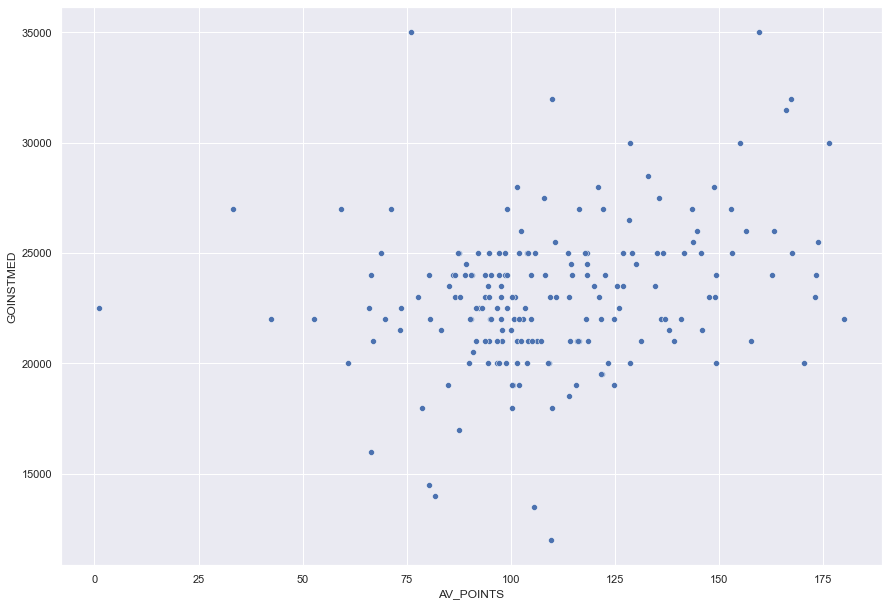

In [115]:
sns.scatterplot(x='AV_POINTS', y='GOINSTMED', data=Reg4)

# Show the plot
plt.show()


In [117]:
from sklearn.linear_model import LinearRegression

# Assign the feature columns to X
X = Reg4[['AV_POINTS']]

# Assign the median pay column to y
y = Reg4['GOINSTMED']

# Create an instance of the LinearRegression model
reg = LinearRegression()

# Fit the model using the feature and target data
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
# Fit the linear regression model
reg.fit(X, y)

# Get the R-squared value for the model
r_squared = reg.score(X, y)
print("R-squared value:", r_squared)

R-squared value: 0.07143010072303191


In [119]:
print(reg.intercept_, reg.coef_, reg.score(X, y))

19623.060843161456 [31.20163275] 0.07143010072303191


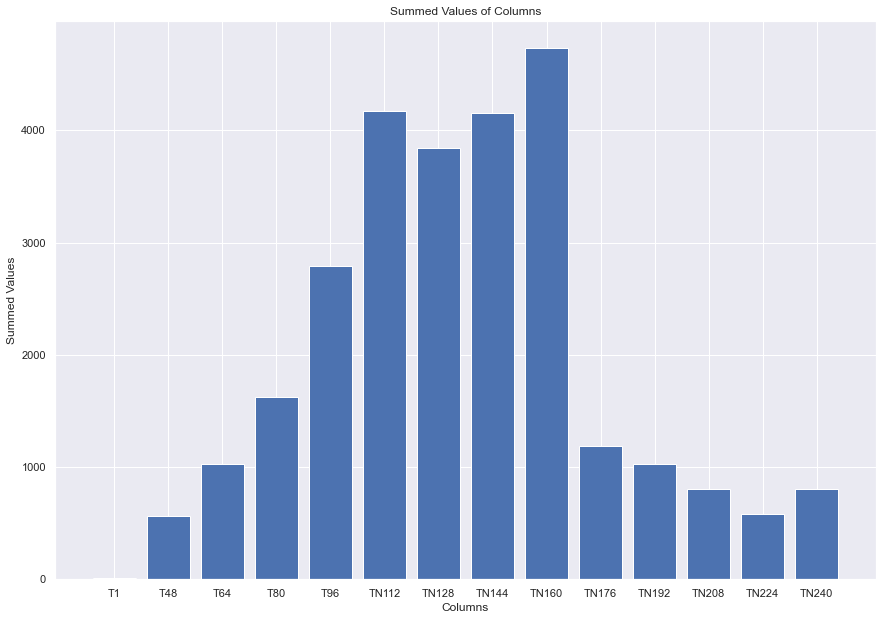

In [120]:
import matplotlib.pyplot as plt

# Create a bar chart of the data
plt.bar(summed_data2.index, summed_data2.values)

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Summed Values')
plt.title('Summed Values of Columns')

# Show the plot
plt.show()


In [121]:
Tariff2['Low'] = Tariff2[['T001', 'T048','T064','T080']].sum(axis=1)


/var/folders/6v/frfm3vq14mb9sylyn98y9qrw0000gp/T/ipykernel_15785/3540812382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tariff2['Low'] = Tariff2[['T001', 'T048','T064','T080']].sum(axis=1)


In [122]:
Tariff2['Average'] = Tariff2[['T096', 'T112','T128']].sum(axis=1)

/var/folders/6v/frfm3vq14mb9sylyn98y9qrw0000gp/T/ipykernel_15785/3865904241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tariff2['Average'] = Tariff2[['T096', 'T112','T128']].sum(axis=1)


In [123]:
Tariff2['High'] = Tariff2[['T144', 'T160','T176']].sum(axis=1)

/var/folders/6v/frfm3vq14mb9sylyn98y9qrw0000gp/T/ipykernel_15785/802821717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tariff2['High'] = Tariff2[['T144', 'T160','T176']].sum(axis=1)


In [124]:
Tariff2['Very_High'] = Tariff2[['T192', 'T208','T224', 'T240']].sum(axis=1)

/var/folders/6v/frfm3vq14mb9sylyn98y9qrw0000gp/T/ipykernel_15785/3543764133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tariff2['Very_High'] = Tariff2[['T192', 'T208','T224', 'T240']].sum(axis=1)


In [125]:
reg_tar2 = Tariff2[['PUBUKPRN','KISCOURSEID', 'Low', 'Average', 'High', 'Very_High']]

In [126]:
PUB_reg_tar2 = reg_tar2.groupby('PUBUKPRN').median().reset_index()

In [127]:
PUB_m_df = merged_df.groupby('PUBUKPRN').median().reset_index()

In [128]:
PUB_m_df = PUB_m_df[['PUBUKPRN', 'GOINSTMED']]
PUB_m_df

PUBUKPRN  GOINSTMED
0    10000163    30000.0
1    10000291    24000.0
2    10000381    22000.0
3    10000385    22000.0
4    10000415    21500.0
..        ...        ...
220  10067853    23000.0
221  10080811    20000.0
222  99999997    27000.0
223  99999998    35000.0
224  99999999    32000.0

[225 rows x 2 columns]

In [129]:
Reg3 = pd.merge(PUB_m_df, PUB_reg_tar2, on='PUBUKPRN', how='inner')

In [130]:
Reg3=Reg3.set_index('PUBUKPRN')

In [131]:
Reg3

GOINSTMED   Low  Average  High  Very_High
PUBUKPRN                                           
10000163    30000.0   7.5     46.0  39.0        6.5
10000291    24000.0  40.0     40.0  18.0        0.0
10000381    22000.0  22.5     32.5  30.0       17.5
10000385    22000.0  10.0     41.0  35.0       15.0
10000571    20000.0  24.0     54.0  20.0        1.0
...             ...   ...      ...   ...        ...
10067853    23000.0  50.5     34.5  14.0        3.5
10080811    20000.0  22.0     35.0  35.0        0.0
99999997    27000.0  24.0     60.5   7.5        2.5
99999998    35000.0   1.0     17.5  62.5       19.0
99999999    32000.0   2.0      5.0  67.0       26.0

[187 rows x 5 columns]

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(Reg3)

In [133]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(Reg3)

In [134]:
data_scaled = pd.DataFrame(data_scaled, columns = ['GOINSTMED','Low','Average','High', 'Very_High'])

In [135]:
data_scaled

GOINSTMED    Low  Average      High  Very_High
0     0.782609  0.075  0.57500  0.582090   0.092857
1     0.521739  0.400  0.50000  0.268657   0.000000
2     0.434783  0.225  0.40625  0.447761   0.250000
3     0.434783  0.100  0.51250  0.522388   0.214286
4     0.347826  0.240  0.67500  0.298507   0.014286
..         ...    ...      ...       ...        ...
182   0.478261  0.505  0.43125  0.208955   0.050000
183   0.347826  0.220  0.43750  0.522388   0.000000
184   0.652174  0.240  0.75625  0.111940   0.035714
185   1.000000  0.010  0.21875  0.932836   0.271429
186   0.869565  0.020  0.06250  1.000000   0.371429

[187 rows x 5 columns]

In [138]:
corr_matrix3 = data_scaled.corr()
print(corr_matrix3)

           GOINSTMED       Low   Average      High  Very_High
GOINSTMED   1.000000 -0.247217 -0.084225  0.221334   0.262815
Low        -0.247217  1.000000 -0.193252 -0.711609  -0.502950
Average    -0.084225 -0.193252  1.000000 -0.346851  -0.588007
High        0.221334 -0.711609 -0.346851  1.000000   0.494837
Very_High   0.262815 -0.502950 -0.588007  0.494837   1.000000


In [139]:
corr_matrix3 = Reg3.corr()
print(corr_matrix3)

           GOINSTMED       Low   Average      High  Very_High
GOINSTMED   1.000000 -0.247217 -0.084225  0.221334   0.262815
Low        -0.247217  1.000000 -0.193252 -0.711609  -0.502950
Average    -0.084225 -0.193252  1.000000 -0.346851  -0.588007
High        0.221334 -0.711609 -0.346851  1.000000   0.494837
Very_High   0.262815 -0.502950 -0.588007  0.494837   1.000000


In [140]:
Regdf

KISCOURSEID  GOINSTMED
0       KUZBAADHMACF    12000.0
1       KUZBAADHMACF    12000.0
2       KUZBAADHMACF    12000.0
3       KUZBAADHMACF    12000.0
4       KUZBAADHMACF    12000.0
...              ...        ...
507802      UFBAWELA    25000.0
507803      UFBAWPWA    25000.0
507804      UFBAWPWA    25000.0
507805      UFBAWPWA    25000.0
507806      UFBAWPWA    25000.0

[507807 rows x 2 columns]

In [141]:
Reg2 = pd.merge(Regdf, reg_tar2, on='KISCOURSEID', how='inner')

In [142]:
Reg2

KISCOURSEID  GOINSTMED  PUBUKPRN   Low  Average  High  Very_High
0       KUZBAADHMACF    12000.0  10003956  25.0     60.0  15.0        0.0
1       KUZBAADHMACF    12000.0  10003956  16.0     68.0  12.0        4.0
2       KUZBAADHMACF    12000.0  10003956  25.0     60.0  15.0        0.0
3       KUZBAADHMACF    12000.0  10003956  16.0     68.0  12.0        4.0
4       KUZBAADHMACF    12000.0  10003956  25.0     60.0  15.0        0.0
...              ...        ...       ...   ...      ...   ...        ...
929349      UFBAWELA    25000.0  10007814   0.0     20.0  70.0       10.0
929350      UFBAWPWA    25000.0  10007814   0.0     10.0  55.0       35.0
929351      UFBAWPWA    25000.0  10007814   0.0     10.0  55.0       35.0
929352      UFBAWPWA    25000.0  10007814   0.0     10.0  55.0       35.0
929353      UFBAWPWA    25000.0  10007814   0.0     10.0  55.0       35.0

[929354 rows x 7 columns]

In [143]:
corr_matrix2 = Reg2[['GOINSTMED', 'Low', 'Average', 'High', 'Very_High']].corr()
print(corr_matrix2)

           GOINSTMED       Low   Average      High  Very_High
GOINSTMED   1.000000 -0.236886 -0.237915  0.244611   0.255704
Low        -0.236886  1.000000  0.178049 -0.670115  -0.510170
Average    -0.237915  0.178049  1.000000 -0.535017  -0.717158
High        0.244611 -0.670115 -0.535017  1.000000   0.289199
Very_High   0.255704 -0.510170 -0.717158  0.289199   1.000000


<AxesSubplot:>

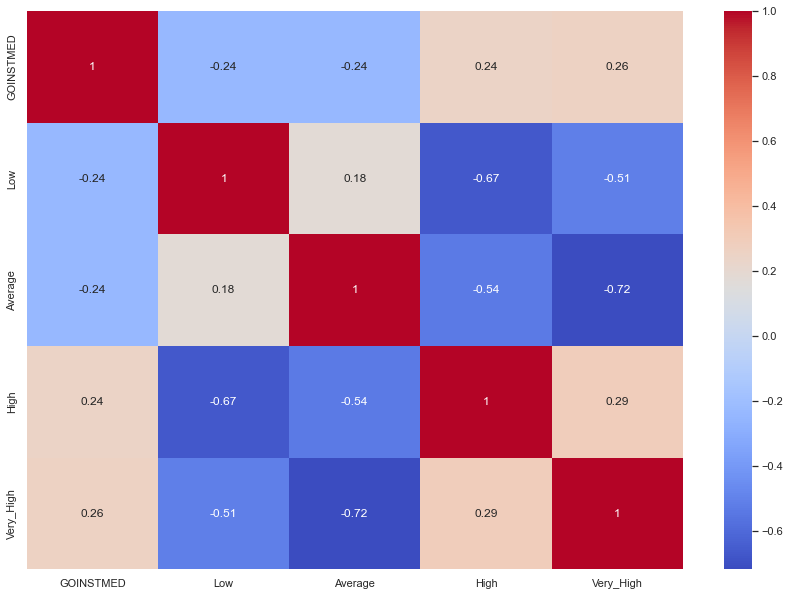

In [144]:
import seaborn as sns

# calculate the correlation matrix
corr_heat = Reg2[['GOINSTMED', 'Low', 'Average', 'High', 'Very_High']].corr()

# create the heatmap
sns.heatmap(corr_heat, annot=True, cmap='coolwarm')


In [145]:
from sklearn.linear_model import LinearRegression

# Assign the feature columns to X
X = Reg2[['Very_High']]

# Assign the median pay column to y
y = Reg2['GOINSTMED']

# Create an instance of the LinearRegression model
reg = LinearRegression()

# Fit the model using the feature and target data
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
# Fit the linear regression model
reg.fit(X, y)

# Get the R-squared value for the model
r_squared = reg.score(X, y)
print("R-squared value:", r_squared)

R-squared value: 0.06538430602583767


## Creating a filtered DF with only BA and BSC?

In [147]:
Tariff2

PUBUKPRN     UKPRN              KISCOURSEID  KISMODE  TARUNAVAILREASON  \
2      10000055  10004930                 FDSC-ATR        1                 0   
5      10000163  10000163             BSCERSF-C608        1                 0   
7      10000163  10000163              BSRDIF-B821        1                 0   
8      10000163  10000163              BSRROF-B822        1                 0   
9      10000163  10000163              BSSEHF-C607        1                 0   
...         ...       ...                      ...      ...               ...   
43290  99999997  99999997                    K0259        1                 0   
43291  99999997  99999997                    K0604        1                 0   
43292  99999998  99999998  UUBMEDSGWY6~UUBMEDSGWY6        1                 1   
43293  99999998  99999998   UUBMEDSMED5~UBMEDSYRK5        1                 0   
43294  99999999  99999999               N1EJ001FUU        1                 0   

       TARPOP  TARAGG       TARSBJ  T001  T048  ...  T160  T176  T192  T208  \
2        20.0    23.0  CAH06-01-01   5.0   5.0  ...   5.0   0.0   0.0   0.0   
5        10.0    13.0  CAH03-02-01   0.0   0.0  ...   0.0   0.0   0.0   0.0   
7        90.0    11.0        CAH02   2.0   0.0  ...  11.0   2.0   0.0   1.0   
8        90.0    11.0        CAH02   2.0   0.0  ...  11.0   2.0   0.0   1.0   
9        10.0    14.0          NaN   0.0   0.0  ...   0.0   0.0   0.0   0.0   
...       ...     ...          ...   ...   ...  ...   ...   ...   ...   ...   
43290    45.0    14.0          NaN   0.0   0.0  ...   0.0   0.0   5.0   0.0   
43291    60.0    14.0          NaN   2.0   3.0  ...   7.0   0.0   0.0   0.0   
43292   220.0    13.0  CAH01-01-02   0.0   0.0  ...  22.0  13.0   6.0   5.0   
43293   110.0    14.0          NaN   1.0   0.0  ...  25.0  12.0   9.0   5.0   
43294   135.0    14.0          NaN   0.0   0.0  ...  27.0  10.0   8.0   7.0   

       T224  T240   Low  Average  High  Very_High  
2       0.0   5.0  30.0     45.0  15.0        5.0  
5      10.0   0.0   0.0     45.0  45.0       10.0  
7       0.0   2.0  15.0     49.0  32.0        3.0  
8       0.0   2.0  15.0     49.0  32.0        3.0  
9      10.0   0.0   0.0     45.0  45.0       10.0  
...     ...   ...   ...      ...   ...        ...  
43290   0.0   0.0   5.0     80.0   0.0        5.0  
43291   0.0   0.0  43.0     41.0  15.0        0.0  
43292   3.0   2.0   0.0     21.0  61.0       16.0  
43293   5.0   3.0   2.0     14.0  64.0       22.0  
43294   5.0   6.0   2.0      5.0  67.0       26.0  

[36186 rows x 26 columns]

In [148]:
KIS_AIM

KISAIMCODE KISAIMLABEL
0             0          BA
1             1        BAcc
2             2       BArch
3             3         BBA
4             4          BD
..          ...         ...
193         195      MOccTh
194         196        MPod
195         197       MTRad
196         198         MLP
197         199  MMathStat 

[198 rows x 2 columns]

In [166]:
df

PUBUKPRN     UKPRN  DISTANCE  SANDWICH  \
0      10000047  10001143         0         0   
1      10000055  10000055         0         0   
2      10000055  10004930         0         0   
3      10000055  10004930         0         0   
4      10000080  10004797         0         0   
...         ...       ...       ...       ...   
34551  99999997  99999997         0         0   
34552  99999997  99999997         0         0   
34553  99999998  99999998         0         0   
34554  99999998  99999998         0         0   
34555  99999999  99999999         0         0   

                                          TITLE UCASPROGID  UKPRNAPPLY  \
0                         Ophthalmic Dispensing    A19-H32         NaN   
1              Business and Management Practice        NaN  10004930.0   
2             Animal Therapy and Rehabilitation    A40-A80         NaN   
3             Animal Therapy and Rehabilitation    A40-A80         NaN   
4                             Music Performance    A46-I81         NaN   
...                                         ...        ...         ...   
34551                                  Pharmacy    A15-F87         NaN   
34552            Pharmacy with preparatory year    A51-G00         NaN   
34553              Medicine with a Gateway Year    A49-J86         NaN   
34554                                  Medicine    A19-A72         NaN   
34555  Bachelor of Medicine Bachelor of Surgery    A17-H57         NaN   

       YEARABROAD  KISAIMCODE  KISLEVEL  
0               0          30         4  
1               0          31         4  
2               0          36         4  
3               0          36         4  
4               0         130         4  
...           ...         ...       ...  
34551           0          73         3  
34552           0          73         3  
34553           0          43         3  
34554           0          43         3  
34555           0          83         3  

[34556 rows x 10 columns]

In [191]:
dfKIS = KS_red[['PUBUKPRN', 'UKPRN', 'KISAIMCODE', 'KISCOURSEID']]

In [192]:
dfKIS

PUBUKPRN     UKPRN  KISAIMCODE              KISCOURSEID
0      10000047  10001143          30              PSSFDOPTDIS
1      10000055  10000055          31                     AB37
2      10000055  10004930          36                 FDSC-ATR
3      10000055  10004930          36                 FDSC-ATR
4      10000080  10004797         130                NTAD162_1
...         ...       ...         ...                      ...
34551  99999997  99999997          73                    K0259
34552  99999997  99999997          73                    K0604
34553  99999998  99999998          43  UUBMEDSGWY6~UUBMEDSGWY6
34554  99999998  99999998          43   UUBMEDSMED5~UBMEDSYRK5
34555  99999999  99999999          83               N1EJ001FUU

[34556 rows x 4 columns]

In [193]:
BA_BSC = pd.merge(dfKIS, KIS_AIM, on='KISAIMCODE', how='inner')

In [194]:
BA_BSC

PUBUKPRN     UKPRN  KISAIMCODE  KISCOURSEID KISAIMLABEL
0      10000047  10001143          30  PSSFDOPTDIS          FD
1      10000473  10000473          30  HCOM1L5FDAY          FD
2      10000533  10000533          30  2D600122W11          FD
3      10000560  10007802          30    NFCDLBCOT          FD
4      10000654  10007802          30     NFCDLBCA          FD
...         ...       ...         ...          ...         ...
34551  10007857  10007857          79     MZOOL_ZR       MZOOL
34552  10008455  10008455         110     UOBBESED   BSc (Eng)
34553  10008455  10008455         110    UOBBESEFY   BSc (Eng)
34554  10010213  10010213         192         ACUP       LicAc
34555  10031982  10031982         178        BS550      AdvDip

[34556 rows x 5 columns]

In [195]:
BA_BSC = BA_BSC.loc[(BA_BSC['KISAIMCODE'] == 21) | (BA_BSC['KISAIMCODE'] == 0)]

In [196]:
BA_BSC

PUBUKPRN     UKPRN  KISAIMCODE                  KISCOURSEID KISAIMLABEL
1492   10000163  10000163          21                 BSCERSF-C608         BSc
1493   10000163  10000163          21                    BSPF-C800         BSc
1494   10000163  10000163          21                  BSRDIF-B821         BSc
1495   10000163  10000163          21                  BSRROF-B822         BSc
1496   10000163  10000163          21                  BSSEHF-C607         BSc
...         ...       ...         ...                          ...         ...
25981  10086591  10086591           0  UBAA_0018_FR-UBAA_001801-11          BA
25982  10089266  10007138           0                    CBAABSNSS          BA
25983  10089266  10007138           0                  CBAABSNSSFF          BA
25984  10089266  10007138           0                    CBAAHESOC          BA
25985  10089266  10007138           0                  CBAAHESOCFF          BA

[24299 rows x 5 columns]

In [161]:
Go_salary

PUBUKPRN     UKPRN     KISCOURSEID  KISMODE     GOSALSBJ  GOINSTLQ  \
5535   10003956  10003956    KUZBAADHMACF        1     CAH25-01   12000.0   
12182  10005999  10005999        KIS00109        2     CAH15-04   11500.0   
5763   10003956  10003956  KUZBACFDRSS4FF        1     CAH25-01   12000.0   
15447  10007141  10007141       ULEMDJ100        1     CAH25-02    9000.0   
5771   10003956  10003956  KUZBACFDSEN4FF        1     CAH25-01   12000.0   
...         ...       ...             ...      ...          ...       ...   
4257   10003270  10003270            GG41        1  CAH11-01-01   50000.0   
4255   10003270  10003270            GG14        1  CAH11-01-01   50000.0   
4251   10003270  10003270            G600        1  CAH11-01-01   50000.0   
4253   10003270  10003270            G700        1  CAH11-01-01   50000.0   
4247   10003270  10003270            G400        1  CAH11-01-01   50000.0   

       GOINSTMED  GOINSTUQ  
5535     12000.0   18000.0  
12182    12000.0   18000.0  
5763     12000.0   18000.0  
15447    12000.0   19000.0  
5771     12000.0   18000.0  
...          ...       ...  
4257     64000.0   80000.0  
4255     64000.0   80000.0  
4251     64000.0   80000.0  
4253     64000.0   80000.0  
4247     64000.0   80000.0  

[35637 rows x 8 columns]

In [197]:
BA_BSC_SAL = pd.merge(Go_salary, BA_BSC, on='KISCOURSEID', how='inner')

In [198]:
BA_BSC_SAL

PUBUKPRN_x   UKPRN_x      KISCOURSEID  KISMODE     GOSALSBJ  GOINSTLQ  \
0        10003956  10003956     KUZBAADHMACF        1     CAH25-01   12000.0   
1        10003956  10003956   KUZBACFDRSS4FF        1     CAH25-01   12000.0   
2        10003956  10003956   KUZBACFDRSS4FF        1     CAH20-02   21000.0   
3        10007141  10007141        ULEMDJ100        1     CAH25-02    9000.0   
4        10003956  10003956   KUZBACFDSEN4FF        1     CAH25-01   12000.0   
...           ...       ...              ...      ...          ...       ...   
27049    10006299  10006299  SSTK-P-S-C-0035        2     CAH11-01   31500.0   
27050    10006299  10006299  SSTK-P-F-C-0009        2     CAH17-01   38000.0   
27051    10006299  10006299  SSTK-P-S-C-0269        2     CAH17-01   38000.0   
27052    10004063  10004063        N300-UBFI        1  CAH17-01-07   30000.0   
27053    10007784  10007784     UBSCOMSING18        1  CAH11-01-01   45000.0   

       GOINSTMED  GOINSTUQ  PUBUKPRN_y   UKPRN_y  KISAIMCODE KISAIMLABEL  
0        12000.0   18000.0    10003956  10003956           0          BA  
1        12000.0   18000.0    10003956  10003956           0          BA  
2        21000.0   25000.0    10003956  10003956           0          BA  
3        12000.0   19000.0    10007141  10007141           0          BA  
4        12000.0   18000.0    10003956  10003956           0          BA  
...          ...       ...         ...       ...         ...         ...  
27049    43000.0   57000.0    10006299  10006299          21         BSc  
27050    43500.0   48500.0    10006299  10006299           0          BA  
27051    43500.0   48500.0    10006299  10006299           0          BA  
27052    45000.0   58000.0    10004063  10004063          21         BSc  
27053    50000.0   60000.0    10007784  10007784          21         BSc  

[27054 rows x 12 columns]

I have created a reduced version of KISCOURSE outside pandas, as a consequence of the CSV not importing correctly

In [189]:
from openpyxl import Workbook
KS_red = pd.read_excel('/Users/student/Documents/HESA Data/KISCOURSE_reduced1.xlsx')

In [ ]:
BA_BSC_SAL[['KISCOURSEID', 'GOINSTMED']]

In [202]:
AV_Points 

PUBUKPRN  AV_POINTS
0    10000055     98.450
1    10000163    128.730
2    10000291     90.770
3    10000381    136.025
4    10000385    140.960
..        ...        ...
251  10086591     85.650
252  90000451    167.200
253  99999997     99.050
254  99999998    159.685
255  99999999    167.360

[256 rows x 2 columns]

In [203]:
BA_BSC_SAL2 = pd.merge(Tariff2, BA_BSC, on='KISCOURSEID', how='inner')

In [204]:
BA_BSC_SAL2

PUBUKPRN_x   UKPRN_x                  KISCOURSEID  KISMODE  \
0        10000163  10000163                 BSCERSF-C608        1   
1        10000163  10000163                  BSRDIF-B821        1   
2        10000163  10000163                  BSRROF-B822        1   
3        10000163  10000163                  BSSEHF-C607        1   
4        10000163  10000163                   BSSRF-C610        1   
...           ...       ...                          ...      ...   
27094    10086591  10086591  UBAA_0015_FR-UBAA_001501-11        1   
27095    10086591  10086591  UBSC_0001_FR-UBSC_000101-01        1   
27096    10086591  10086591  UBSC_0001_FR-UBSC_000101-01        1   
27097    10086591  10086591  UBSC_0001_FR-UBSC_000101-11        1   
27098    10086591  10086591  UBSC_0001_FR-UBSC_000101-11        1   

       TARUNAVAILREASON  TARPOP  TARAGG       TARSBJ  T001  T048  ...  T224  \
0                     0    10.0    13.0  CAH03-02-01   0.0   0.0  ...  10.0   
1                     0    90.0    11.0        CAH02   2.0   0.0  ...   0.0   
2                     0    90.0    11.0        CAH02   2.0   0.0  ...   0.0   
3                     0    10.0    14.0          NaN   0.0   0.0  ...  10.0   
4                     1    10.0    13.0  CAH03-02-01   0.0   0.0  ...  10.0   
...                 ...     ...     ...          ...   ...   ...  ...   ...   
27094                 1    30.0    22.0     CAH17-01   5.0  10.0  ...   0.0   
27095                 1    30.0    22.0     CAH17-01   5.0  10.0  ...   0.0   
27096                 1    10.0    22.0     CAH23-01  20.0   5.0  ...   0.0   
27097                 1    30.0    22.0     CAH17-01   5.0  10.0  ...   0.0   
27098                 1    10.0    22.0     CAH23-01  20.0   5.0  ...   0.0   

       T240   Low  Average  High  Very_High  PUBUKPRN_y   UKPRN_y  KISAIMCODE  \
0       0.0   0.0     45.0  45.0       10.0    10000163  10000163          21   
1       2.0  15.0     49.0  32.0        3.0    10000163  10000163          21   
2       2.0  15.0     49.0  32.0        3.0    10000163  10000163          21   
3       0.0   0.0     45.0  45.0       10.0    10000163  10000163          21   
4       0.0   0.0     45.0  45.0       10.0    10000163  10000163          21   
...     ...   ...      ...   ...        ...         ...       ...         ...   
27094   0.0  55.0     35.0  10.0        0.0    10086591  10086591           0   
27095   0.0  55.0     35.0  10.0        0.0    10086591  10086591          21   
27096   0.0  70.0     25.0  10.0        0.0    10086591  10086591          21   
27097   0.0  55.0     35.0  10.0        0.0    10086591  10086591          21   
27098   0.0  70.0     25.0  10.0        0.0    10086591  10086591          21   

       KISAIMLABEL  
0              BSc  
1              BSc  
2              BSc  
3              BSc  
4              BSc  
...            ...  
27094           BA  
27095          BSc  
27096          BSc  
27097          BSc  
27098          BSc  

[27099 rows x 30 columns]

In [205]:
BA_BSC_SAL2['T1'] = BA_BSC_SAL2['T001'] * 0.01
BA_BSC_SAL2['T48'] = BA_BSC_SAL2['T048'] * 0.48
BA_BSC_SAL2['T64'] = BA_BSC_SAL2['T064'] * 0.64
BA_BSC_SAL2['T80'] = BA_BSC_SAL2['T080'] * 0.80
BA_BSC_SAL2['T96'] = BA_BSC_SAL2['T096'] * 0.96
BA_BSC_SAL2['TN112'] = BA_BSC_SAL2['T112'] * 1.12
BA_BSC_SAL2['TN128'] = BA_BSC_SAL2['T128'] * 1.28
BA_BSC_SAL2['TN144'] = BA_BSC_SAL2['T144'] * 1.44
BA_BSC_SAL2['TN160'] = BA_BSC_SAL2['T160'] * 1.60
BA_BSC_SAL2['TN176'] = BA_BSC_SAL2['T176'] * 1.76
BA_BSC_SAL2['TN192'] = BA_BSC_SAL2['T192'] * 1.92
BA_BSC_SAL2['TN208'] = BA_BSC_SAL2['T208'] * 2.08
BA_BSC_SAL2['TN224'] = BA_BSC_SAL2['T224'] * 2.24
BA_BSC_SAL2['TN240'] = BA_BSC_SAL2['T240'] * 2.40

In [219]:
columns_to_sum = ['T1', 'T48', 'T64', 'T80', 'T96', 'TN112', 'TN128', 'TN144', 'TN160', 'TN176', 'TN192', 'TN208', 'TN224', 'TN240']
BA_BSC_SAL2['AV_POINTS'] = BA_BSC_SAL2[columns_to_sum].sum(axis=1)


In [230]:
BA_BSC_SAL2 = BA_BSC_SAL2[['PUBUKPRN_x','UKPRN_x', 'KISCOURSEID', 'AV_POINTS']]

In [235]:
selected_columns = BA_BSC_SAL2.iloc[:, [0, 1, 2, 4]]

In [247]:
selected_columns.sort_values('AV_POINTS', ascending=False)

PUBUKPRN_x   UKPRN_x KISCOURSEID  AV_POINTS
23220    10007805  10007805  KIS0000202     237.60
21872    10007794  10007794   GN34-2208     230.40
21870    10007794  10007794   GN33-2208     230.40
21868    10007794  10007794   GL31-2208     230.40
21862    10007794  10007794   GG34-2208     230.40
...           ...       ...         ...        ...
1536     10001143  10001143    PFDDGSP4      13.50
1537     10001143  10001143    PFDDGSP4      13.50
17281    10007166  10007166    CS001T01      13.50
1452     10001143  10001143    PFDDGBT4      12.75
1453     10001143  10001143    PFDDGBT4      12.75

[27099 rows x 4 columns]

In [218]:
Go_sal = Go_salary[['KISCOURSEID', 'GOINSTMED']]

In [237]:
BA_BSC_SAL3 = pd.merge(selected_columns, Go_sal, on='KISCOURSEID', how='inner')

In [238]:
BA_BSC_SAL3

PUBUKPRN_x   UKPRN_x  KISCOURSEID  AV_POINTS  GOINSTMED
0        10000163  10000163  BSRDIF-B821     120.18    30000.0
1        10000163  10000163  BSRROF-B822     120.18    30000.0
2        10000291  10000291       K00004      96.80    22000.0
3        10000291  10000291       K00005     104.00    22000.0
4        10000291  10000291       K00006     144.00    22000.0
...           ...       ...          ...        ...        ...
49684    10080811  10080811    BSHERPRXF     105.70    20000.0
49685    10080811  10080811     BSHVEVNX     128.32    20000.0
49686    10080811  10080811     BSHVEVNX     128.32    21500.0
49687    10080811  10080811     BSHVVNSX     128.32    20000.0
49688    10080811  10080811     BSHVVNSX     128.32    21500.0

[49689 rows x 5 columns]

In [242]:
groupedBA_BSC_SAL3 = BA_BSC_SAL3.groupby('PUBUKPRN_x').median()

In [249]:
groupedBA_BSC_SAL3.sort_values('AV_POINTS', ascending=False)

UKPRN_x  AV_POINTS  GOINSTMED
PUBUKPRN_x                                  
10003270    10003270.0    207.200    26000.0
10007805    10007805.0    199.360    22500.0
10007794    10007794.0    196.800    26000.0
10007790    10007790.0    187.675    23500.0
10007788    10007788.0    186.965    27000.0
...                ...        ...        ...
10007760    10007760.0     86.500    26000.0
10000975    10000975.0     85.800    22500.0
10004721    10007146.0     83.650    25500.0
10004075    10004075.0     65.850    22500.0
10024024    10024024.0     63.550    20000.0

[160 rows x 3 columns]

<AxesSubplot:xlabel='AV_POINTS', ylabel='GOINSTMED'>

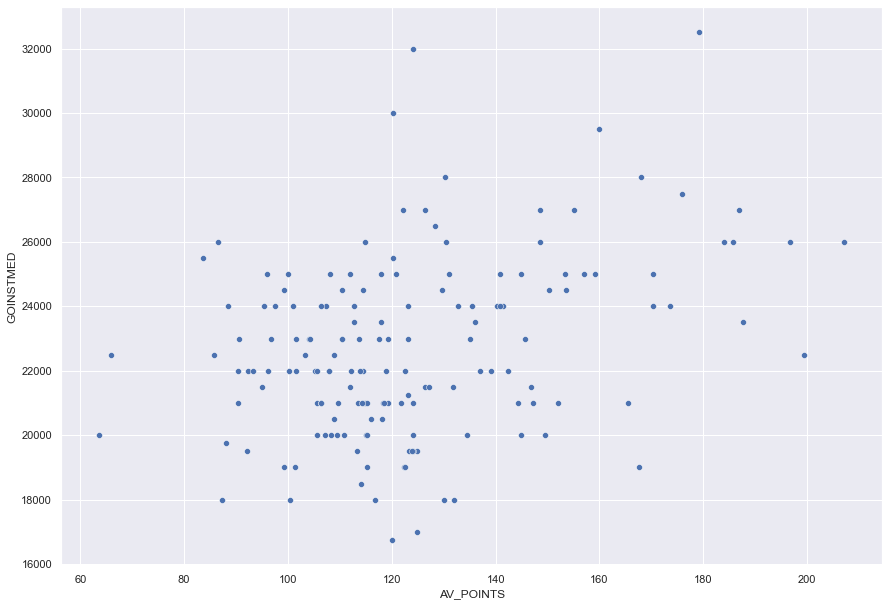

In [243]:
sns.scatterplot(x='AV_POINTS', y='GOINSTMED', data=groupedBA_BSC_SAL3)

In [244]:
corr_matrix = groupedBA_BSC_SAL3.corr()
print(corr_matrix)

            UKPRN_x  AV_POINTS  GOINSTMED
UKPRN_x    1.000000  -0.061272  -0.104113
AV_POINTS -0.061272   1.000000   0.354737
GOINSTMED -0.104113   0.354737   1.000000


NSS questions and pay correlation matrix

In [251]:
Reg4

PUBUKPRN  GOINSTLQ  GOINSTMED  GOINSTUQ    Q1    Q2    Q3    Q4    Q5  \
0    10000163   27000.0    30000.0   40000.0  68.0  61.0  84.0  60.0  51.0   
1    10000291   20000.0    24000.0   27000.0  80.0  80.0  80.0  79.0  80.0   
2    10000381   16000.0    22000.0   30000.0  98.0  98.0  95.0  91.0  95.0   
3    10000385   19000.0    22000.0   25000.0  86.0  83.0  79.0  79.0  82.0   
4    10000571   18000.0    20000.0   25000.0  90.0  82.0  77.0  74.0  80.0   
..        ...       ...        ...       ...   ...   ...   ...   ...   ...   
182  10067853   20000.0    23000.0   26500.0  72.0  54.0  42.0  42.0  58.0   
183  10080811   17500.0    20000.0   24000.0  95.0  89.0  87.0  80.0  82.0   
184  99999997   22500.0    27000.0   30000.0  81.0  60.0  86.0  84.0  67.0   
185  99999998   30000.0    35000.0   38000.0  69.0  78.0  91.0  75.0  67.0   
186  99999999   28000.0    32000.0   36000.0  87.0  86.0  94.0  82.0  83.0   

       Q6  ...   Q19   Q20   Q21   Q22   Q23   Q24   Q25   Q26   Q27  \
0    64.0  ...  77.0  68.0  65.0  89.0  68.0  29.0  25.0  55.0  43.0   
1    80.0  ...  83.0  80.0  66.0  80.0  82.0  73.5  58.0  57.0  73.0   
2    91.0  ...  98.0  91.0  81.0  98.0  72.0  74.0  70.0  76.0  86.0   
3    87.0  ...  91.0  84.0  73.0  85.0  83.0  71.0  50.0  57.0  71.0   
4    84.0  ...  84.0  80.0  59.0  79.0  85.0  77.0  56.0  52.0  76.0   
..    ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
182  58.0  ...  32.0  44.0  35.0  50.0  28.0  38.0  12.0   0.0  27.0   
183  84.0  ...  81.0  78.0  63.0  77.0  80.0  76.0  52.0  53.0  85.0   
184  91.0  ...  90.0  91.0  60.0  84.0  81.0  65.0  38.0  50.0  81.0   
185  77.0  ...  81.0  87.0  63.0  84.0  75.0  43.0  31.0  34.0  65.0   
186  88.0  ...  89.0  83.0  74.0  85.0  87.0  63.0  60.0  55.0  81.0   

     AV_POINTS  
0      128.730  
1       90.770  
2      136.025  
3      140.960  
4       98.960  
..         ...  
182     87.900  
183    101.630  
184     99.050  
185    159.685  
186    167.360  

[187 rows x 32 columns]

In [256]:
Reg5 = Reg4.drop(columns=['PUBUKPRN','GOINSTLQ','GOINSTUQ'])

In [261]:
corr_matrix3 = Reg5.corr()
corr_matrix3.sort_values('GOINSTMED')

GOINSTMED        Q1        Q2        Q3        Q4        Q5  \
Q11        -0.556780  0.565428  0.584562  0.252895  0.624651  0.574898   
Q14        -0.500204  0.627276  0.551520  0.324776  0.669544  0.552779   
Q8         -0.487953  0.536447  0.351762  0.182493  0.542025  0.472171   
Q9         -0.441894  0.525616  0.408252  0.246475  0.508385  0.519964   
Q13        -0.438393  0.712322  0.530778  0.303428  0.684988  0.636214   
Q10        -0.428067  0.435481  0.417096  0.077563  0.475761  0.369827   
Q1         -0.380354  1.000000  0.735110  0.557322  0.598509  0.637519   
Q24        -0.362038  0.571471  0.389097  0.354332  0.516367  0.601207   
Q2         -0.313471  0.735110  1.000000  0.627211  0.630468  0.683726   
Q25        -0.290994  0.437361  0.326605  0.319718  0.604368  0.585518   
Q4         -0.268006  0.598509  0.630468  0.585125  1.000000  0.707889   
Q5         -0.238478  0.637519  0.683726  0.580573  0.707889  1.000000   
Q12        -0.233724  0.752875  0.560869  0.528264  0.531177  0.578154   
Q21        -0.223188  0.406740  0.492102  0.385174  0.662904  0.494439   
Q26        -0.192502  0.262870  0.237436  0.299850  0.428593  0.420725   
Q15        -0.160244  0.531264  0.291209  0.391187  0.515608  0.645257   
Q27        -0.150715  0.685811  0.540072  0.620181  0.747640  0.744433   
Q17        -0.150515  0.506112  0.198380  0.287540  0.406869  0.530520   
Q7         -0.146519  0.350413  0.444813  0.416401  0.670642  0.473790   
Q6         -0.118662  0.515214  0.417448  0.582355  0.566346  0.686187   
Q22        -0.091640  0.355176  0.219192  0.305988  0.553941  0.335256   
Q16        -0.087916  0.344785  0.233927  0.222174  0.345022  0.484710   
Q23        -0.084027  0.523205  0.347767  0.565356  0.445158  0.547920   
Q18        -0.052140  0.301491  0.164872  0.415291  0.347889  0.432240   
Q3          0.033468  0.557322  0.627211  1.000000  0.585125  0.580573   
Q20         0.062965  0.394347  0.208005  0.388899  0.432162  0.387626   
Q19         0.071769  0.154956  0.110343  0.330293  0.273658  0.327997   
AV_POINTS   0.267264  0.175598  0.202581  0.267918  0.019045  0.106443   
GOINSTMED   1.000000 -0.380354 -0.313471  0.033468 -0.268006 -0.238478   

                 Q6        Q7        Q8        Q9  ...       Q19       Q20  \
Q11        0.374041  0.321110  0.637585  0.658881  ...  0.039148  0.114885   
Q14        0.467636  0.492682  0.623649  0.592632  ...  0.152637  0.273002   
Q8         0.418000  0.368384  1.000000  0.749402  ...  0.008436  0.201903   
Q9         0.439377  0.181510  0.749402  1.000000  ...  0.090023  0.273816   
Q13        0.524256  0.434745  0.670039  0.660562  ...  0.082671  0.372939   
Q10        0.244920  0.280040  0.609024  0.578277  ... -0.048848  0.049327   
Q1         0.515214  0.350413  0.536447  0.525616  ...  0.154956  0.394347   
Q24        0.697844  0.315761  0.625482  0.677703  ...  0.309505  0.455765   
Q2         0.417448  0.444813  0.351762  0.408252  ...  0.110343  0.208005   
Q25        0.620080  0.501648  0.636642  0.579319  ...  0.349348  0.423739   
Q4         0.566346  0.670642  0.542025  0.508385  ...  0.273658  0.432162   
Q5         0.686187  0.473790  0.472171  0.519964  ...  0.327997  0.387626   
Q12        0.516888  0.194526  0.419041  0.556712  ...  0.284054  0.493832   
Q21        0.401352  0.618941  0.287423  0.228389  ...  0.234199  0.323017   
Q26        0.471630  0.467054  0.346205  0.268806  ...  0.385642  0.322522   
Q15        0.698592  0.275590  0.628213  0.561942  ...  0.337882  0.506339   
Q27        0.750360  0.473609  0.487165  0.499163  ...  0.446362  0.587758   
Q17        0.575962  0.153132  0.571962  0.550609  ...  0.274940  0.532761   
Q7         0.493680  1.000000  0.368384  0.181510  ...  0.205016  0.236131   
Q6         1.000000  0.493680  0.418000  0.439377  ...  0.406535  0.435702   
Q22        0.344363  0.555188  0.261932  0.182769  ...  0.263553  0.466747   
Q16        0.444260  0.083772  0.432002  0.508077  ...  0.138903  0.368318

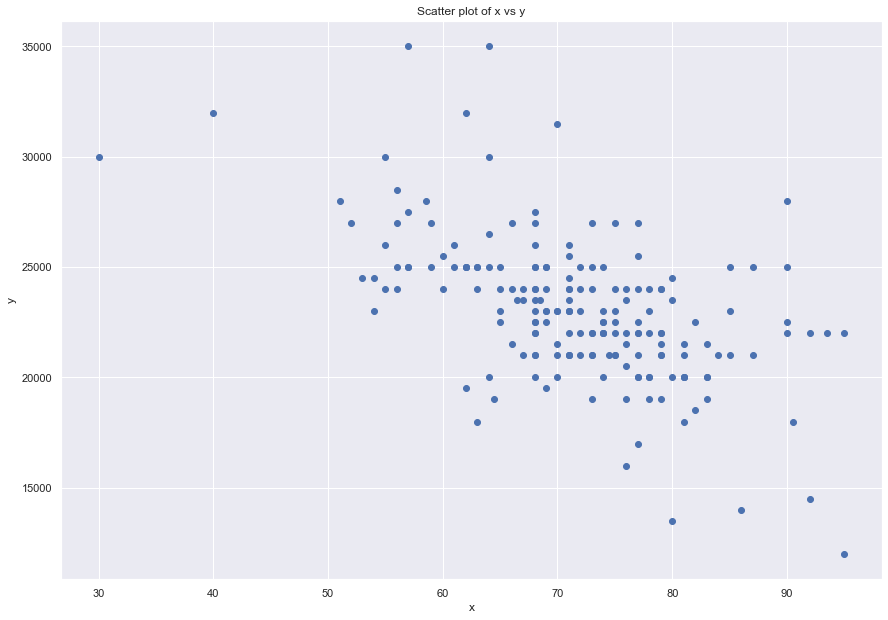

In [262]:
import matplotlib.pyplot as plt

plt.scatter(Reg5['Q11'], Reg5['GOINSTMED'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x vs y')
plt.show()


In [263]:
NSS

PUBUKPRN     UKPRN              KISCOURSEID  KISMODE    Q1    Q2    Q3  \
7      10000163  10000163              BSRDIF-B821        1  68.0  61.0  84.0   
8      10000163  10000163              BSRROF-B822        1  68.0  61.0  84.0   
12     10000163  10000163                MCCF-B320        1  68.0  61.0  84.0   
15     10000216  10000216                   532986        1  94.0  94.0  94.0   
17     10000291  10000291                   K00001        1  79.0  71.0  80.0   
...         ...       ...                      ...      ...   ...   ...   ...   
44530  99999997  99999997                    K0259        1  81.0  60.0  86.0   
44531  99999997  99999997                    K0604        1  81.0  60.0  86.0   
44532  99999998  99999998  UUBMEDSGWY6~UUBMEDSGWY6        1  69.0  78.0  91.0   
44533  99999998  99999998   UUBMEDSMED5~UBMEDSYRK5        1  69.0  78.0  91.0   
44534  99999999  99999999               N1EJ001FUU        1  87.0  86.0  94.0   

         Q4    Q5    Q6  ...   Q18   Q19   Q20   Q21    Q22    Q23   Q24  \
7      60.0  51.0  64.0  ...  70.0  77.0  68.0  65.0   89.0   68.0  29.0   
8      60.0  51.0  64.0  ...  70.0  77.0  68.0  65.0   89.0   68.0  29.0   
12     60.0  51.0  64.0  ...  70.0  77.0  68.0  65.0   89.0   68.0  29.0   
15     94.0  81.0  94.0  ...  75.0  75.0  81.0  94.0  100.0  100.0  81.0   
17     71.0  80.0  86.0  ...  71.0  86.0  79.0  51.0   57.0   83.0  65.0   
...     ...   ...   ...  ...   ...   ...   ...   ...    ...    ...   ...   
44530  84.0  67.0  91.0  ...  80.0  90.0  91.0  60.0   84.0   81.0  65.0   
44531  84.0  67.0  91.0  ...  80.0  90.0  91.0  60.0   84.0   81.0  65.0   
44532  75.0  67.0  77.0  ...  75.0  81.0  87.0  63.0   84.0   75.0  43.0   
44533  75.0  67.0  77.0  ...  75.0  81.0  87.0  63.0   84.0   75.0  43.0   
44534  82.0  83.0  88.0  ...  81.0  89.0  83.0  74.0   85.0   87.0  63.0   

        Q25   Q26   Q27  
7      25.0  55.0  43.0  
8      25.0  55.0  43.0  
12     25.0  55.0  43.0  
15     63.0  86.0  88.0  
17     38.0  53.0  66.0  
...     ...   ...   ...  
44530  38.0  50.0  81.0  
44531  38.0  50.0  81.0  
44532  31.0  34.0  65.0  
44533  31.0  34.0  65.0  
44534  60.0  55.0  81.0  

[38449 rows x 31 columns]

In [ ]:
df.rename(columns={'Q1': 'Staff made subject interesting', 'Q2': 'new_name_2'})


<AxesSubplot:>

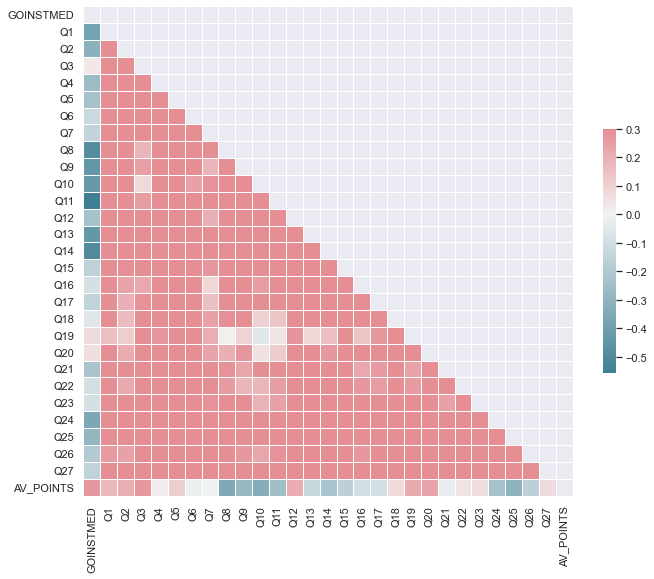

In [257]:
 import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = Reg5.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


Creating new NSS dataset

In [264]:
NSS_SAL = pd.merge(NSS, Go_salary, on='KISCOURSEID', how='inner')

In [265]:
NSS_SAL

PUBUKPRN_x   UKPRN_x              KISCOURSEID  KISMODE_x    Q1    Q2  \
0        10000163  10000163              BSRDIF-B821          1  68.0  61.0   
1        10000163  10000163              BSRROF-B822          1  68.0  61.0   
2        10000163  10000163                MCCF-B320          1  68.0  61.0   
3        10000291  10000291                   K00001          1  79.0  71.0   
4        10000291  10000291                   K00004          1  82.0  79.0   
...           ...       ...                      ...        ...   ...   ...   
59206    10080811  10080811                 BSHVVNSX          1  97.0  97.0   
59207    10080811  10080811                 MSIEESXX          1  94.0  89.0   
59208    99999998  99999998  UUBMEDSGWY6~UUBMEDSGWY6          1  69.0  78.0   
59209    99999998  99999998   UUBMEDSMED5~UBMEDSYRK5          1  69.0  78.0   
59210    99999999  99999999               N1EJ001FUU          1  87.0  86.0   

         Q3    Q4    Q5    Q6  ...   Q25   Q26   Q27  PUBUKPRN_y   UKPRN_y  \
0      84.0  60.0  51.0  64.0  ...  25.0  55.0  43.0    10000163  10000163   
1      84.0  60.0  51.0  64.0  ...  25.0  55.0  43.0    10000163  10000163   
2      84.0  60.0  51.0  64.0  ...  25.0  55.0  43.0    10000163  10000163   
3      80.0  71.0  80.0  86.0  ...  38.0  53.0  66.0    10000291  10000291   
4      71.0  70.0  80.0  83.0  ...  65.0  49.0  67.0    10000291  10000291   
...     ...   ...   ...   ...  ...   ...   ...   ...         ...       ...   
59206  97.0  90.0  90.0  90.0  ...  71.0  50.0  97.0    10080811  10080811   
59207  87.0  81.0  82.0  84.0  ...  52.0  53.0  85.0    10080811  10080811   
59208  91.0  75.0  67.0  77.0  ...  31.0  34.0  65.0    99999998  99999998   
59209  91.0  75.0  67.0  77.0  ...  31.0  34.0  65.0    99999998  99999998   
59210  94.0  82.0  83.0  88.0  ...  60.0  55.0  81.0    99999999  99999999   

       KISMODE_y     GOSALSBJ  GOINSTLQ  GOINSTMED  GOINSTUQ  
0              1        CAH02   27000.0    30000.0   40000.0  
1              1        CAH02   27000.0    30000.0   40000.0  
2              1  CAH02-06-06   27000.0    30000.0   40000.0  
3              1  CAH16-01-01   18000.0    20000.0   25000.0  
4              1     CAH25-01   18000.0    22000.0   24000.0  
...          ...          ...       ...        ...       ...  
59206          1  CAH05-01-02   19000.0    21500.0   24000.0  
59207          1  CAH06-01-01   17500.0    20000.0   24000.0  
59208          1  CAH01-01-02   30000.0    35000.0   38000.0  
59209          1  CAH01-01-02   30000.0    35000.0   38000.0  
59210          1  CAH01-01-02   28000.0    32000.0   36000.0  

[59211 rows x 38 columns]

In [273]:
NSS_SAL_C = NSS_SAL.drop(columns=['UKPRN_x', 'PUBUKPRN_y', 'UKPRN_y', 'KISMODE_y', 'GOSALSBJ', 'GOINSTLQ', 'GOINSTUQ'])

In [281]:
NSC_grouped =NSS_SAL_C.groupby('PUBUKPRN_x').mean().reset_index()

In [286]:
pd.options.display.max_columns = 100

In [288]:
corr_matrix4 = NSC_grouped.corr()
corr_matrix4

PUBUKPRN_x  KISMODE_x        Q1        Q2        Q3        Q4  \
PUBUKPRN_x    1.000000  -0.028405 -0.100534 -0.089143  0.118707  0.035795   
KISMODE_x    -0.028405   1.000000  0.058682  0.033704  0.138695  0.183517   
Q1           -0.100534   0.058682  1.000000  0.767950  0.624936  0.656788   
Q2           -0.089143   0.033704  0.767950  1.000000  0.653788  0.715623   
Q3            0.118707   0.138695  0.624936  0.653788  1.000000  0.657590   
Q4            0.035795   0.183517  0.656788  0.715623  0.657590  1.000000   
Q5           -0.133368   0.181305  0.704114  0.748454  0.686686  0.762949   
Q6            0.052057   0.143927  0.588602  0.566198  0.629222  0.665672   
Q7            0.187460   0.117306  0.417755  0.541398  0.517647  0.719260   
Q8           -0.125021   0.219914  0.631498  0.542412  0.363609  0.658843   
Q9           -0.089656   0.212532  0.563725  0.547545  0.436447  0.665933   
Q10          -0.053784   0.221988  0.421864  0.528056  0.282674  0.627758   
Q11          -0.167161   0.180528  0.560259  0.663067  0.349600  0.701122   
Q12          -0.140162   0.110550  0.572873  0.492320  0.533323  0.548324   
Q13          -0.151662   0.138695  0.719630  0.628949  0.428858  0.770511   
Q14          -0.186079   0.157592  0.692504  0.649889  0.460092  0.752776   
Q15          -0.146462   0.196599  0.632939  0.424460  0.536508  0.608363   
Q16          -0.170611   0.141246  0.425431  0.335845  0.357274  0.481679   
Q17          -0.155788   0.175422  0.604733  0.340821  0.413117  0.506245   
Q18           0.042212   0.059944  0.400302  0.237615  0.508121  0.363119   
Q19           0.064896   0.055100  0.272313  0.183546  0.411632  0.237750   
Q20           0.085846  -0.001097  0.526292  0.272653  0.395365  0.354183   
Q21           0.017588   0.005320  0.541853  0.584087  0.487159  0.664122   
Q22           0.079913  -0.071843  0.488521  0.396162  0.388108  0.504216   
Q23           0.021461   0.038377  0.600829  0.478135  0.632222  0.557685   
Q24          -0.125837   0.121703  0.724330  0.578033  0.485882  0.663098   
Q25          -0.085234   0.103428  0.553975  0.497796  0.401094  0.635928   
Q26          -0.064822   0.002317  0.338472  0.314745  0.371660  0.472352   
Q27          -0.011655   0.117992  0.764729  0.652171  0.702105  0.778666   
GOINSTMED     0.253227  -0.015526 -0.237040 -0.309661  0.012527 -0.236409   

                  Q5        Q6        Q7        Q8        Q9       Q10  \
PUBUKPRN_x -0.133368  0.052057  0.187460 -0.125021 -0.089656 -0.053784   
KISMODE_x   0.181305  0.143927  0.117306  0.219914  0.212532  0.221988   
Q1          0.704114  0.588602  0.417755  0.631498  0.563725  0.421864   
Q2          0.748454  0.566198  0.541398  0.542412  0.547545  0.528056   
Q3          0.686686  0.629222  0.517647  0.363609  0.436447  0.282674   
Q4          0.762949  0.665672  0.719260  0.658843  0.665933  0.627758   
Q5          1.000000  0.763376  0.610469  0.595784  0.617268  0.503711   
Q6          0.763376  1.000000  0.589001  0.552013  0.575479  0.451159   
Q7          0.610469  0.589001  1.000000  0.489356  0.416832  0.471972   
Q8          0.595784  0.552013  0.489356  1.000000  0.826508  0.675430   
Q9          0.617268  0.575479  0.416832  0.826508  1.000000  0.702006   
Q10         0.503711  0.451159  0.471972  0.675430  0.702006  1.000000   
Q11         0.615759  0.521130  0.471763  0.721868  0.754949  0.784758   
Q12         0.541952  0.532672  0.299705  0.479493  0.581024  0.435739   
Q13         0.692285  0.685520  0.576282  0.761165  0.749922  0.672250   
Q14         0.634012  0.616124  0.603929  0.727839  0.677237  0.665969   
Q15         0.684523  0.677552  0.388886  0.688684  0.620389  0.461505   
Q16         0.566010  0.538804  0.302673  0.548488  0.596197  0.387529   
Q17         0.556313  0.591056  0.225636  0.664472  0.583111  0.408629   
Q18         0.461650  0.469176  0.302485  0.405389  0.381215  0.157017   
Q19         0.423449  0.383839  0.269537  0.148706  0.135644  0.018550

In [293]:
import statsmodels.api as sm

# Define the feature variables and target variable
X = NSC_grouped.drop(columns=['GOINSTMED','PUBUKPRN_x', 'KISMODE_x'])
y = NSC_grouped['GOINSTMED']

# Add a constant term to the feature variables
X = sm.add_constant(X)

# Fit the linear model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              GOINSTMED   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     5.305
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           1.12e-12
Time:                        23:58:52   Log-Likelihood:                -2107.5
No. Observations:                 225   AIC:                             4271.
Df Residuals:                     197   BIC:                             4367.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.525e+04   4758.026      7.409      0.0

Q3, Q8, Q19, Q20

Creating a neural net for the non-grouped data 

In [294]:
NSS_SAL_C

PUBUKPRN_x              KISCOURSEID  KISMODE_x    Q1    Q2    Q3    Q4  \
0        10000163              BSRDIF-B821          1  68.0  61.0  84.0  60.0   
1        10000163              BSRROF-B822          1  68.0  61.0  84.0  60.0   
2        10000163                MCCF-B320          1  68.0  61.0  84.0  60.0   
3        10000291                   K00001          1  79.0  71.0  80.0  71.0   
4        10000291                   K00004          1  82.0  79.0  71.0  70.0   
...           ...                      ...        ...   ...   ...   ...   ...   
59206    10080811                 BSHVVNSX          1  97.0  97.0  97.0  90.0   
59207    10080811                 MSIEESXX          1  94.0  89.0  87.0  81.0   
59208    99999998  UUBMEDSGWY6~UUBMEDSGWY6          1  69.0  78.0  91.0  75.0   
59209    99999998   UUBMEDSMED5~UBMEDSYRK5          1  69.0  78.0  91.0  75.0   
59210    99999999               N1EJ001FUU          1  87.0  86.0  94.0  82.0   

         Q5    Q6    Q7    Q8    Q9   Q10   Q11   Q12   Q13   Q14   Q15   Q16  \
0      51.0  64.0  76.0  46.0  34.0  27.0  30.0  71.0  49.0  54.0  18.0  50.0   
1      51.0  64.0  76.0  46.0  34.0  27.0  30.0  71.0  49.0  54.0  18.0  50.0   
2      51.0  64.0  76.0  46.0  34.0  27.0  30.0  71.0  49.0  54.0  18.0  50.0   
3      80.0  86.0  74.0  62.0  85.0  65.0  69.0  69.0  69.0  63.0  66.0  71.0   
4      80.0  83.0  83.0  69.0  72.0  72.0  75.0  78.0  72.0  69.0  52.0  79.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
59206  90.0  90.0  97.0  74.0  65.0  81.0  81.0  77.0  74.0  77.0  77.0  77.0   
59207  82.0  84.0  66.0  79.0  74.0  90.0  81.0  90.0  82.0  75.0  78.0  76.0   
59208  67.0  77.0  95.0  45.0  55.0  60.0  57.0  65.0  49.0  43.0  29.0  53.0   
59209  67.0  77.0  95.0  45.0  55.0  60.0  57.0  65.0  49.0  43.0  29.0  53.0   
59210  83.0  88.0  93.0  65.0  63.0  81.0  62.0  77.0  68.0  68.0  63.0  64.0   

        Q17   Q18   Q19   Q20   Q21   Q22   Q23   Q24   Q25   Q26   Q27  \
0      32.0  70.0  77.0  68.0  65.0  89.0  68.0  29.0  25.0  55.0  43.0   
1      32.0  70.0  77.0  68.0  65.0  89.0  68.0  29.0  25.0  55.0  43.0   
2      32.0  70.0  77.0  68.0  65.0  89.0  68.0  29.0  25.0  55.0  43.0   
3      66.0  71.0  86.0  79.0  51.0  57.0  83.0  65.0  38.0  53.0  66.0   
4      67.0  63.0  74.0  79.0  65.0  72.0  81.0  71.0  65.0  49.0  67.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
59206  61.0  73.0  87.0  87.0  74.0  90.0  84.0  81.0  71.0  50.0  97.0   
59207  83.0  74.0  82.0  78.0  63.0  77.0  80.0  76.0  52.0  53.0  85.0   
59208  32.0  75.0  81.0  87.0  63.0  84.0  75.0  43.0  31.0  34.0  65.0   
59209  32.0  75.0  81.0  87.0  63.0  84.0  75.0  43.0  31.0  34.0  65.0   
59210  62.0  81.0  89.0  83.0  74.0  85.0  87.0  63.0  60.0  55.0  81.0   

       GOINSTMED  
0        30000.0  
1        30000.0  
2        30000.0  
3        20000.0  
4        22000.0  
...          ...  
59206    21500.0  
59207    20000.0  
59208    35000.0  
59209    35000.0  
59210    32000.0  

[59211 rows x 31 columns]

In [300]:
from sklearn.model_selection import train_test_split

# Define the feature variables and target variable
X = NSS_SAL_C.drop(columns=['GOINSTMED','PUBUKPRN_x', 'KISMODE_x', 'KISCOURSEID'])
y = NSS_SAL_C['GOINSTMED']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [301]:
from sklearn.neural_network import MLPRegressor
neural_net = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, alpha=0.001,
                     solver='lbfgs', verbose=False, random_state=21, tol=0.000000001)

In [302]:
# Fit the model to the training data
neural_net.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=21, shuffle=True, solver='lbfgs',
             tol=1e-09, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [304]:
# Make predictions on the test set
y_pred = neural_net.predict(X_test)
y_pred

array([21013.52868215, 24545.23887616, 23256.76985871, ...,
       20330.76514806, 20196.24423794, 20649.45651991])

In [305]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate the R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 14198756.934505066
Mean Absolute Error: 2677.181246259517
R-squared: 0.21273807091542718


In [306]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'hidden_layer_sizes': [(100,), (150,), (200,)],
              'alpha': [0.0001, 0.001, 0.01],
              'solver': ['lbfgs', 'adam']}

# Create an instance of the MLPRegressor
neural_net = MLPRegressor(max_iter=1000, verbose=False, random_state=21, tol=0.000000001)

# Create an instance of the GridSearchCV
grid_search = GridSearchCV(neural_net, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)


/Users/student/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/student/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/student/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

/Users/student/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/student/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/student/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The s

Best parameters: {'alpha': 0.001, 'hidden_layer_sizes': (200,), 'solver': 'adam'}


In [317]:
from sklearn.neural_network import MLPRegressor
neural_net = MLPRegressor(hidden_layer_sizes=(200,), max_iter=1000, alpha=0.001, early_stopping = False,
                     solver='adam', verbose=False, random_state=21, tol=0.000000001)

In [318]:
neural_net.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(200,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=2000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=21, shuffle=True, solver='adam',
             tol=1e-09, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [320]:
y_pred = neural_net.predict(X_test)

In [321]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate the R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 13888782.872123633
Mean Absolute Error: 2601.868983894017
R-squared: 0.22992484152092707


In [322]:
neural_net.score(X_train, y_train)

0.22898324373513068

Random forest regressor

In [326]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=21)

# Fit the model to the training data
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=21, verbose=0, warm_start=False)

In [327]:
y_pred = rf.predict(X)

In [329]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# Calculate the mean absolute error
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error:", mae)

# Calculate the R-squared
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

Mean Squared Error: 5536153.013283983
Mean Absolute Error: 1386.8508608634554
R-squared: 0.6759507767132928


In [334]:
# Get the feature importances
importances = rf.feature_importances_

# Get the feature names
feature_names = X.columns

# Create a dataframe with the feature importances
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the feature importances
print(importance_df)

   feature  importance
10     Q11    0.163370
2       Q3    0.067423
21     Q22    0.051175
19     Q20    0.047038
18     Q19    0.042298
1       Q2    0.042141
20     Q21    0.040789
7       Q8    0.034757
17     Q18    0.033001
16     Q17    0.031189
9      Q10    0.031090
6       Q7    0.030783
25     Q26    0.030717
0       Q1    0.029213
24     Q25    0.028973
8       Q9    0.028662
15     Q16    0.027668
3       Q4    0.027588
23     Q24    0.026262
14     Q15    0.025957
5       Q6    0.025815
4       Q5    0.025149
11     Q12    0.025067
22     Q23    0.024971
13     Q14    0.022478
12     Q13    0.019640
26     Q27    0.016781


In [339]:
five_top_importance=importance_df.head(5)

In [340]:
# Define the custom values
questions = ['I have received helpful comments on my work', 'The course is intellectually stimulating', 'I have had the right opportunities to work with other students as part of my course', 
             'I have been able to access course-specific resources (e.g. equipment, facilities, software, collections) when I needed to', 'The library resources (e.g. books, online services and learning spaces) have supported my learning well']

# Add the custom_values column to the dataframe
five_top_importance = five_top_importance.assign(questions=questions)

In [341]:
five_top_importance

feature  importance                                          questions
10     Q11    0.163370        I have received helpful comments on my work
2       Q3    0.067423           The course is intellectually stimulating
21     Q22    0.051175  I have had the right opportunities to work wit...
19     Q20    0.047038  I have been able to access course-specific res...
18     Q19    0.042298  The library resources (e.g. books, online serv...

<AxesSubplot:xlabel='feature', ylabel='importance'>

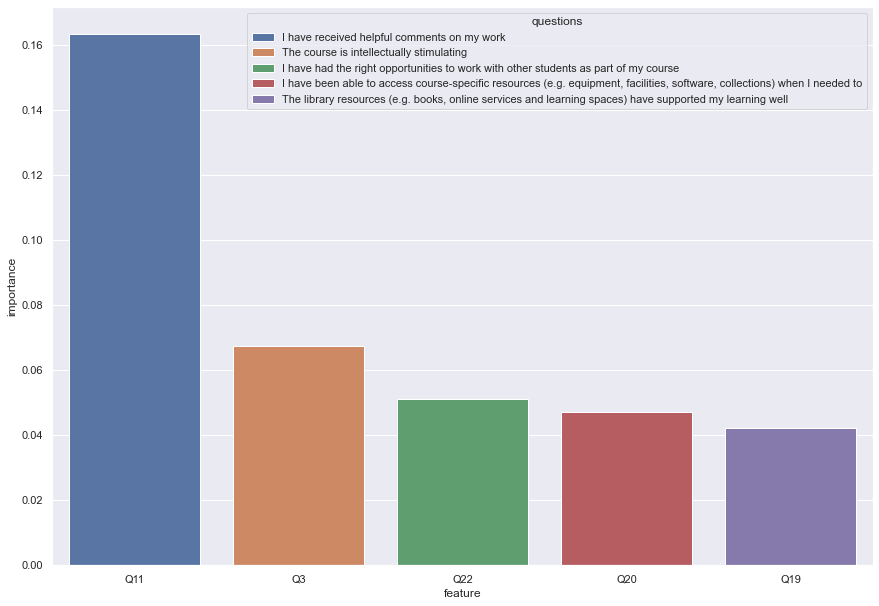

In [351]:
import seaborn as sns

sns.barplot(x='feature', y='importance', hue='questions', dodge=False, data=five_top_importance)


TypeError: unsupported operand type(s) for -: 'str' and 'str'